## Telecom Churn - Group Case Study

<b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>
Step 1: Importing Data <br>
Step 2: Exploring and Transforming Data <br>
Step 3: Imputing Missing values and outlier treatment <br>
Step 4: Modelling using PCA and Logistic regression<br>
Step 5: AdaBoost <br>
Step 6: Gradient Boosting Classifier <br>
Step 7: XGBoost <br>
Step 8: Identifying important features </b><br>

### Step 1: Importing Data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Reading the dataset
original_dataset = pd.read_csv("telecom_churn_data.csv", sep=",")
original_dataset.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

### Step 2: Exploring and Transforming Data

In [3]:
# Exploring the dataset
original_dataset.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [4]:
# Checking the info of the dataset before calculating high-value customers
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Lets check some of the rows of dataset
original_dataset.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [6]:
# Filter high-value customers by calculating 70th percentile
original_dataset["avg_recharge_value"] = (original_dataset["total_rech_amt_6"] + original_dataset["total_rech_amt_7"]) / 2
cut_off_value = original_dataset["avg_recharge_value"].quantile(.70)
original_dataset = original_dataset.loc[ (original_dataset["avg_recharge_value"] > cut_off_value), : ]

In [7]:
# Lets check the size of the updated dataset
len(original_dataset.index)

29979

In [8]:
# Calculating whether the resulting dataset indeed has 29.9 rows
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to avg_recharge_value
dtypes: float64(180), int64(35), object(12)
memory usage: 52.1+ MB


In [9]:
# Lets calculate whether the customer has churned or not based on requirement(s)
def churn(row):
    if row["total_ic_mou_9"]+row["total_og_mou_9"]+row["vol_2g_mb_9"]+row["vol_3g_mb_9"] > 0:
        return "0"
    else:
        return "1"

original_dataset["churn"] = original_dataset.apply(churn, axis=1)

In [10]:
# As per assignment, lets remove the columns which ends with "_9" string
sept_churn_cols = [ col for col in original_dataset.columns if col.endswith("_9") ]
original_dataset.drop(sept_churn_cols, axis=1, inplace=True)

In [11]:
# Lets check the number of null values present in columns
original_dataset.isnull().sum(axis=0)

mobile_number               0
circle_id                   0
loc_og_t2o_mou            114
std_og_t2o_mou            114
loc_ic_t2o_mou            114
last_date_of_month_6        0
last_date_of_month_7       31
last_date_of_month_8      157
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6               316
onnet_mou_7               303
onnet_mou_8               938
offnet_mou_6              316
offnet_mou_7              303
offnet_mou_8              938
roam_ic_mou_6             316
roam_ic_mou_7             303
roam_ic_mou_8             938
roam_og_mou_6             316
roam_og_mou_7             303
roam_og_mou_8             938
loc_og_t2t_mou_6          316
loc_og_t2t_mou_7          303
loc_og_t2t_mou_8          938
loc_og_t2m_mou_6          316
loc_og_t2m_mou_7          303
loc_og_t2m_mou_8          938
loc_og_t2f_mou_6          316
                        ...  
arpu_3g_7               18327
arpu_3g_8               18238
arpu_2g_6 

In [12]:
# Lets check the number of rows which contains at least 1 null value
len(original_dataset[(original_dataset.isnull().sum(axis=1)) > 0].index)

22455

In [13]:
# Lets check the number of columns which contains 50% missing data and store them in list
col_needed_to_drop = []
for col in original_dataset.columns:
    if 100*(original_dataset[col].isnull().sum() / len(original_dataset.index) ) > 50:
        col_needed_to_drop.append(col)

In [14]:
# After inspecting column levels, since below columns also does not add any variance,
# so removing such variables from dataset
col_needed_to_drop.append("last_date_of_month_6")
col_needed_to_drop.append("last_date_of_month_7")
col_needed_to_drop.append("last_date_of_month_8")
col_needed_to_drop.append("mobile_number")
col_needed_to_drop.append("circle_id")
col_needed_to_drop.append("loc_og_t2o_mou")
col_needed_to_drop.append("std_og_t2o_mou")
col_needed_to_drop.append("loc_ic_t2o_mou")
col_needed_to_drop.append("std_og_t2c_mou_6")
col_needed_to_drop.append("std_og_t2c_mou_7")
col_needed_to_drop.append("std_og_t2c_mou_8")
col_needed_to_drop.append("std_ic_t2o_mou_6")
col_needed_to_drop.append("std_ic_t2o_mou_7")
col_needed_to_drop.append("std_ic_t2o_mou_8")
col_needed_to_drop.append("total_rech_amt_8")
col_needed_to_drop.append("max_rech_amt_8")
col_needed_to_drop.append("last_day_rch_amt_8")
col_needed_to_drop.append("total_rech_data_8")
col_needed_to_drop.append("max_rech_data_8")
col_needed_to_drop.append("count_rech_2g_8")
col_needed_to_drop.append("count_rech_3g_8")
col_needed_to_drop.append("av_rech_amt_data_8")
col_needed_to_drop.append("vol_2g_mb_8")
col_needed_to_drop.append("vol_3g_mb_8")
col_needed_to_drop.append("arpu_3g_8")
col_needed_to_drop.append("arpu_2g_8")
col_needed_to_drop.append("night_pck_user_8")
col_needed_to_drop.append("sachet_3g_8")
col_needed_to_drop.append("fb_user_8")

original_dataset.drop(col_needed_to_drop, axis=1, inplace=True)

In [15]:
# Lets check the number of rows which contains at least 1 null value after various columns have been removed
len(original_dataset[(original_dataset.isnull().sum(axis=1)) > 0].index)

1524

In [16]:
# Thats looks like a very big positive change
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 124 entries, arpu_6 to churn
dtypes: float64(99), int64(21), object(4)
memory usage: 28.6+ MB


In [17]:
# Lets derive new feature(s) from 'date_of_last_rech_6', date_of_last_rech_7', 'date_of_last_rech_8' which specifies whether
# recharge was done in good, and action phase or not
def check_recharge_done_good_phase(row):
    if pd.isnull(row["date_of_last_rech_6"]) and pd.isnull(row["date_of_last_rech_7"]) :
        return "0"
    else:
        return "1"

def check_recharge_done_action_phase(row):
    if pd.isnull(row["date_of_last_rech_8"]):
        return "0"
    else:
        return "1"

original_dataset["recharge_done_in_good_phase"] = original_dataset.apply(check_recharge_done_good_phase, axis=1)
original_dataset["recharge_done_in_action_phase"] = original_dataset.apply(check_recharge_done_action_phase, axis=1)

original_dataset["recharge_done_in_good_phase"] = original_dataset["recharge_done_in_good_phase"].astype('int')
original_dataset["recharge_done_in_action_phase"] = original_dataset["recharge_done_in_action_phase"].astype('int')

In [18]:
# Since new features are derived from date columns, so removing such features:
original_dataset.drop(["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], axis=1, inplace=True)

In [150]:
## We can derive more features from original dataset, like difference between good and action phase variables
## We can do them using following, but it was noticed that results after incorporating below features were less satisfactory
## then currrent results without them.
#original_dataset['arpu_diff'] = original_dataset.arpu_8 - ((original_dataset.arpu_6 + original_dataset.arpu_7)/2)
#original_dataset['onnet_mou_diff'] = original_dataset.onnet_mou_8 - ((original_dataset.onnet_mou_6 + original_dataset.onnet_mou_7)/2)
#original_dataset['offnet_mou_diff'] = original_dataset.offnet_mou_8 - ((original_dataset.offnet_mou_6 + original_dataset.offnet_mou_7)/2)
#original_dataset['roam_ic_mou_diff'] = original_dataset.roam_ic_mou_8 - ((original_dataset.roam_ic_mou_6 + original_dataset.roam_ic_mou_7)/2)
#original_dataset['roam_og_mou_diff'] = original_dataset.roam_og_mou_8 - ((original_dataset.roam_og_mou_6 + original_dataset.roam_og_mou_7)/2)
#original_dataset['loc_og_mou_diff'] = original_dataset.loc_og_mou_8 - ((original_dataset.loc_og_mou_6 + original_dataset.loc_og_mou_7)/2)
#original_dataset['std_og_mou_diff'] = original_dataset.std_og_mou_8 - ((original_dataset.std_og_mou_6 + original_dataset.std_og_mou_7)/2)
#original_dataset['isd_og_mou_diff'] = original_dataset.isd_og_mou_8 - ((original_dataset.isd_og_mou_6 + original_dataset.isd_og_mou_7)/2)
#original_dataset['spl_og_mou_diff'] = original_dataset.spl_og_mou_8 - ((original_dataset.spl_og_mou_6 + original_dataset.spl_og_mou_7)/2)
#original_dataset['total_og_mou_diff'] = original_dataset.total_og_mou_8 - ((original_dataset.total_og_mou_6 + original_dataset.total_og_mou_7)/2)
#original_dataset['loc_ic_mou_diff'] = original_dataset.loc_ic_mou_8 - ((original_dataset.loc_ic_mou_6 + original_dataset.loc_ic_mou_7)/2)
#original_dataset['std_ic_mou_diff'] = original_dataset.std_ic_mou_8 - ((original_dataset.std_ic_mou_6 + original_dataset.std_ic_mou_7)/2)
#original_dataset['isd_ic_mou_diff'] = original_dataset.isd_ic_mou_8 - ((original_dataset.isd_ic_mou_6 + original_dataset.isd_ic_mou_7)/2)
#original_dataset['spl_ic_mou_diff'] = original_dataset.spl_ic_mou_8 - ((original_dataset.spl_ic_mou_6 + original_dataset.spl_ic_mou_7)/2)
#original_dataset['total_ic_mou_diff'] = original_dataset.total_ic_mou_8 - ((original_dataset.total_ic_mou_6 + original_dataset.total_ic_mou_7)/2)
#original_dataset['total_rech_num_diff'] = original_dataset.total_rech_num_8 - ((original_dataset.total_rech_num_6 + original_dataset.total_rech_num_7)/2)

### Step 3: Imputing Missing values and outlier treatment

In [20]:
# Lets check the null values percentage in number of columns
# Also, lets impute the null values
for col in original_dataset.columns:
    if original_dataset[col].isnull().sum() > 0:
        print("(col ->", col,")(Missing percentage", original_dataset[col].isnull().sum() / len(original_dataset.index), ")(Median ->", original_dataset[col].median(), ")" )
        # Replacing the null value with the median since mean gets affected when there is outlier in the dataset
        original_dataset.loc[ np.isnan(original_dataset[col]), [col]] = original_dataset[col].median()

(col -> onnet_mou_6 )(Missing percentage 0.010540711831615463 )(Median -> 128.48 )
(col -> onnet_mou_7 )(Missing percentage 0.010107074952466726 )(Median -> 128.12 )
(col -> onnet_mou_8 )(Missing percentage 0.03128856866473198 )(Median -> 106.39 )
(col -> offnet_mou_6 )(Missing percentage 0.010540711831615463 )(Median -> 285.99 )
(col -> offnet_mou_7 )(Missing percentage 0.010107074952466726 )(Median -> 285.63 )
(col -> offnet_mou_8 )(Missing percentage 0.03128856866473198 )(Median -> 251.53 )
(col -> roam_ic_mou_6 )(Missing percentage 0.010540711831615463 )(Median -> 0.0 )
(col -> roam_ic_mou_7 )(Missing percentage 0.010107074952466726 )(Median -> 0.0 )
(col -> roam_ic_mou_8 )(Missing percentage 0.03128856866473198 )(Median -> 0.0 )
(col -> roam_og_mou_6 )(Missing percentage 0.010540711831615463 )(Median -> 0.0 )
(col -> roam_og_mou_7 )(Missing percentage 0.010107074952466726 )(Median -> 0.0 )
(col -> roam_og_mou_8 )(Missing percentage 0.03128856866473198 )(Median -> 0.0 )
(col -> loc

In [21]:
# Lets check the number of rows which contains at least 1 null value after various columns have been removed
len(original_dataset[(original_dataset.isnull().sum(axis=1)) > 0].index)

0

In [22]:
# Lets split the dependent and independent variables
# i.e. Separate input features and target
y = original_dataset["churn"]
y = y.astype("int")
X = original_dataset.drop('churn', axis=1)

In [23]:
# Lets check the column types of dataset
for col in X.columns:
    print(col, "--->", X[col].dtype)

arpu_6 ---> float64
arpu_7 ---> float64
arpu_8 ---> float64
onnet_mou_6 ---> float64
onnet_mou_7 ---> float64
onnet_mou_8 ---> float64
offnet_mou_6 ---> float64
offnet_mou_7 ---> float64
offnet_mou_8 ---> float64
roam_ic_mou_6 ---> float64
roam_ic_mou_7 ---> float64
roam_ic_mou_8 ---> float64
roam_og_mou_6 ---> float64
roam_og_mou_7 ---> float64
roam_og_mou_8 ---> float64
loc_og_t2t_mou_6 ---> float64
loc_og_t2t_mou_7 ---> float64
loc_og_t2t_mou_8 ---> float64
loc_og_t2m_mou_6 ---> float64
loc_og_t2m_mou_7 ---> float64
loc_og_t2m_mou_8 ---> float64
loc_og_t2f_mou_6 ---> float64
loc_og_t2f_mou_7 ---> float64
loc_og_t2f_mou_8 ---> float64
loc_og_t2c_mou_6 ---> float64
loc_og_t2c_mou_7 ---> float64
loc_og_t2c_mou_8 ---> float64
loc_og_mou_6 ---> float64
loc_og_mou_7 ---> float64
loc_og_mou_8 ---> float64
std_og_t2t_mou_6 ---> float64
std_og_t2t_mou_7 ---> float64
std_og_t2t_mou_8 ---> float64
std_og_t2m_mou_6 ---> float64
std_og_t2m_mou_7 ---> float64
std_og_t2m_mou_8 ---> float64
std_og_

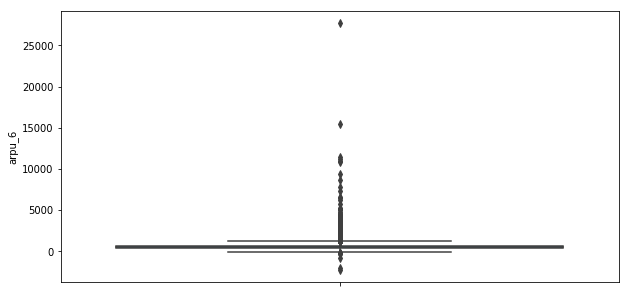

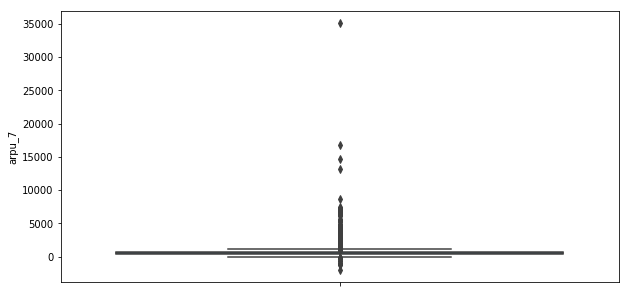

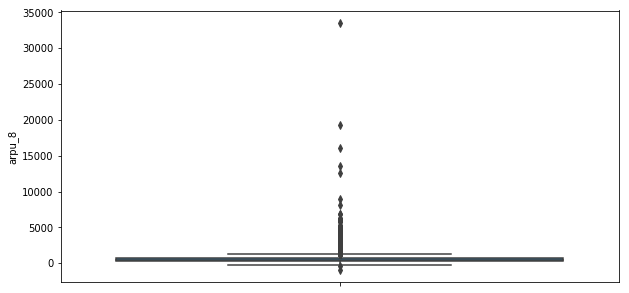

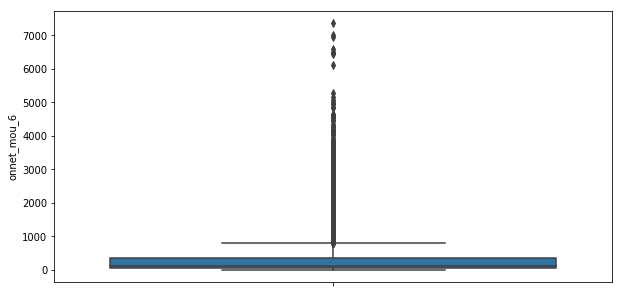

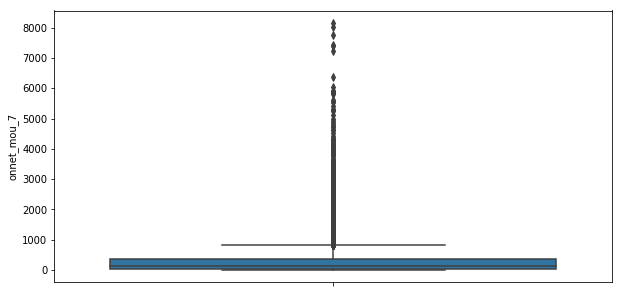

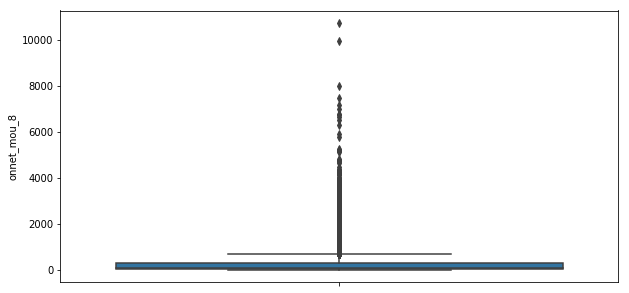

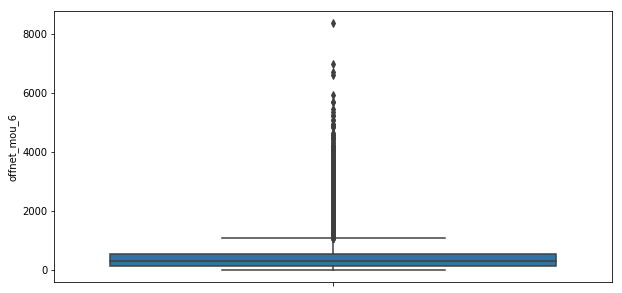

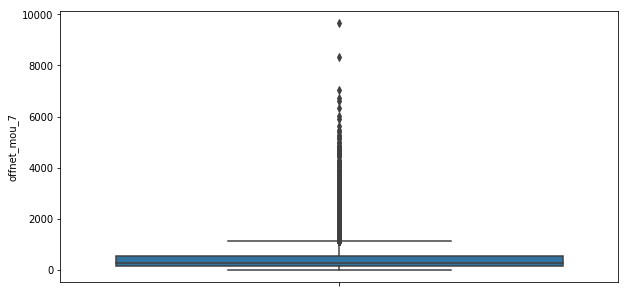

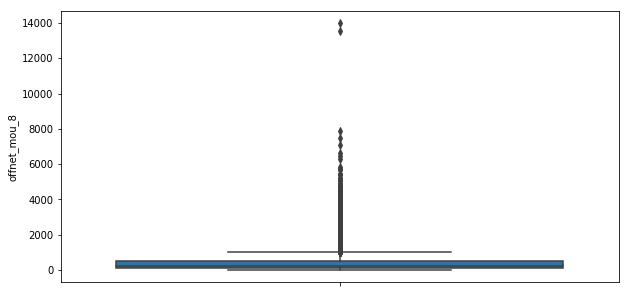

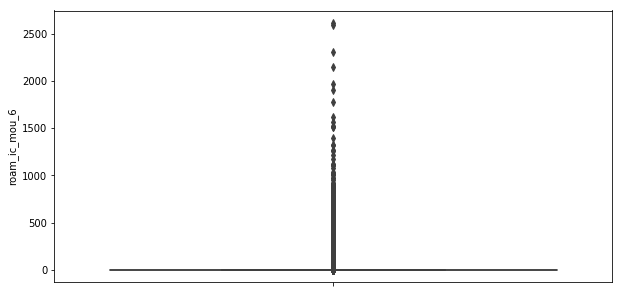

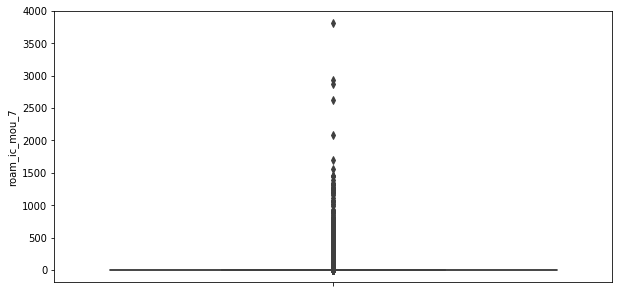

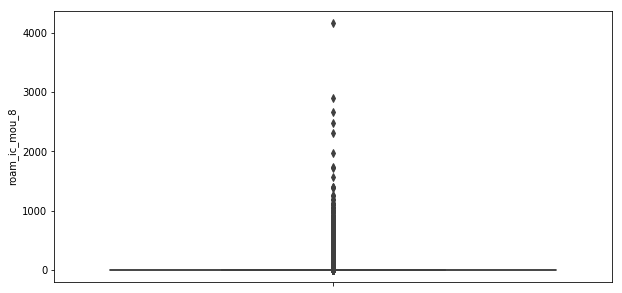

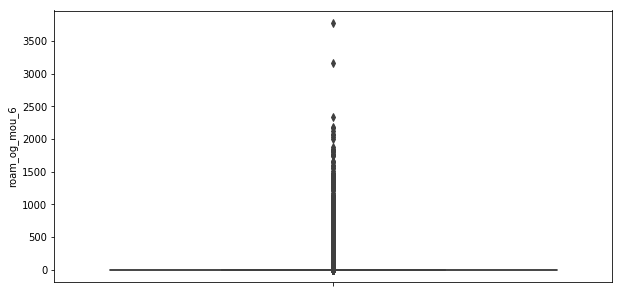

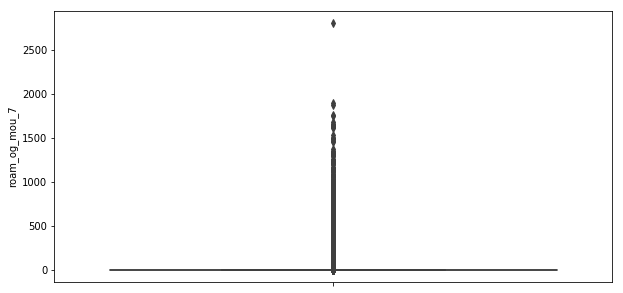

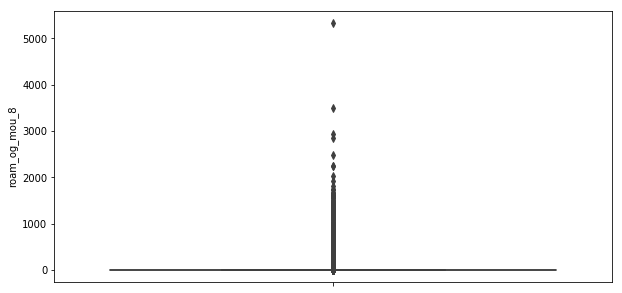

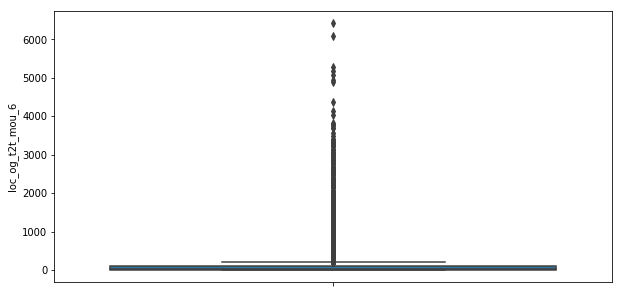

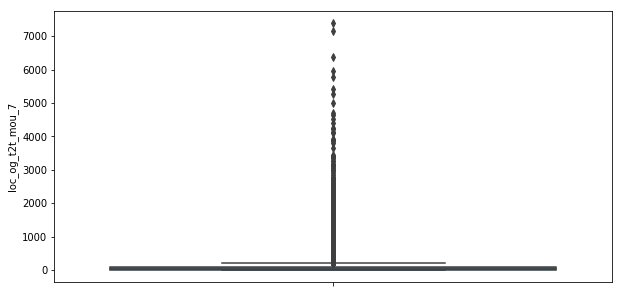

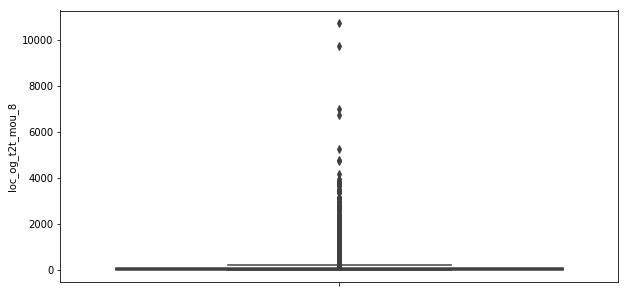

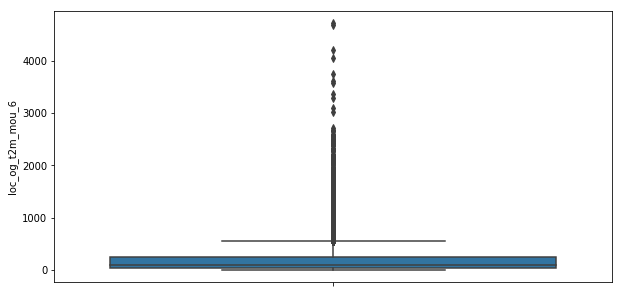

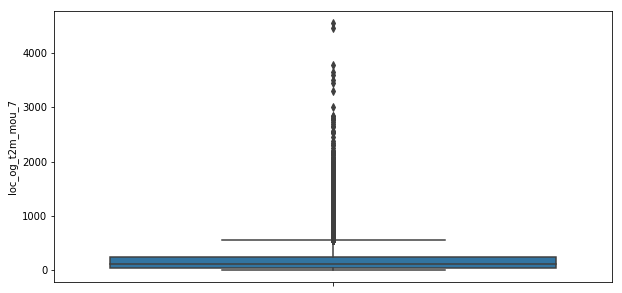

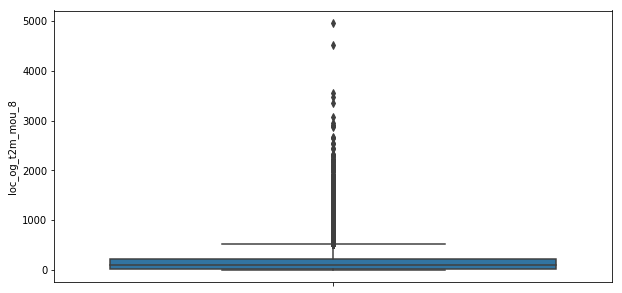

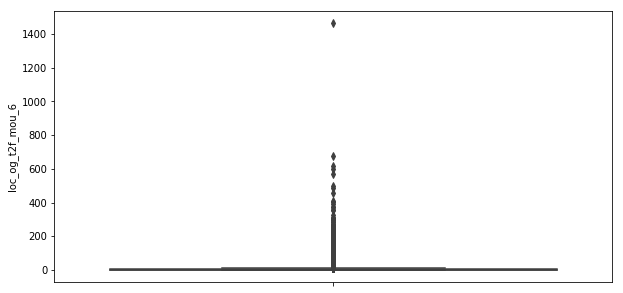

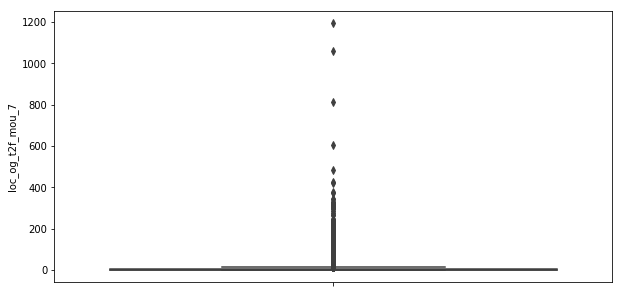

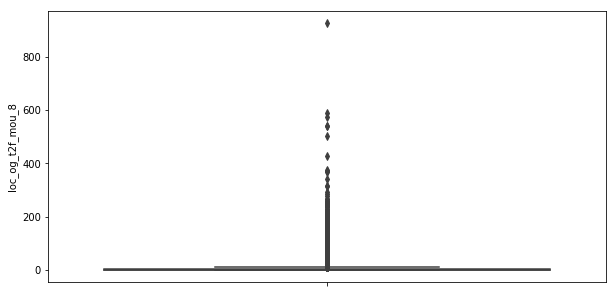

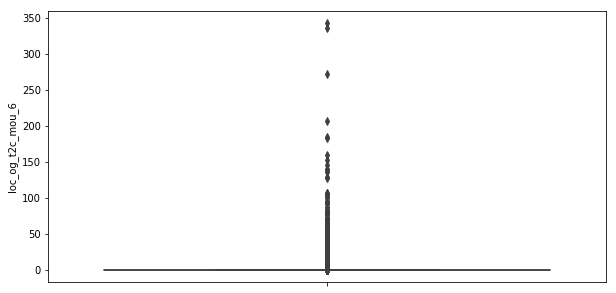

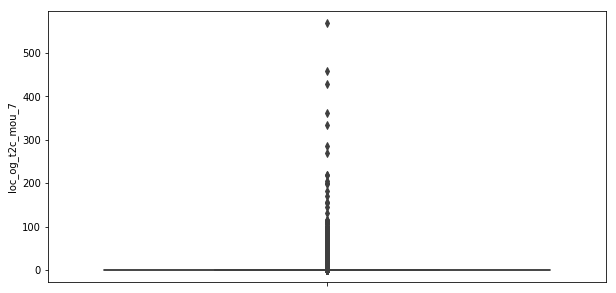

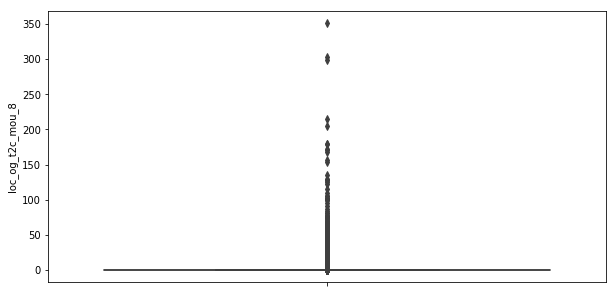

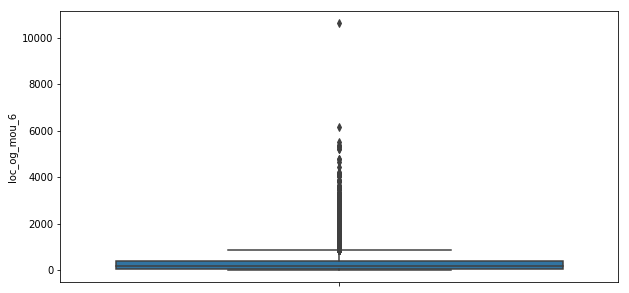

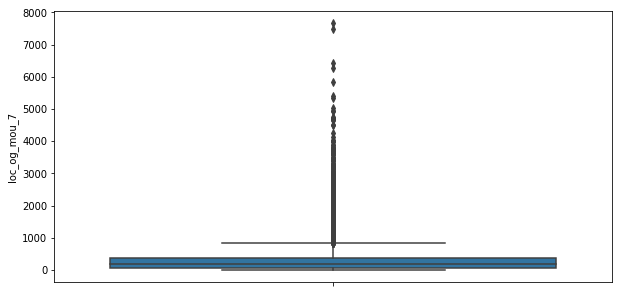

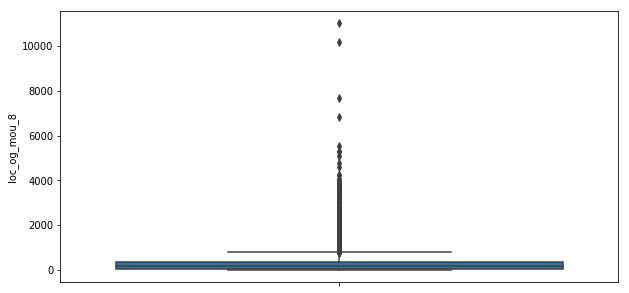

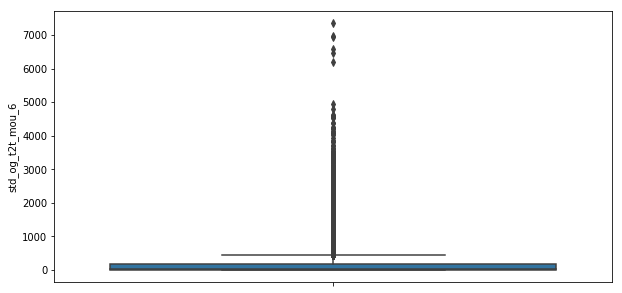

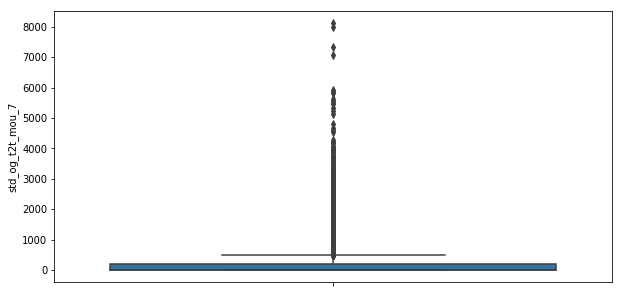

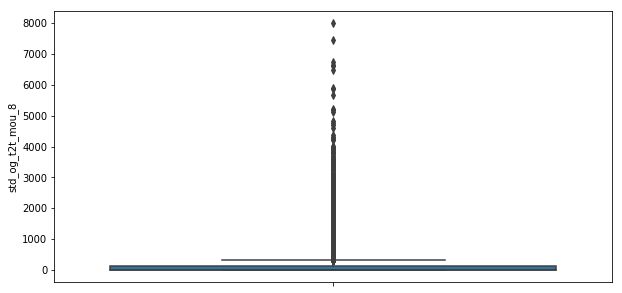

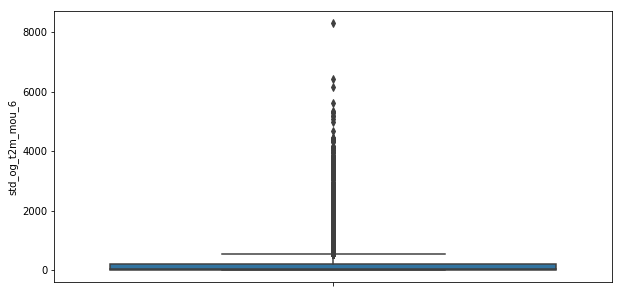

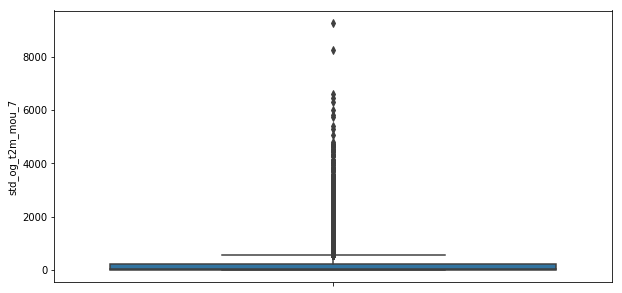

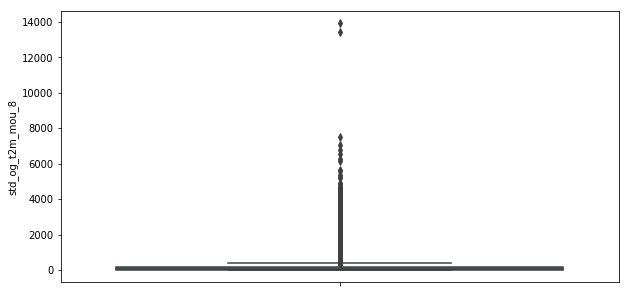

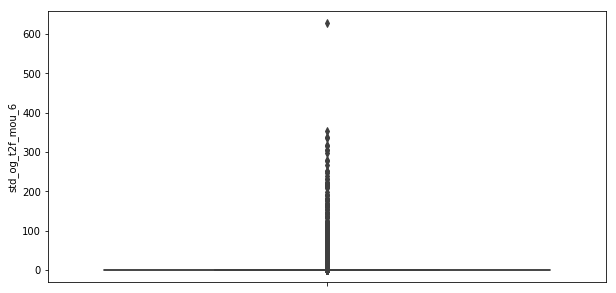

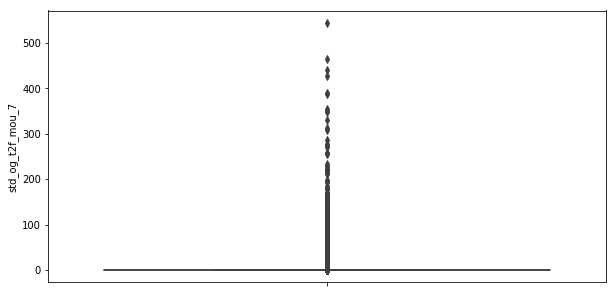

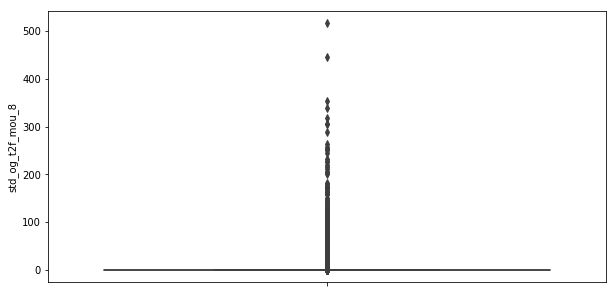

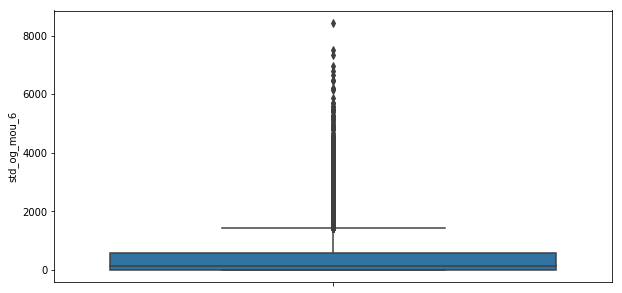

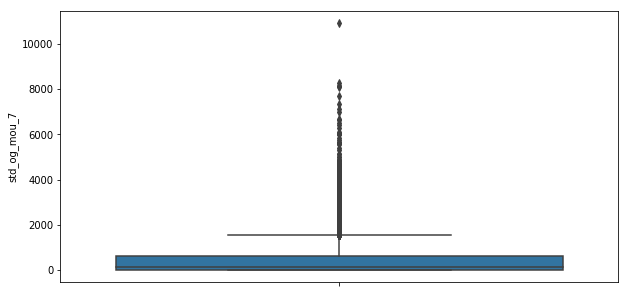

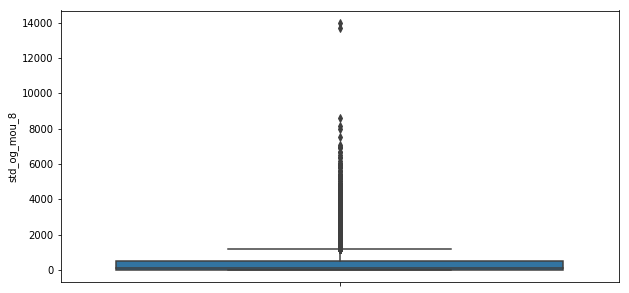

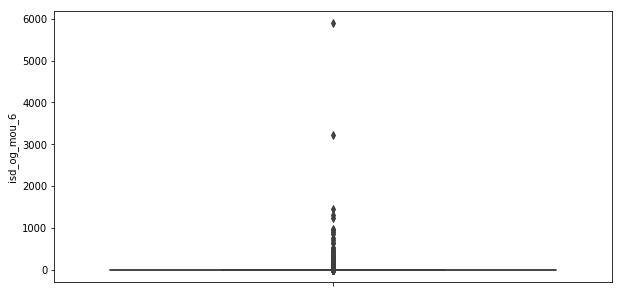

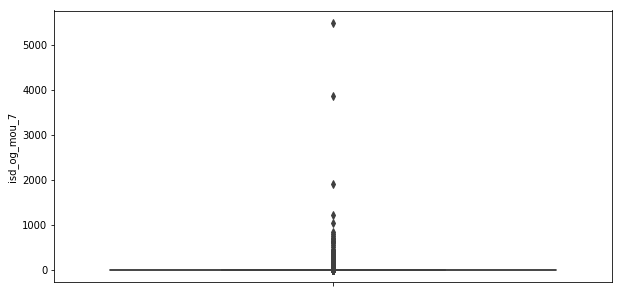

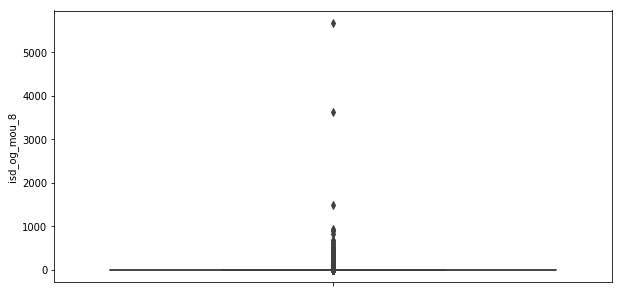

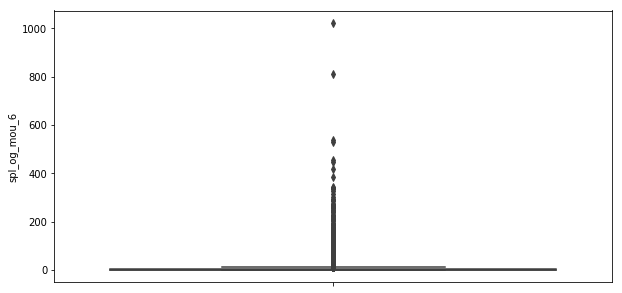

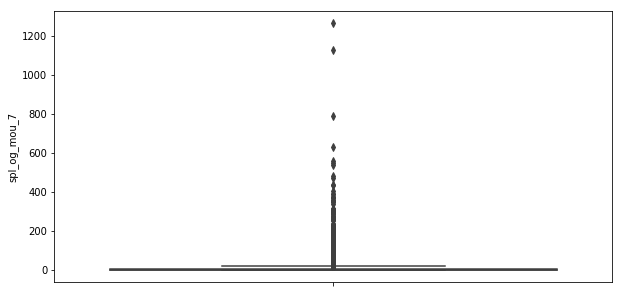

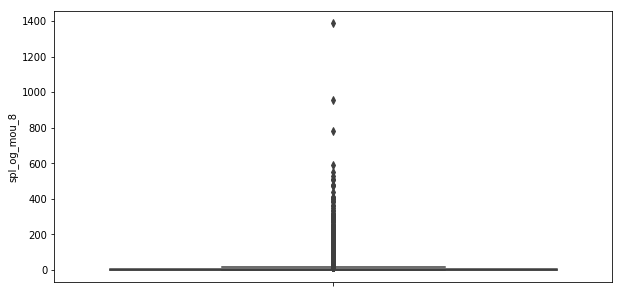

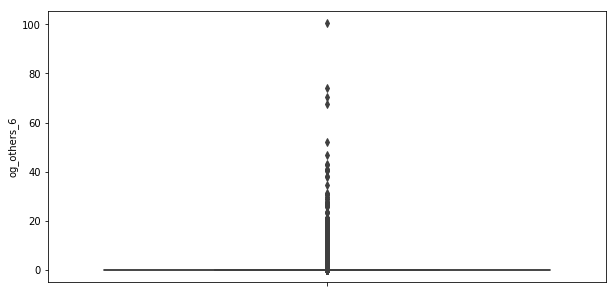

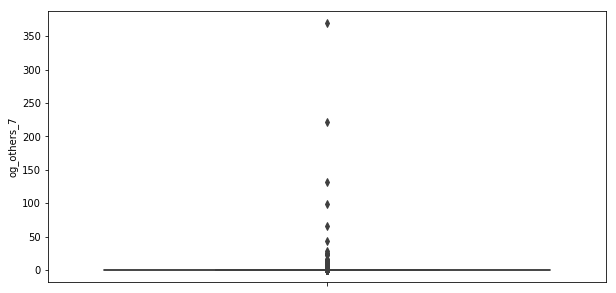

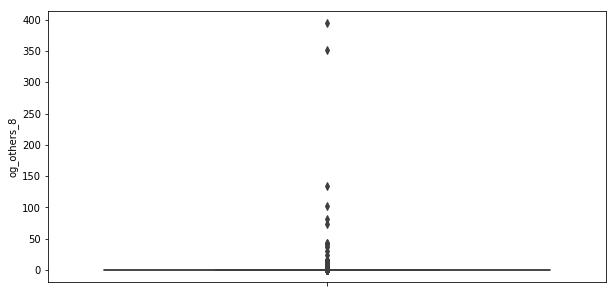

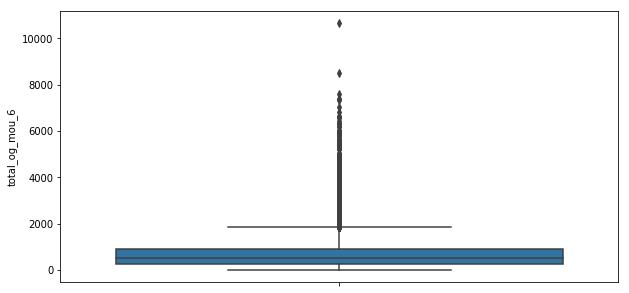

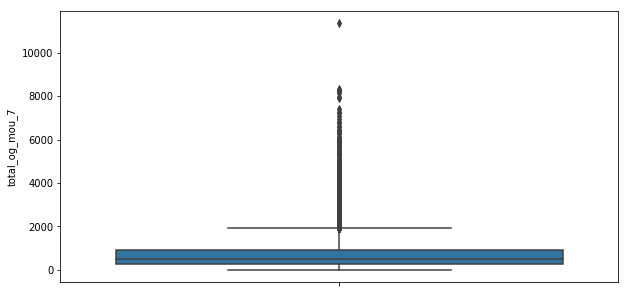

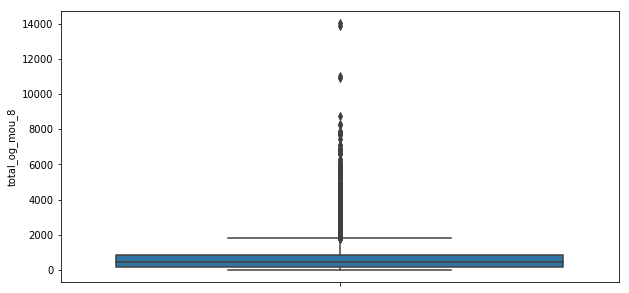

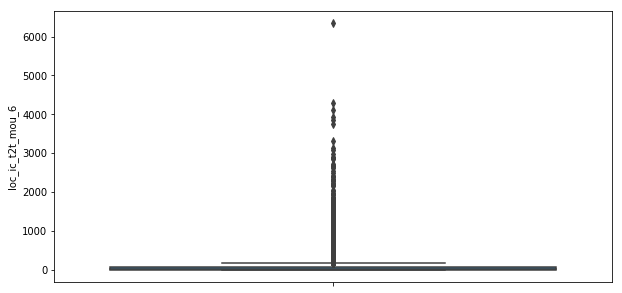

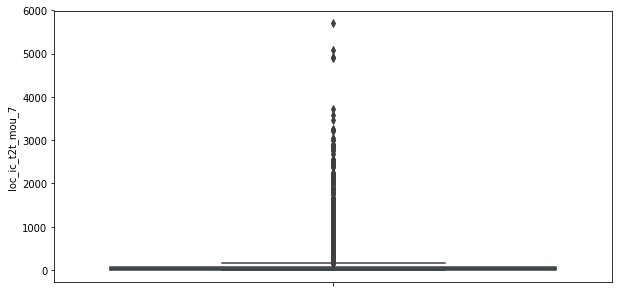

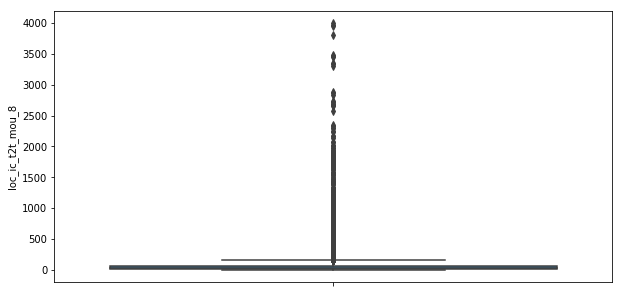

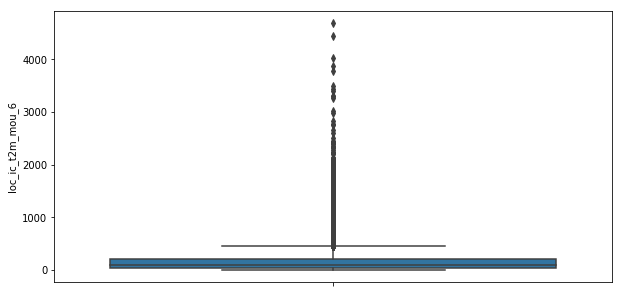

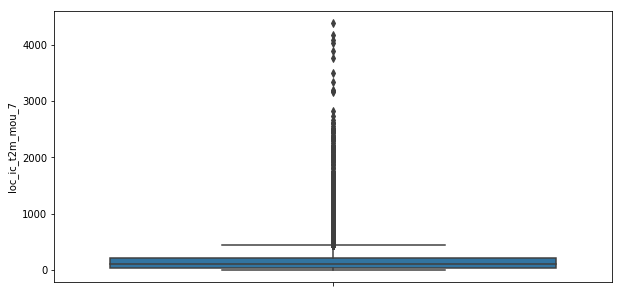

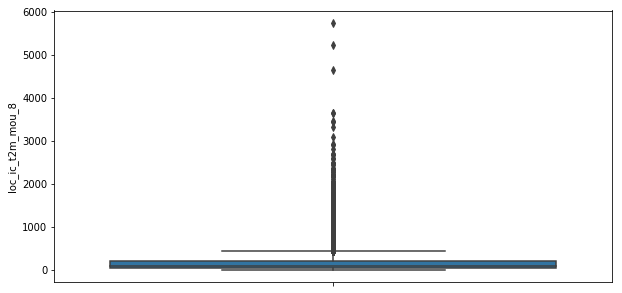

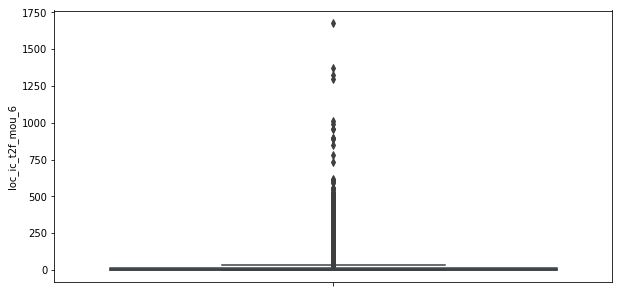

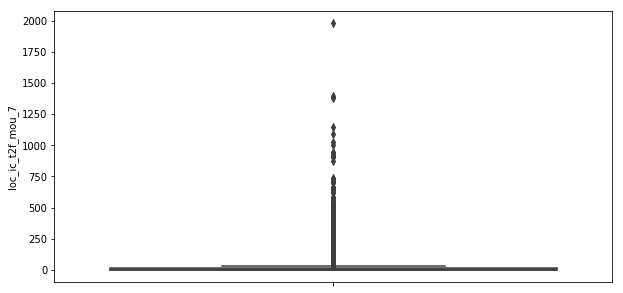

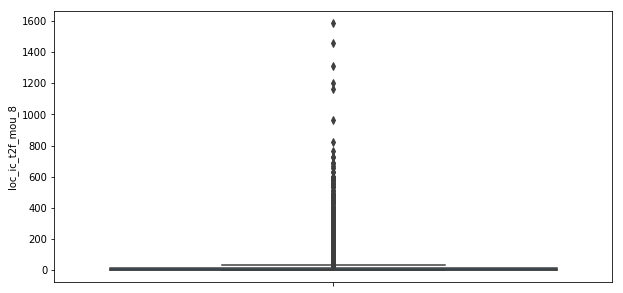

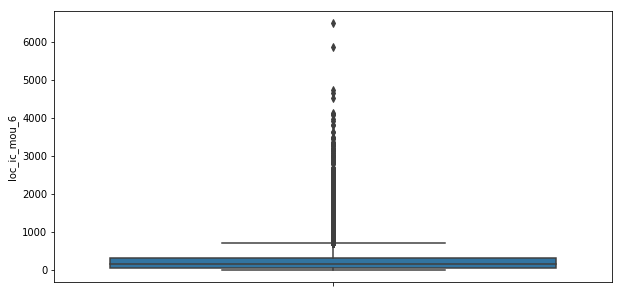

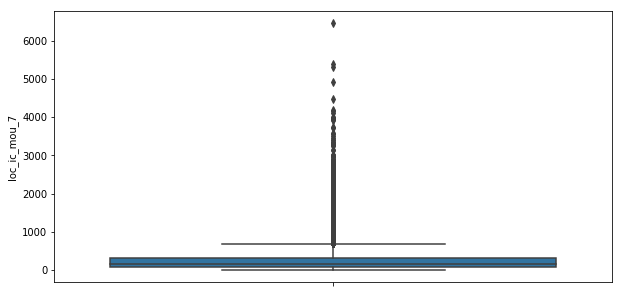

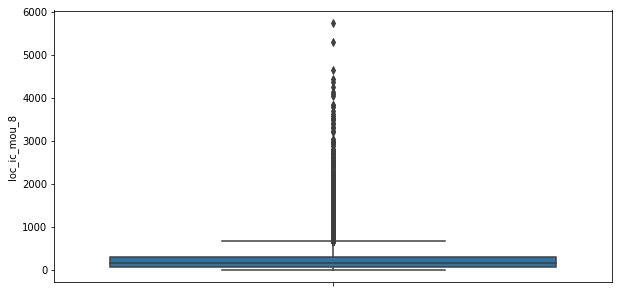

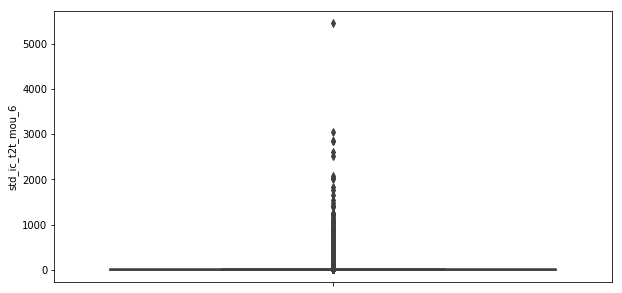

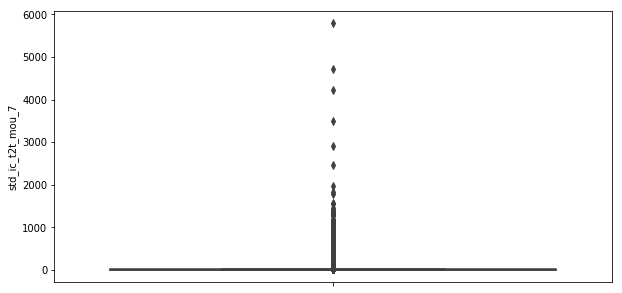

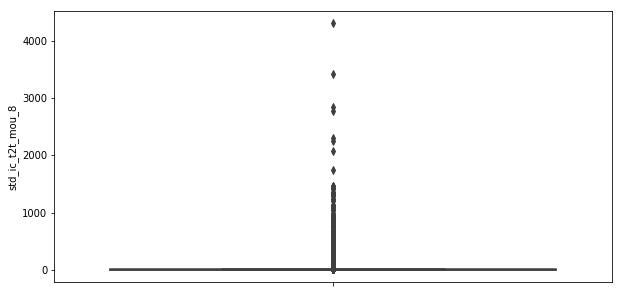

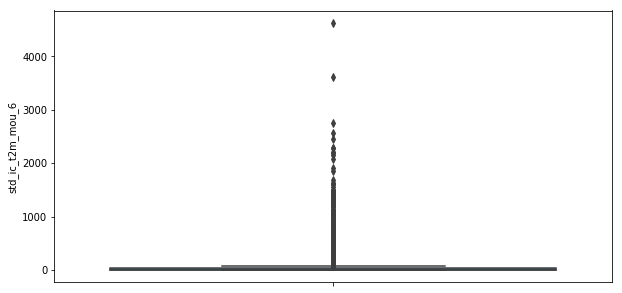

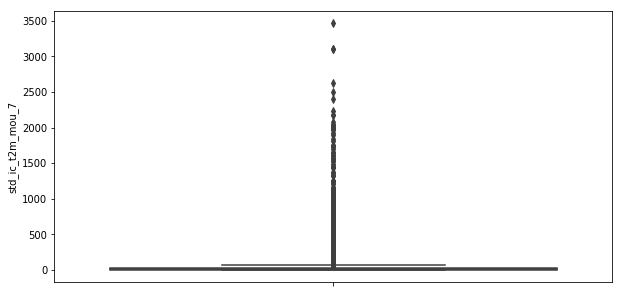

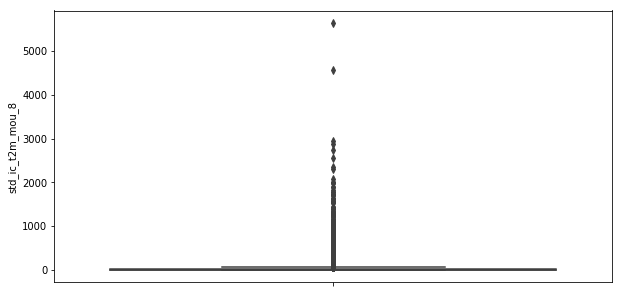

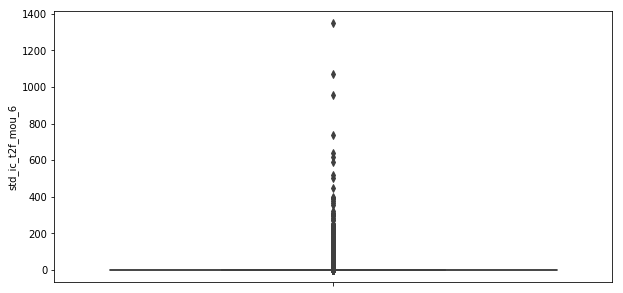

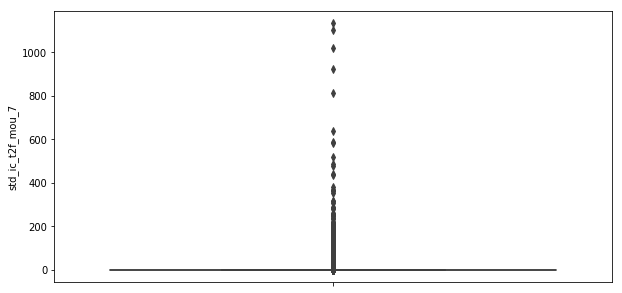

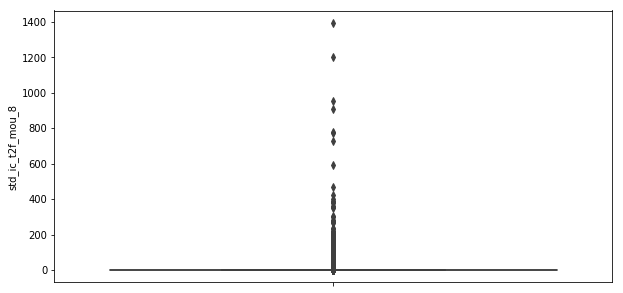

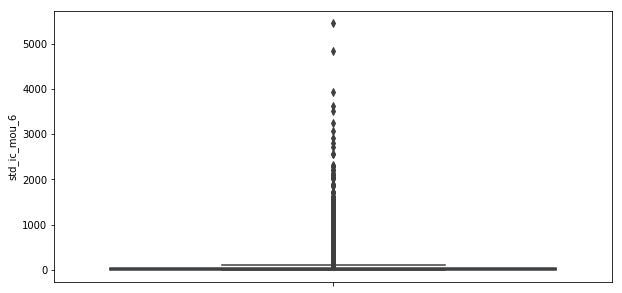

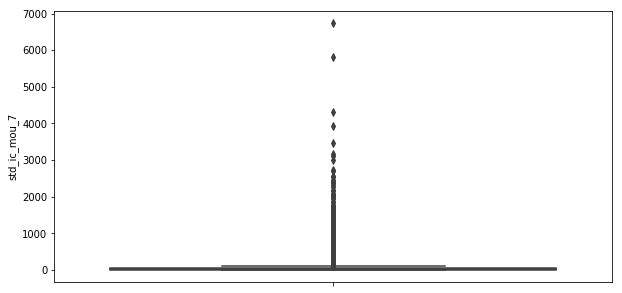

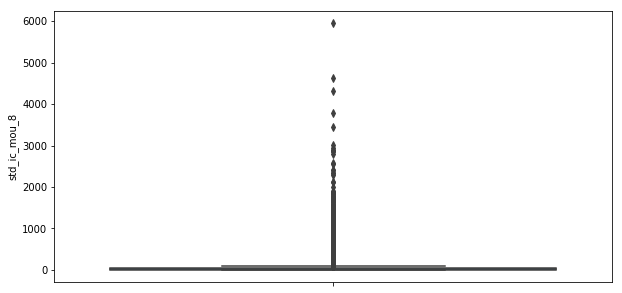

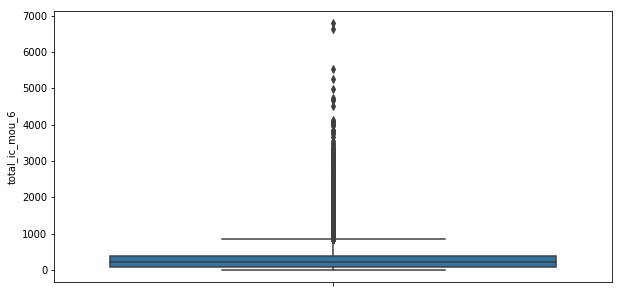

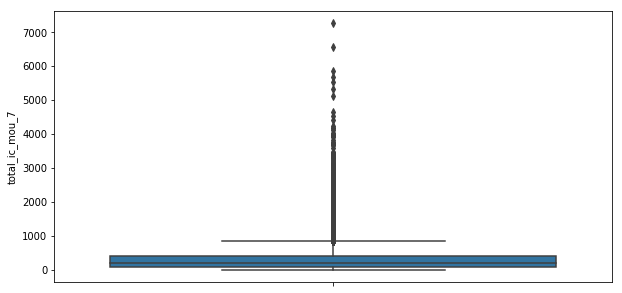

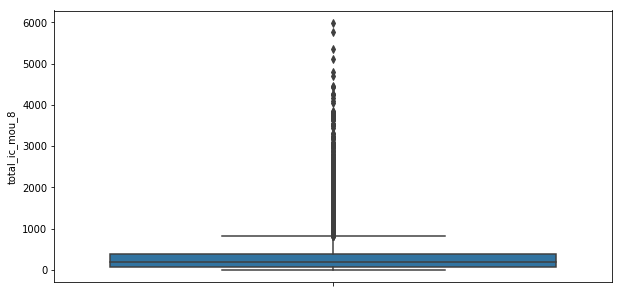

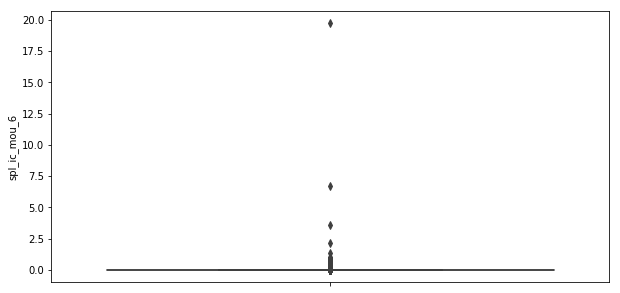

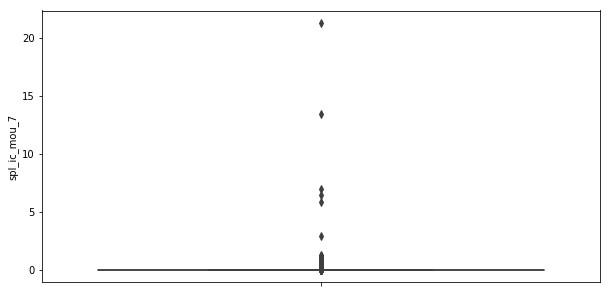

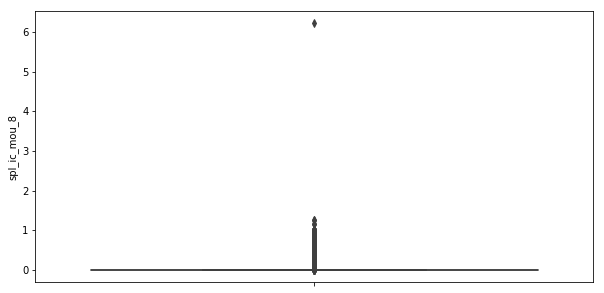

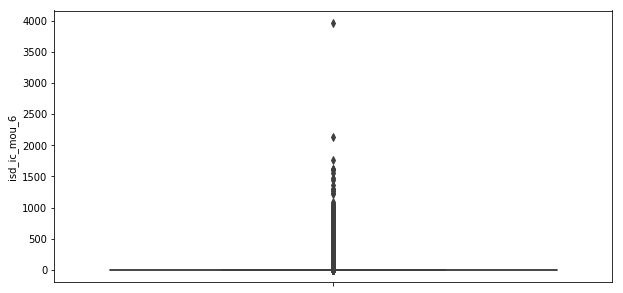

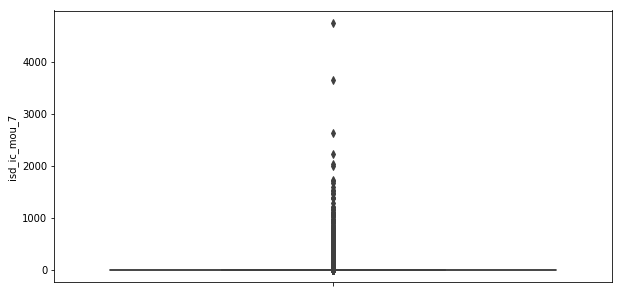

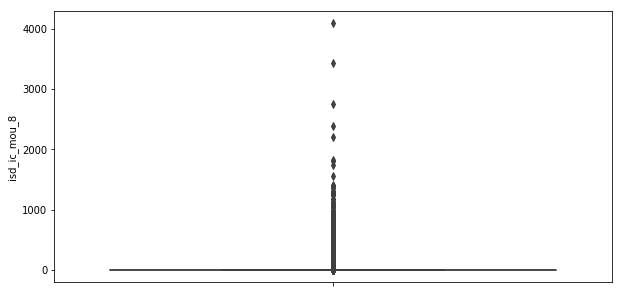

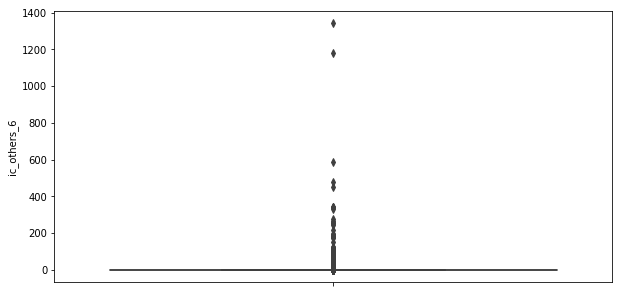

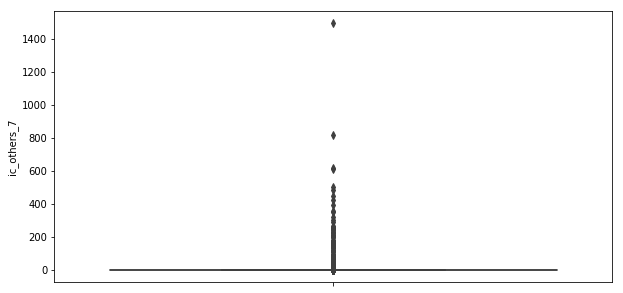

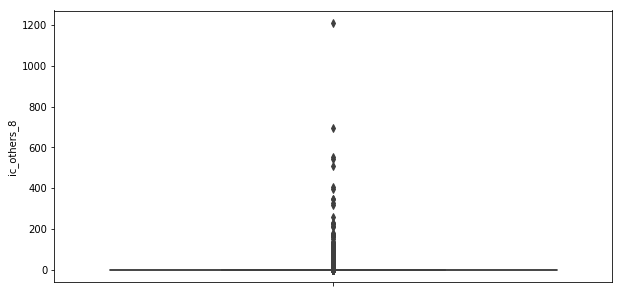

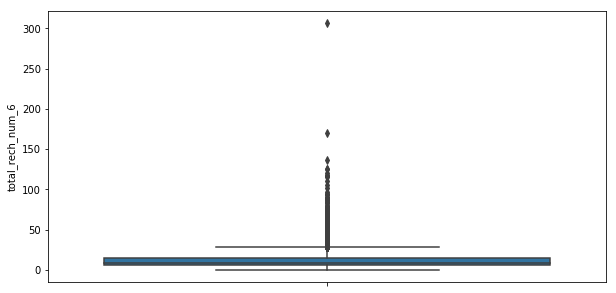

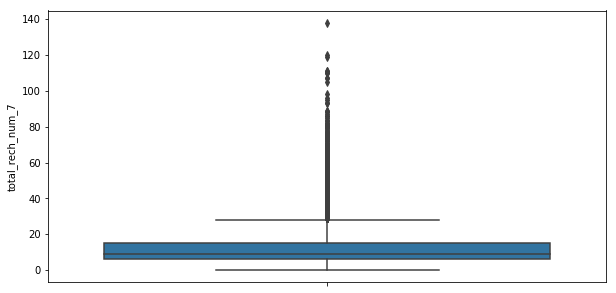

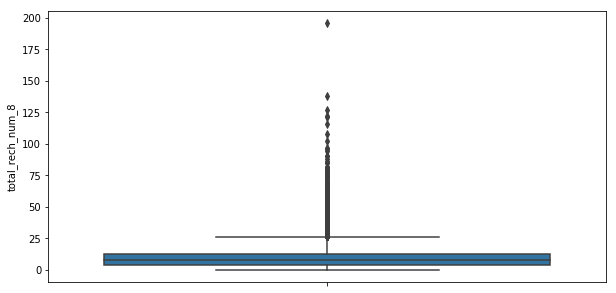

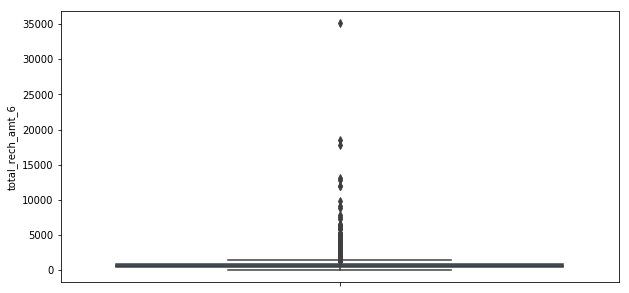

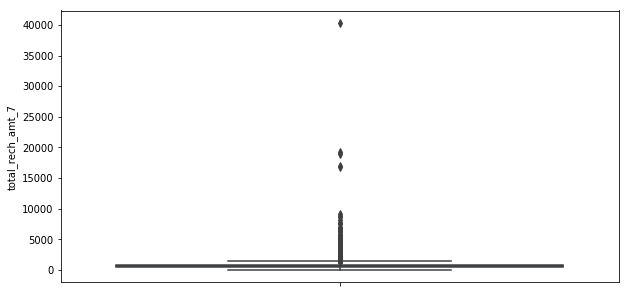

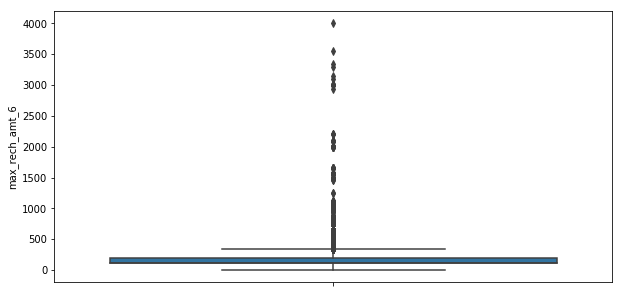

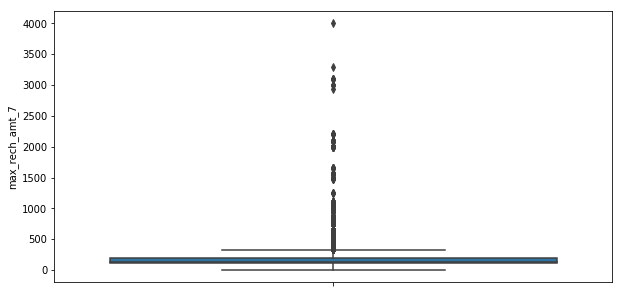

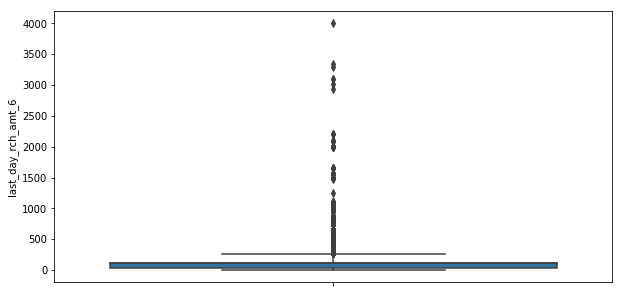

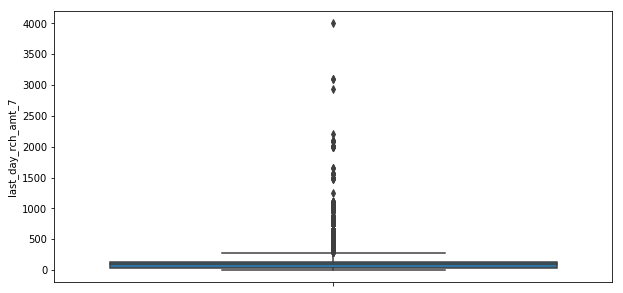

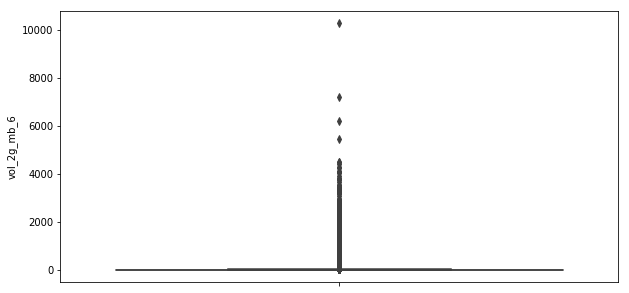

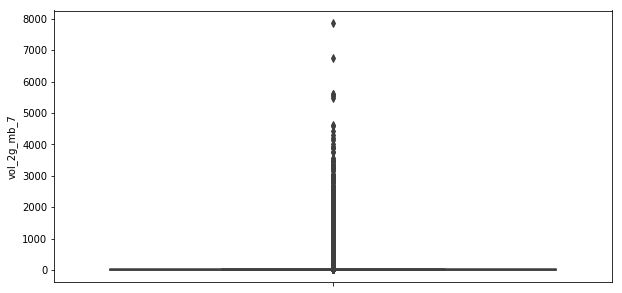

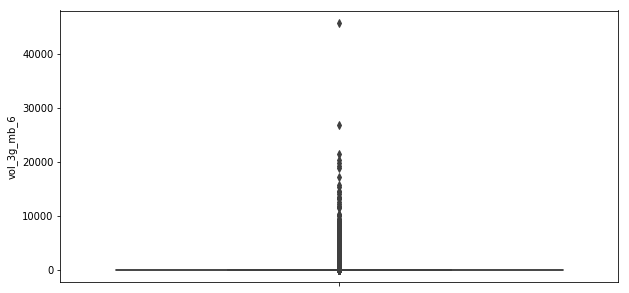

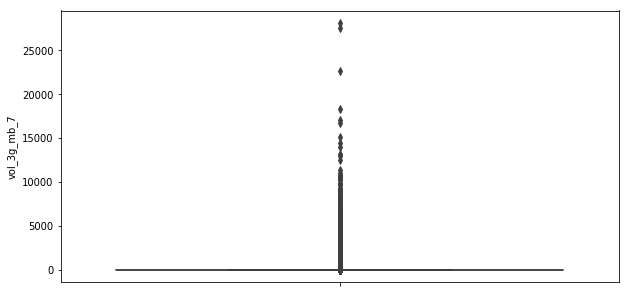

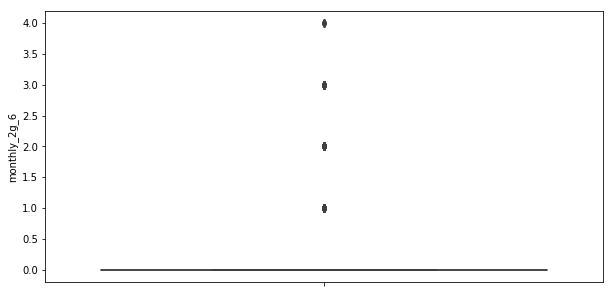

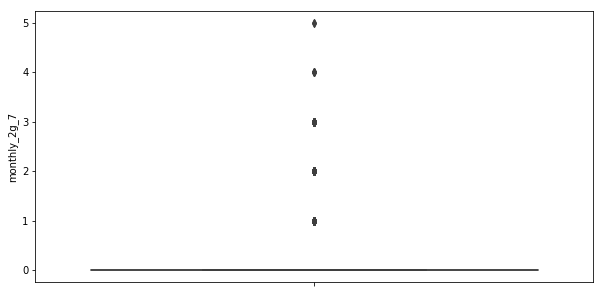

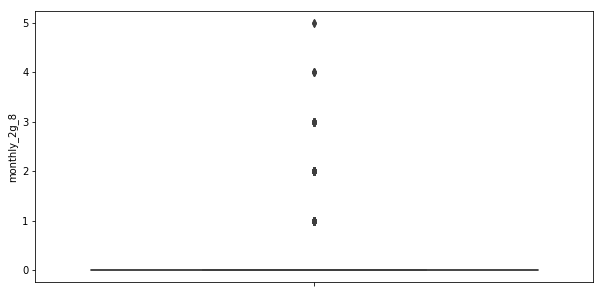

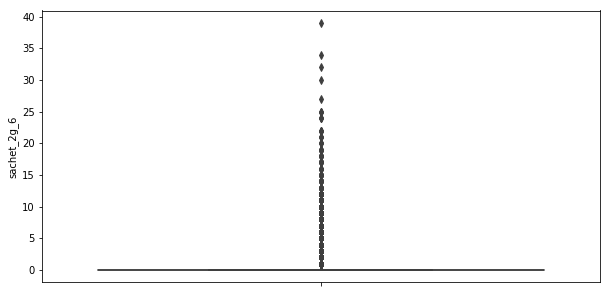

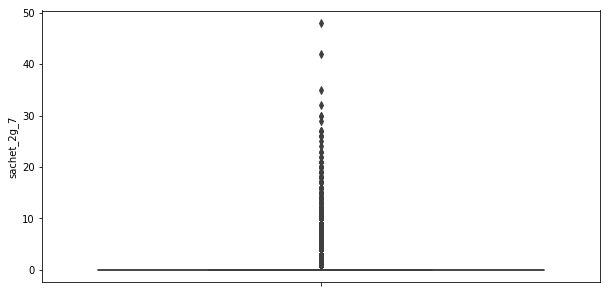

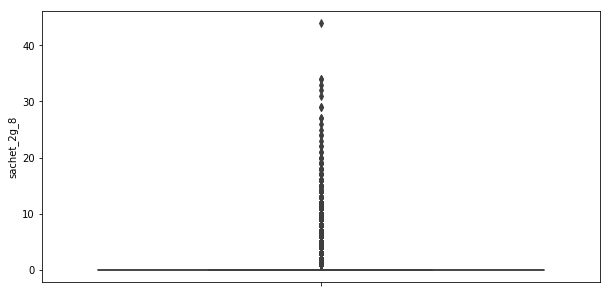

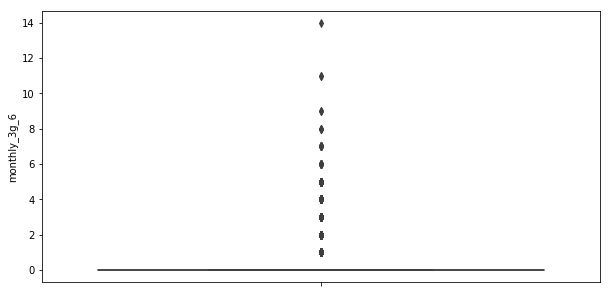

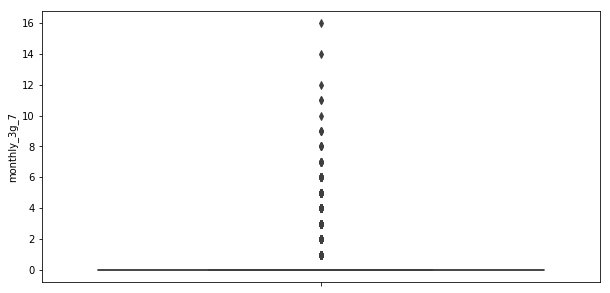

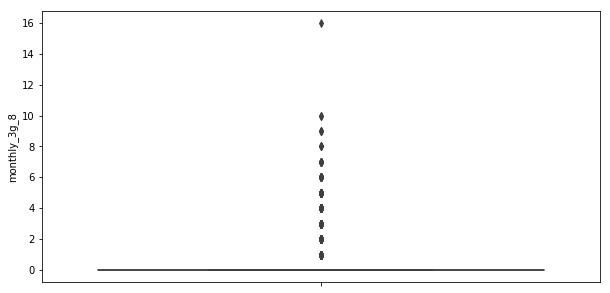

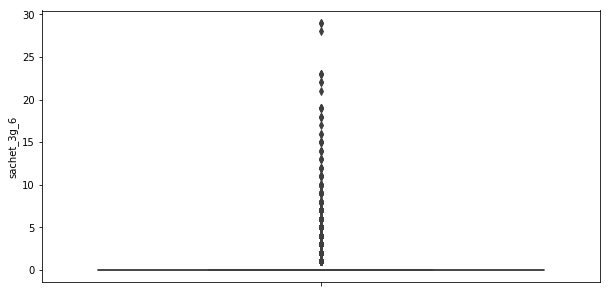

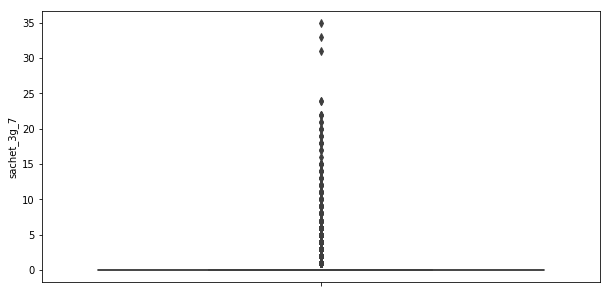

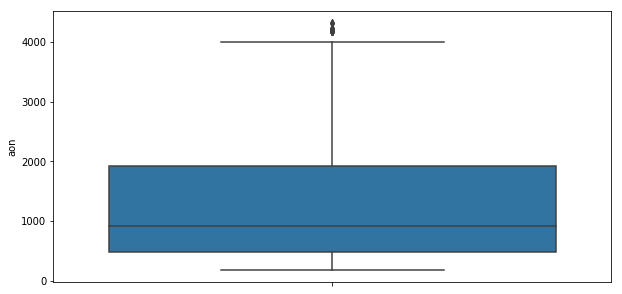

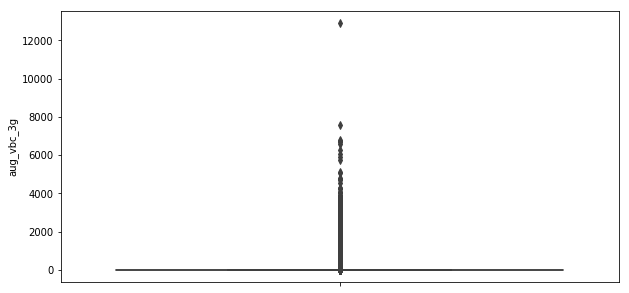

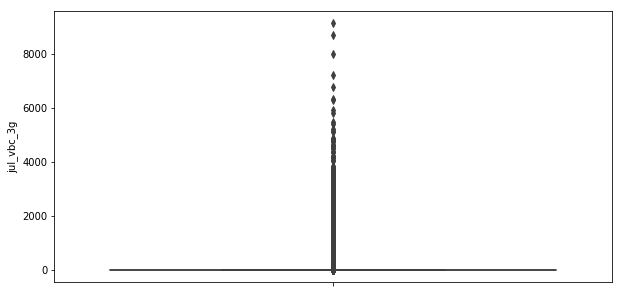

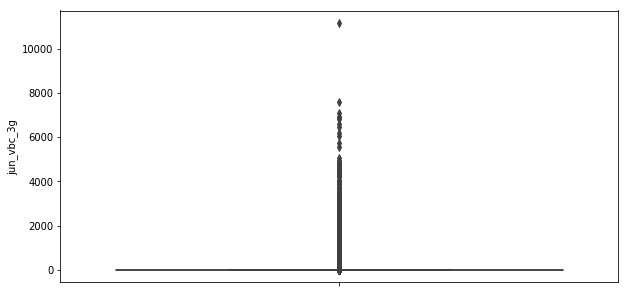

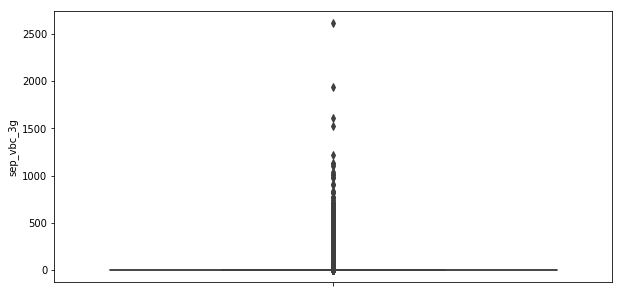

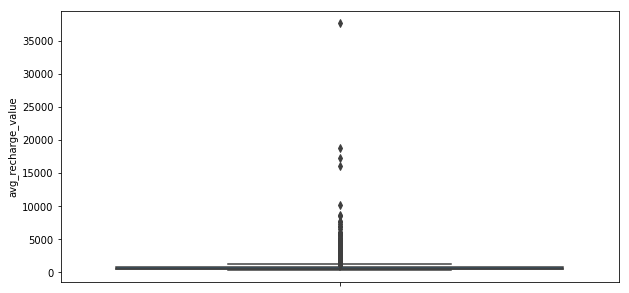

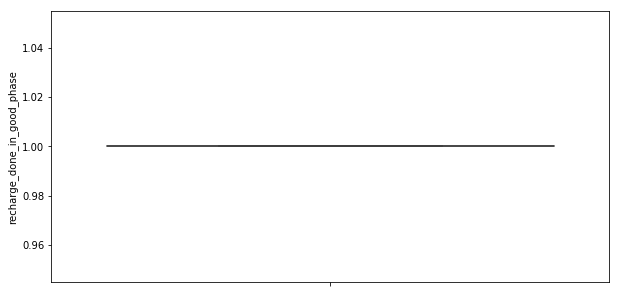

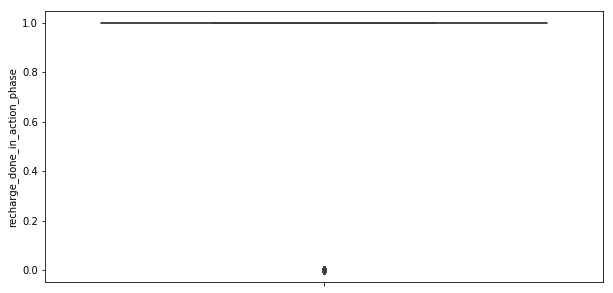

In [24]:
# Lets plot scatterplots of numeric columns to check if outliers does exists
for num_col in list(X._get_numeric_data().columns):
        plt.figure(figsize=(10,5))
        sns.boxplot(x=num_col, data=X, orient="v")
        plt.show()

In [25]:
# Lets do outlier treatment on all of the columns since it looks like majority of them has outliers present by 
# analysing box plots
# Lets perform outlier treatment on copy set to check how much data would be removed in this process
outlier_treatment_dataset = X.copy(deep=True)
print("Shape before outlier treatment ", outlier_treatment_dataset.shape)
for col in outlier_treatment_dataset._get_numeric_data().columns:
    Q1 = outlier_treatment_dataset[col].quantile(0.05)
    Q3 = outlier_treatment_dataset[col].quantile(0.95)
    IQR = Q3 - Q1
    outlier_treatment_dataset = outlier_treatment_dataset[(outlier_treatment_dataset[col] >= Q1 - 1.5*IQR) & (outlier_treatment_dataset[col] <= Q3 + 1.5*IQR)]

print("Shape after outlier treatment ", outlier_treatment_dataset.shape)

Shape before outlier treatment  (29979, 122)
Shape after outlier treatment  (10272, 122)


In [26]:
# It looks like if we do outlier treatment with IQR on all columns, we are massively loosing the dataset
# So, lets cap the outliers in the dataset instead of removing them
print("Shape before outlier treatment ", X.shape)
for col in X.columns:
    percentiles = X[col].quantile([0.01,0.99]).values
    X[col] = np.clip(X[col], percentiles[0], percentiles[1])

print("Shape after outlier treatment ", X.shape)

Shape before outlier treatment  (29979, 122)
Shape after outlier treatment  (29979, 122)


In [27]:
# Lets check the skew on all the columns
for col in X.columns:
    print(col, "->", X[col].skew())
        

arpu_6 -> 1.6604891960900132
arpu_7 -> 1.712034165152432
arpu_8 -> 1.443607341461161
onnet_mou_6 -> 2.4580378172303345
onnet_mou_7 -> 2.442242407953746
onnet_mou_8 -> 2.7056941379965247
offnet_mou_6 -> 2.2038663733519708
offnet_mou_7 -> 2.2269208515678662
offnet_mou_8 -> 2.2271848929782228
roam_ic_mou_6 -> 4.776230228446365
roam_ic_mou_7 -> 5.230589525667658
roam_ic_mou_8 -> 5.2423489953365765
roam_og_mou_6 -> 4.444192802108208
roam_og_mou_7 -> 4.783465504862882
roam_og_mou_8 -> 4.847497682709755
loc_og_t2t_mou_6 -> 3.976796928643458
loc_og_t2t_mou_7 -> 3.959377773517341
loc_og_t2t_mou_8 -> 3.84664286164293
loc_og_t2m_mou_6 -> 2.2003622191925376
loc_og_t2m_mou_7 -> 2.144123610393218
loc_og_t2m_mou_8 -> 2.2208319142299913
loc_og_t2f_mou_6 -> 3.7496789839958873
loc_og_t2f_mou_7 -> 3.712798873214731
loc_og_t2f_mou_8 -> 3.8050801107560064
loc_og_t2c_mou_6 -> 4.075189712170194
loc_og_t2c_mou_7 -> 4.0458758760633176
loc_og_t2c_mou_8 -> 4.231878984664314
loc_og_mou_6 -> 2.2700907723889387
loc

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


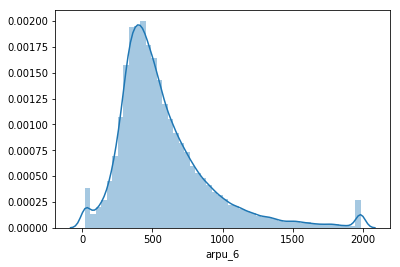

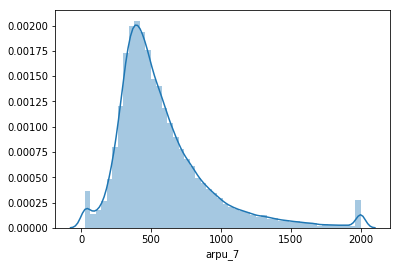

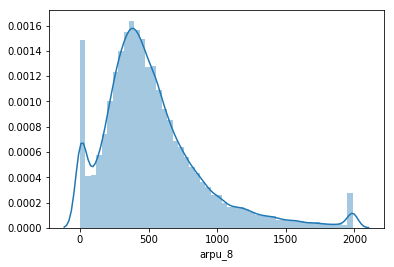

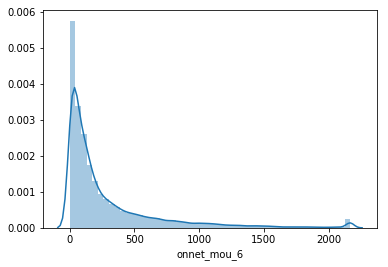

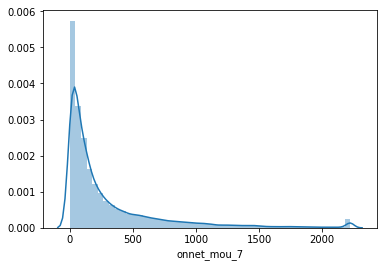

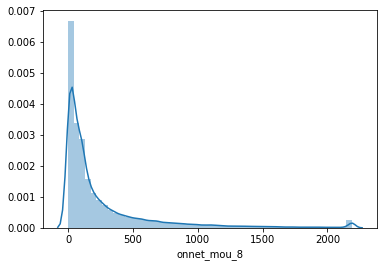

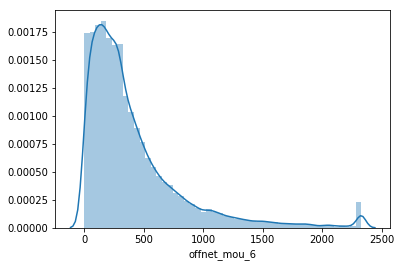

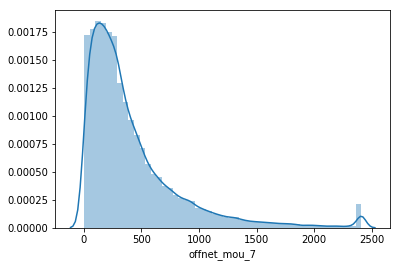

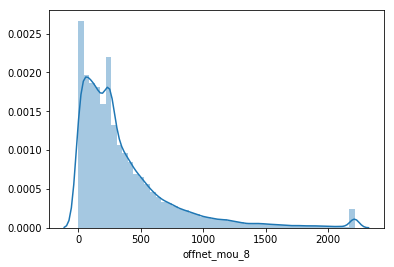

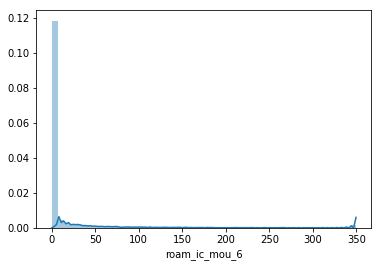

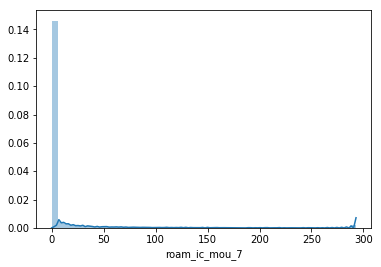

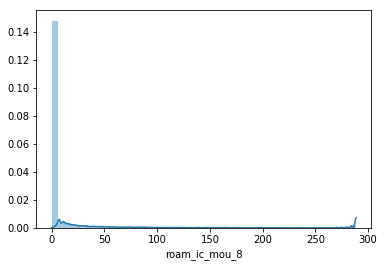

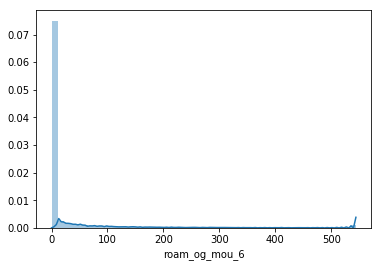

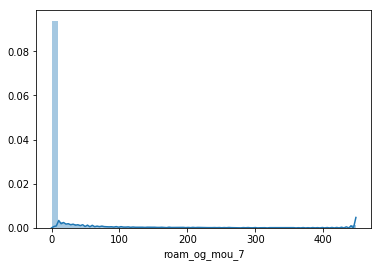

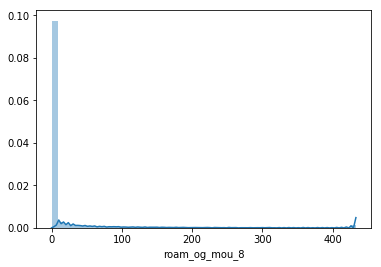

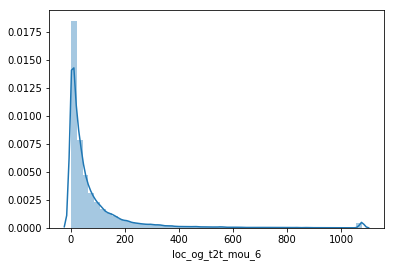

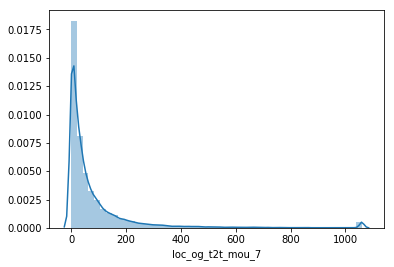

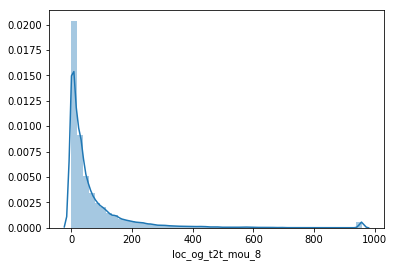

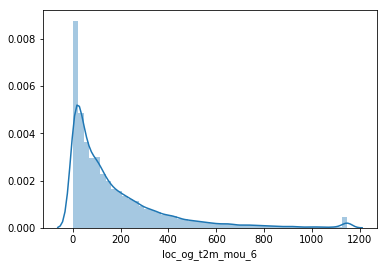

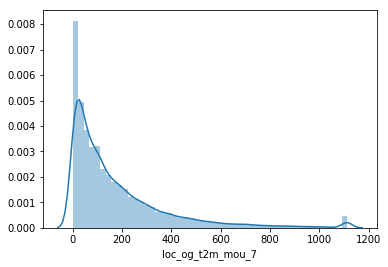

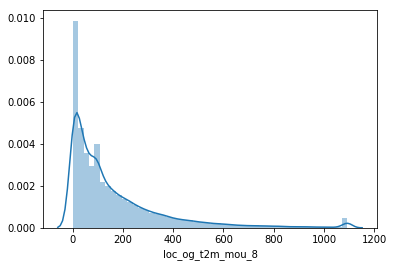

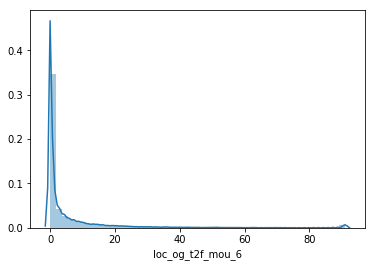

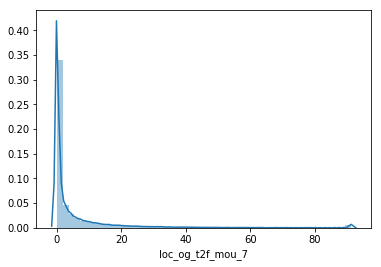

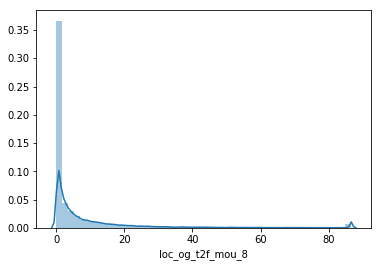

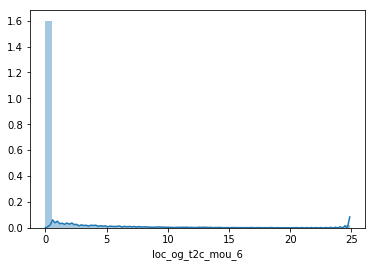

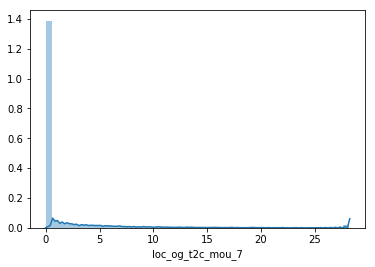

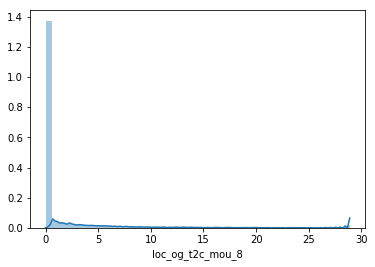

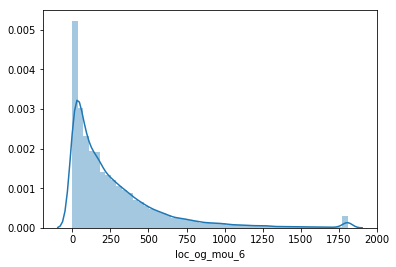

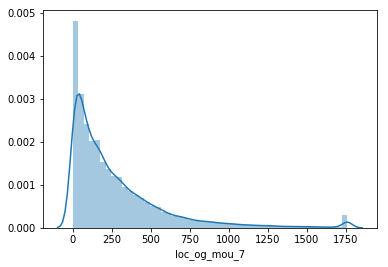

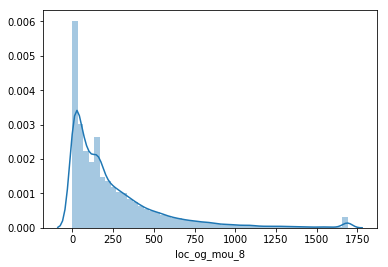

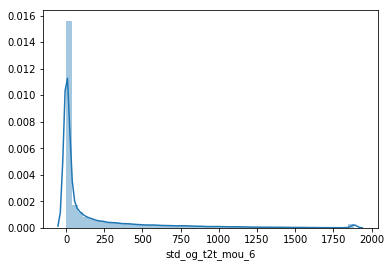

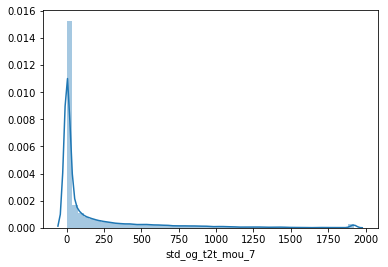

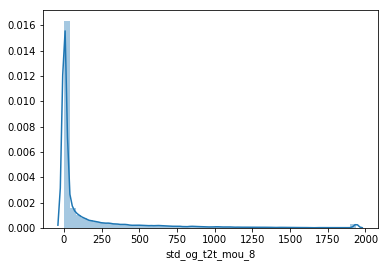

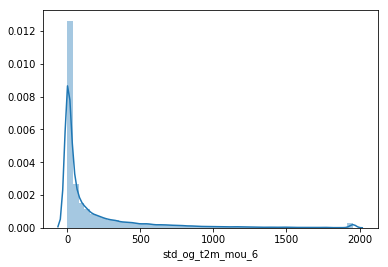

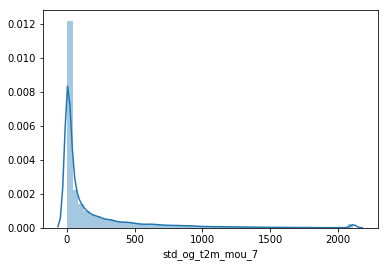

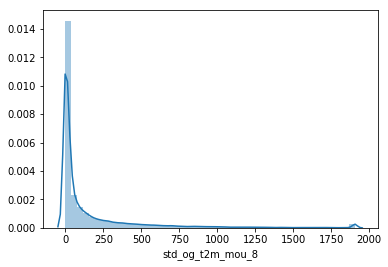

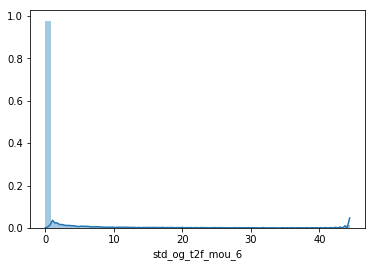

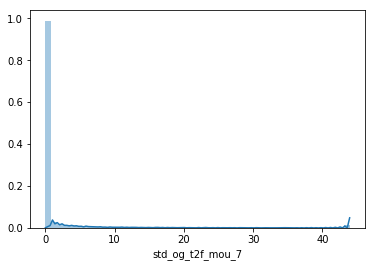

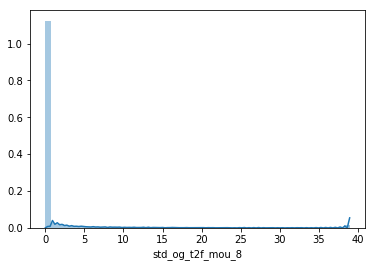

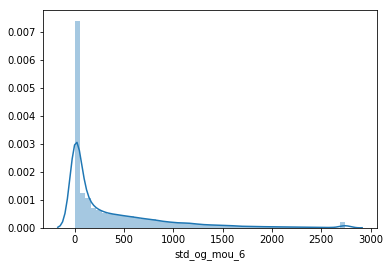

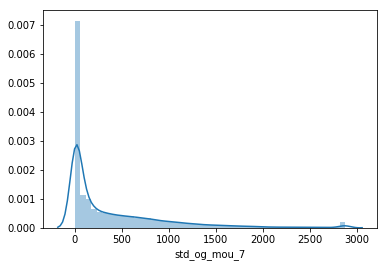

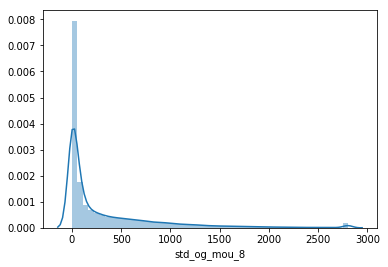

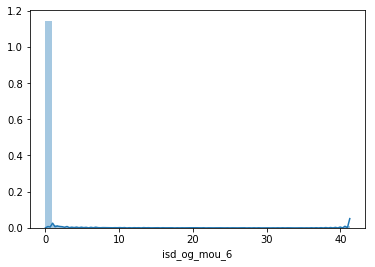

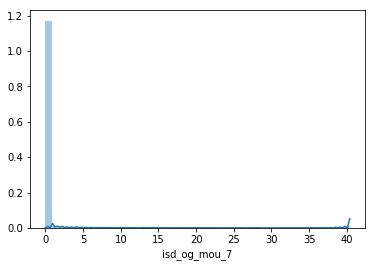

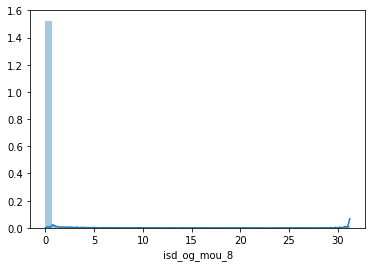

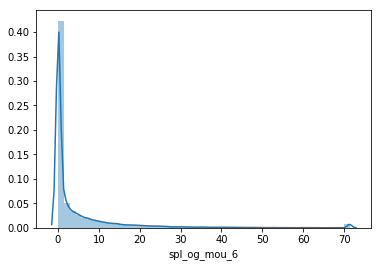

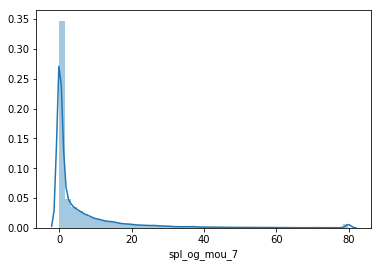

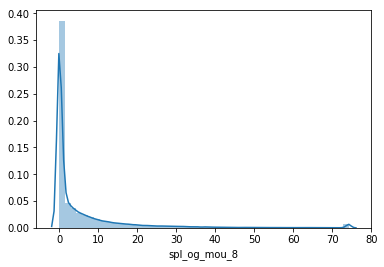

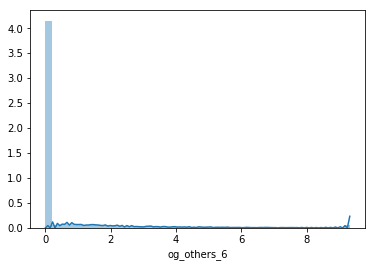

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


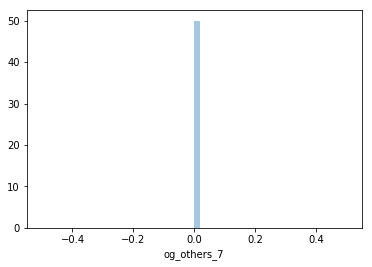

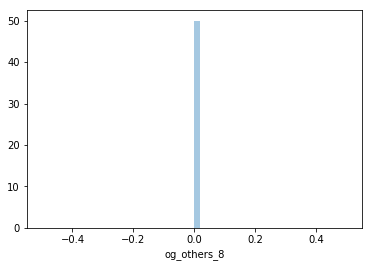

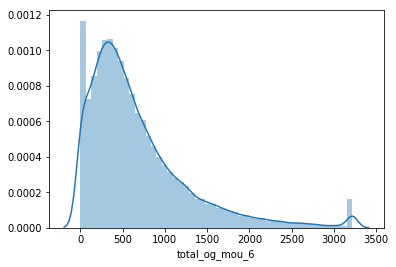

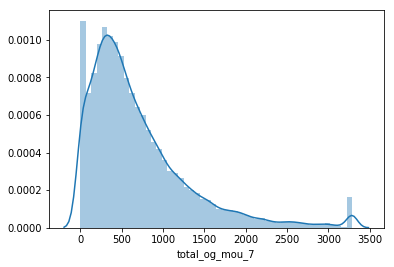

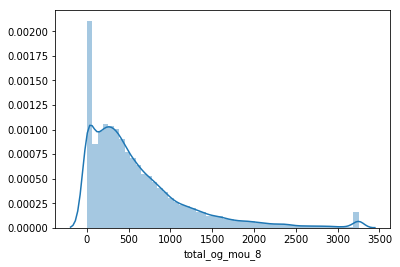

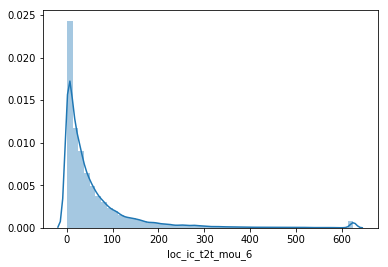

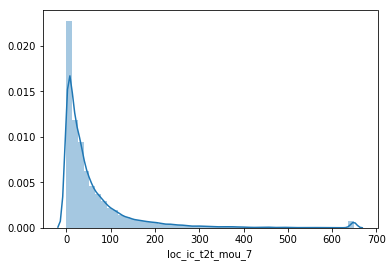

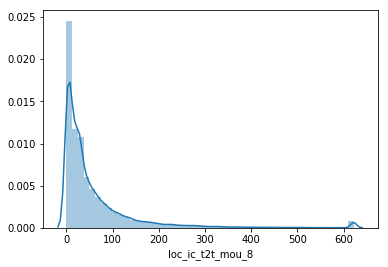

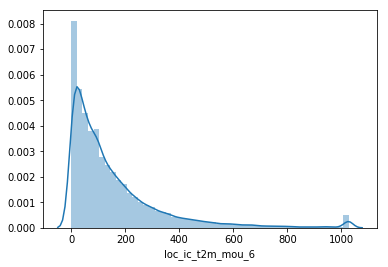

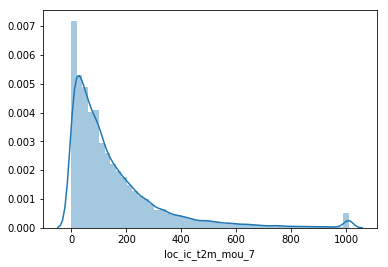

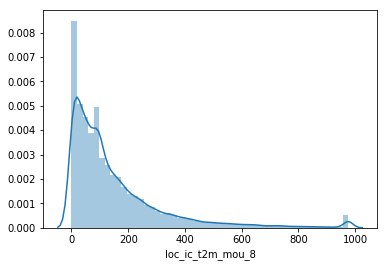

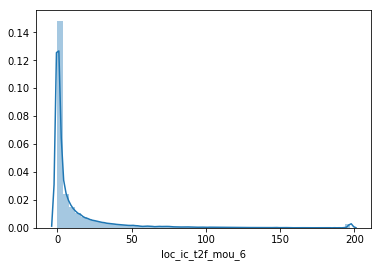

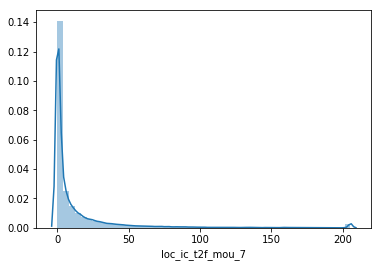

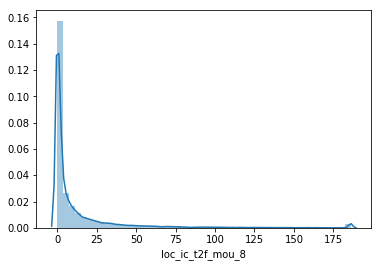

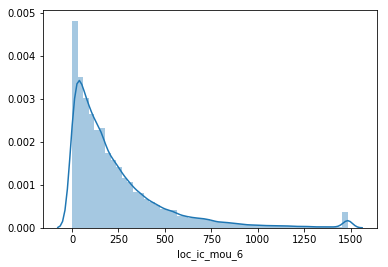

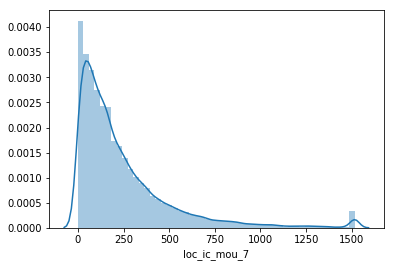

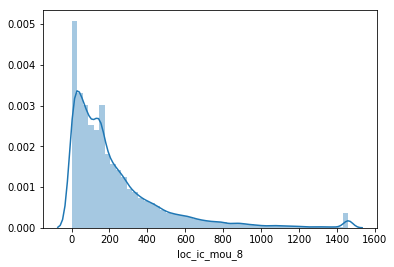

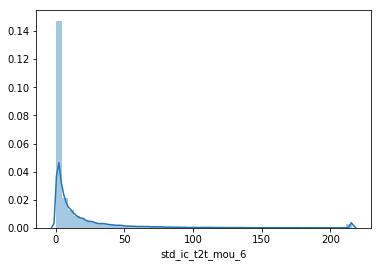

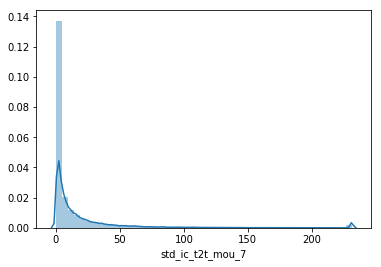

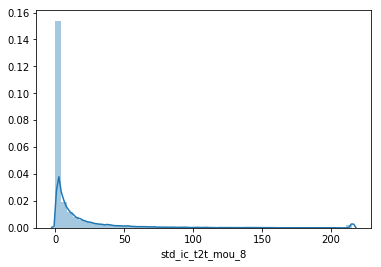

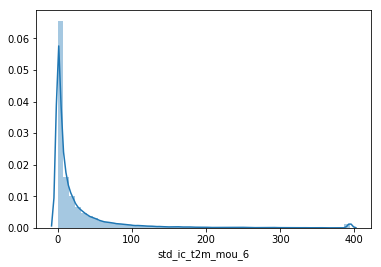

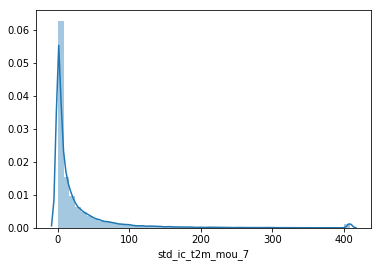

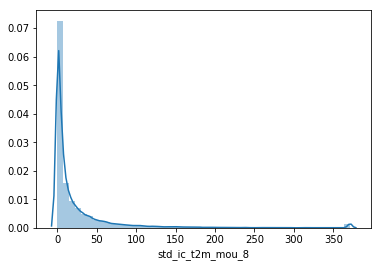

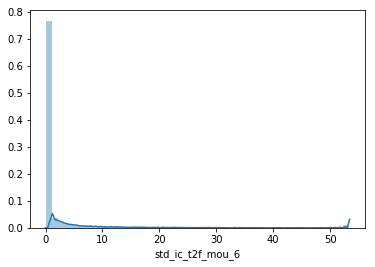

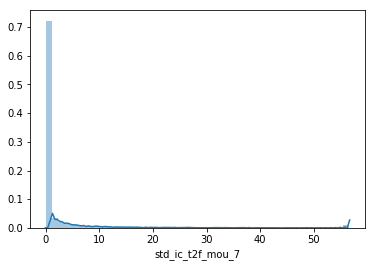

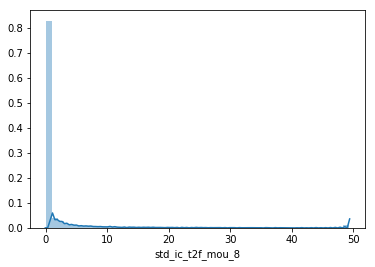

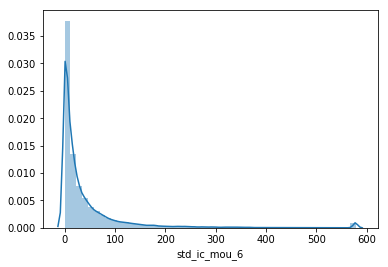

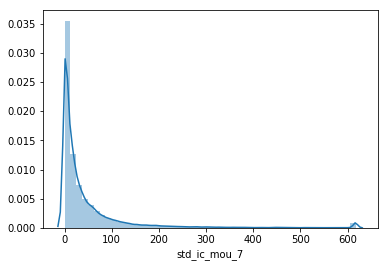

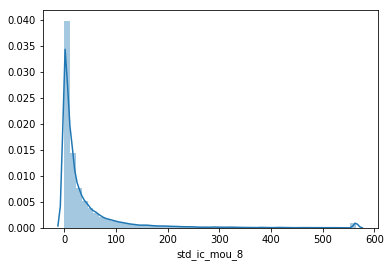

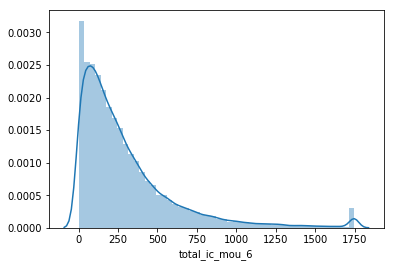

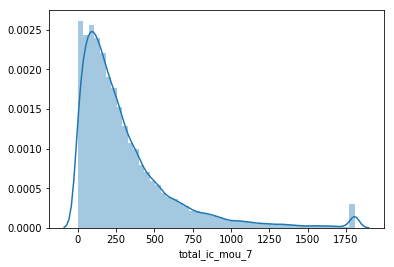

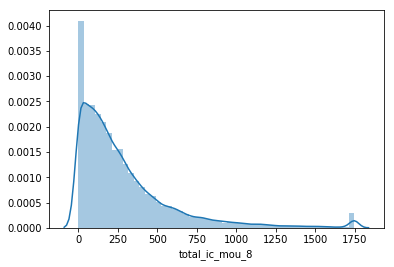

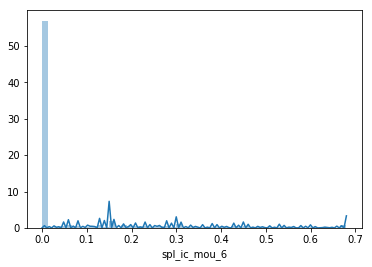

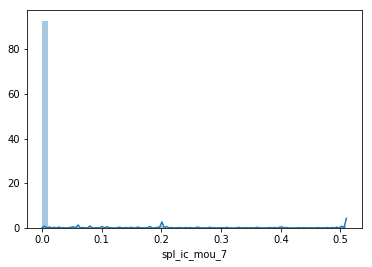

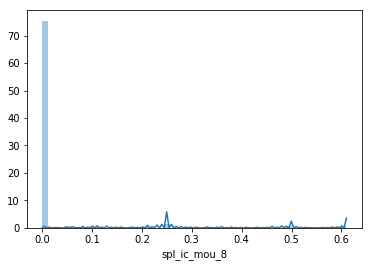

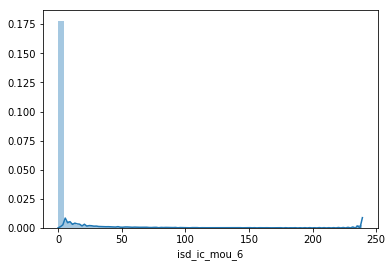

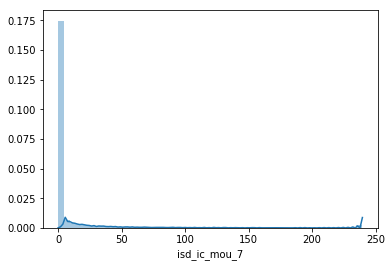

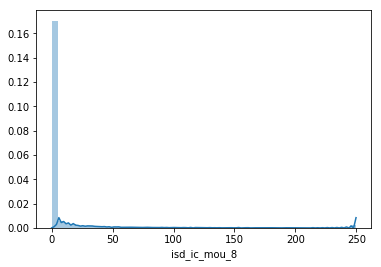

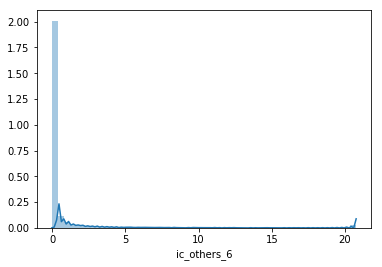

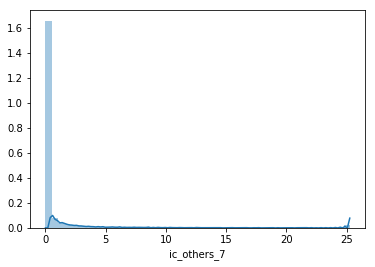

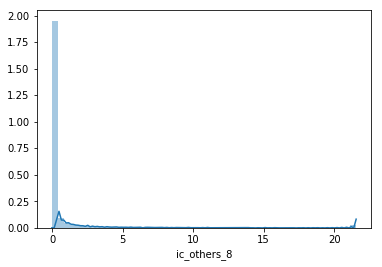

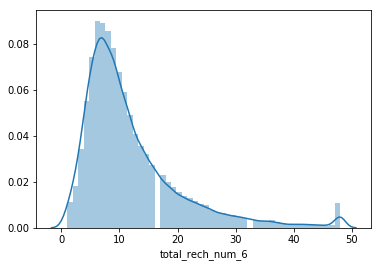

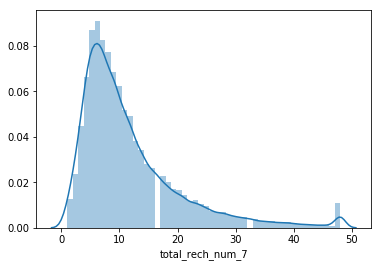

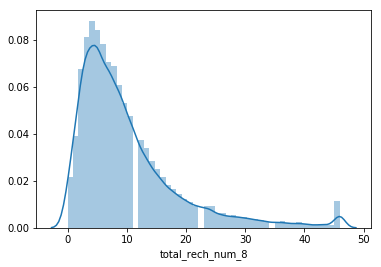

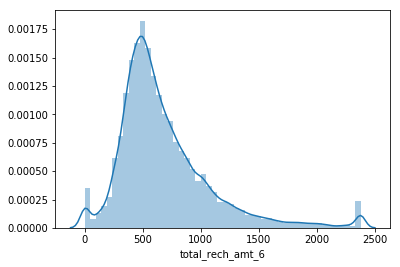

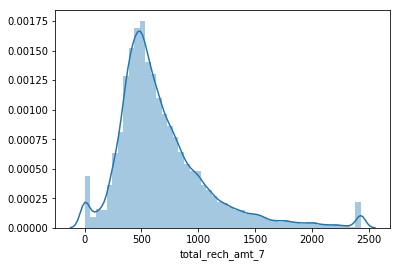

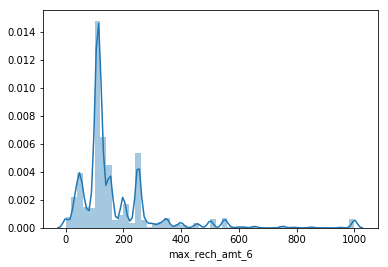

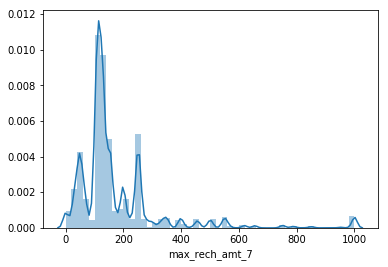

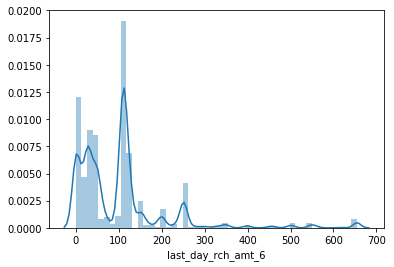

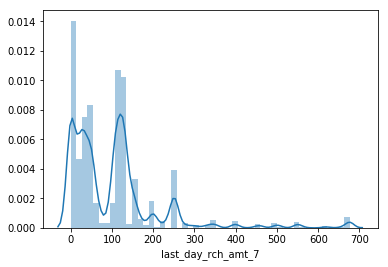

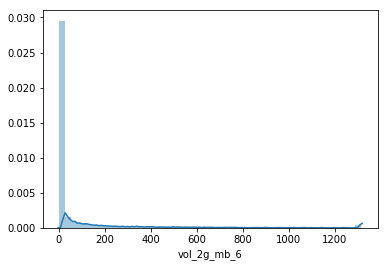

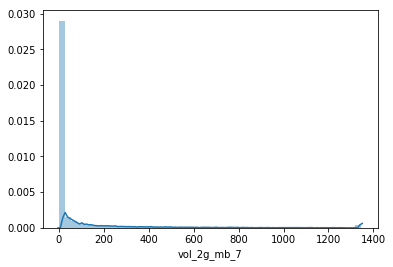

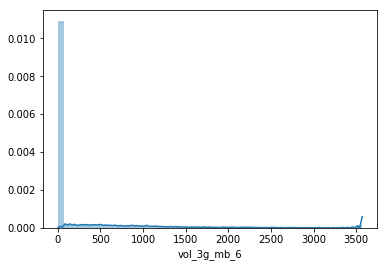

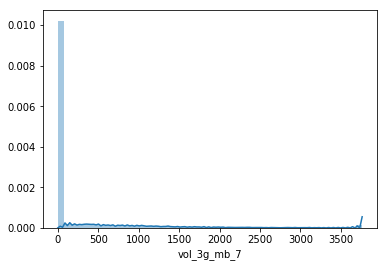

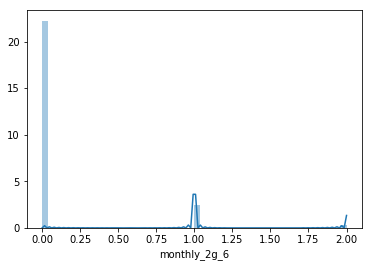

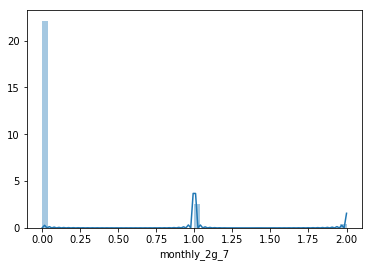

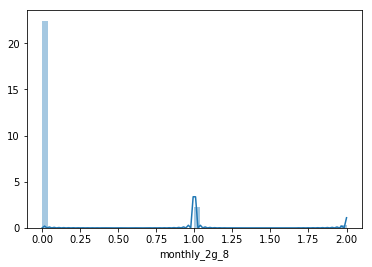

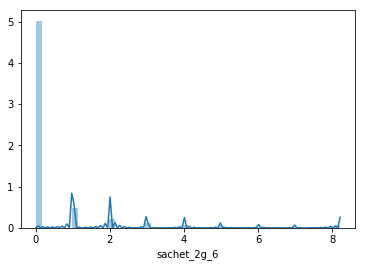

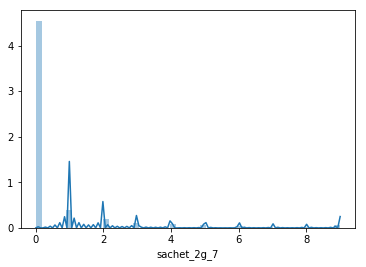

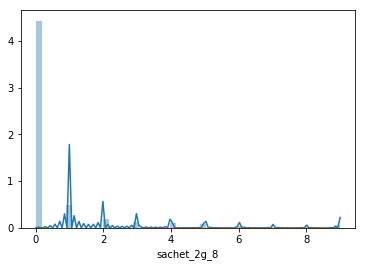

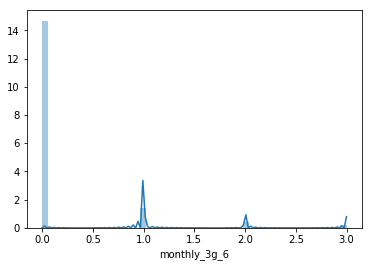

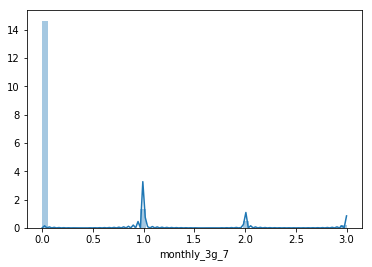

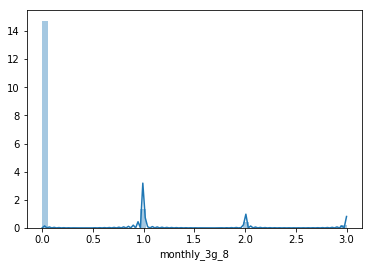

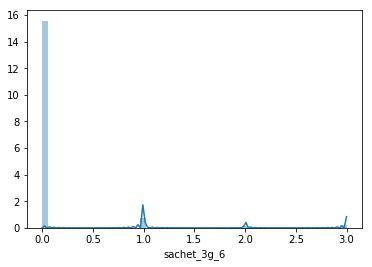

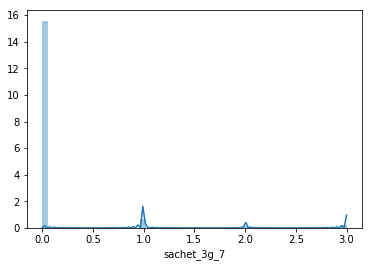

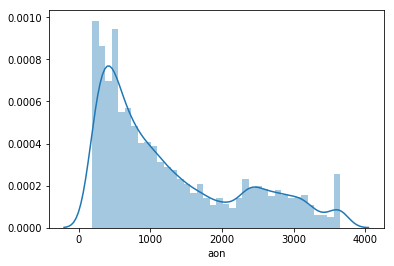

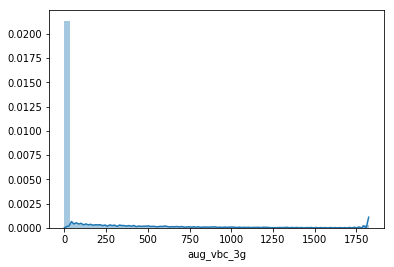

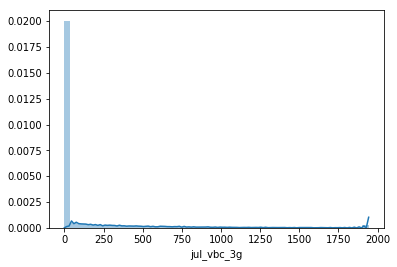

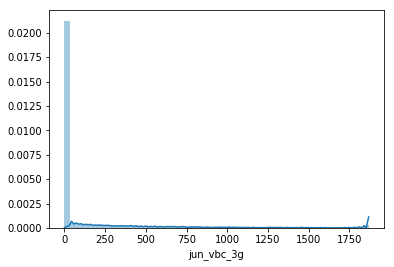

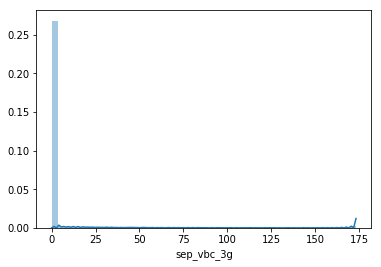

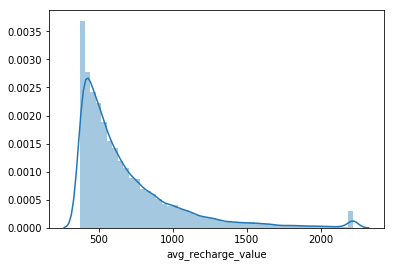

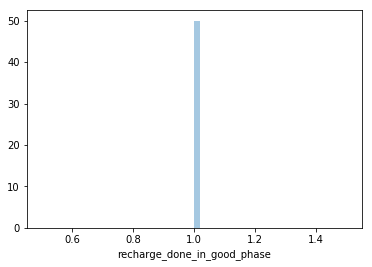

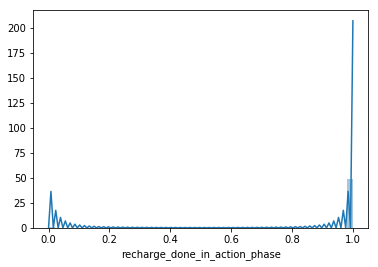

In [28]:
# Lets draw the feature variables and see if those are skewed
for col in X._get_numeric_data().columns:
    sns.distplot(X[col])
    plt.show()

In [29]:
# Since our data contains alot of negative values, so we cannot choose boxcox method for handling skewness
# Also, we cannot use normal log transformation since we have '0' also in our dataset
# Handling skewness by log(X+constant) method
for col in X.columns:
    X[col] = np.log(X[col] + 1)

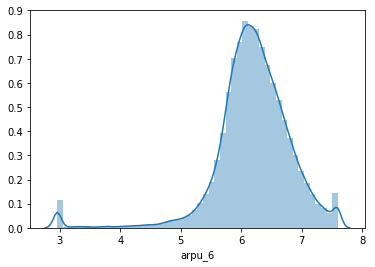

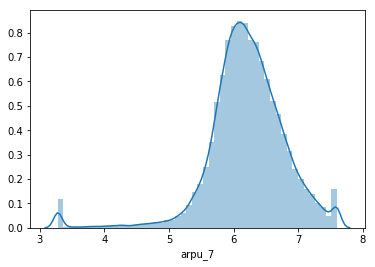

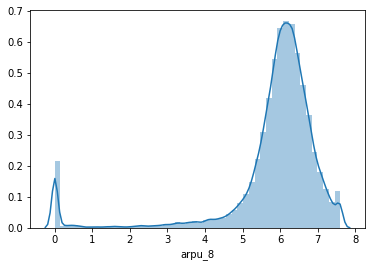

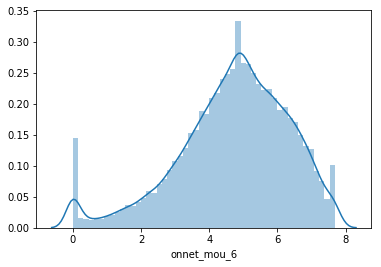

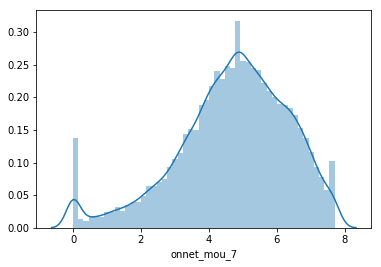

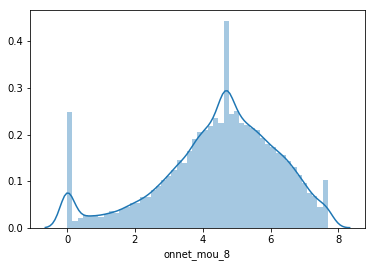

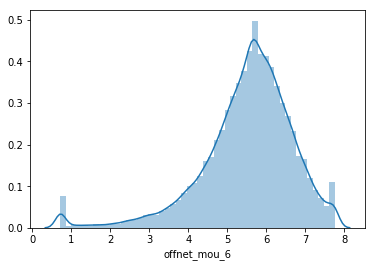

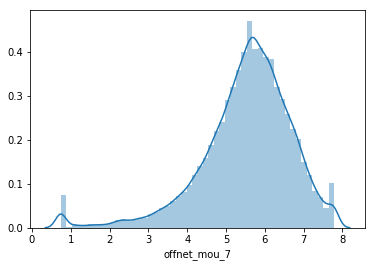

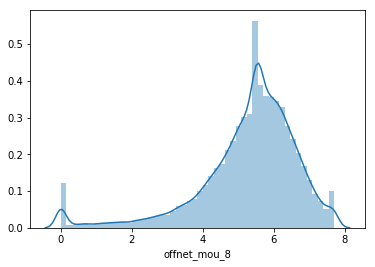

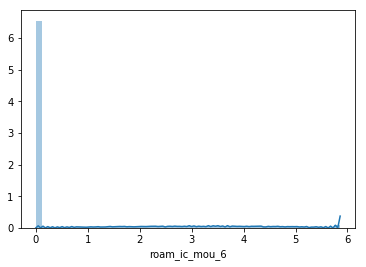

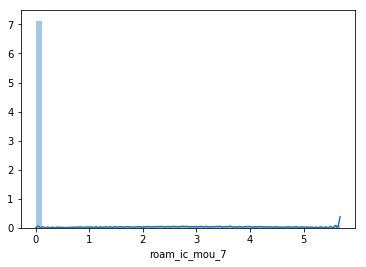

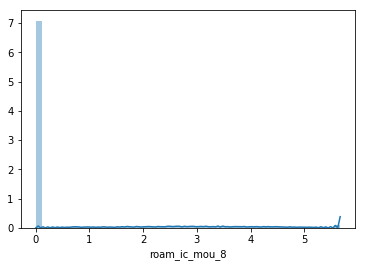

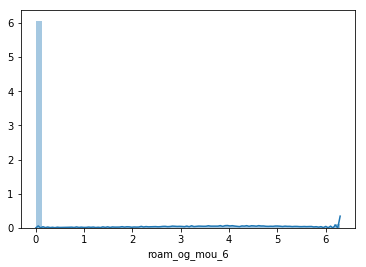

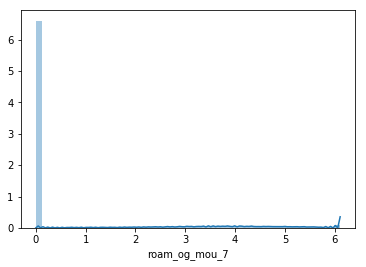

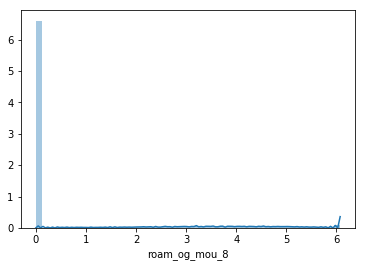

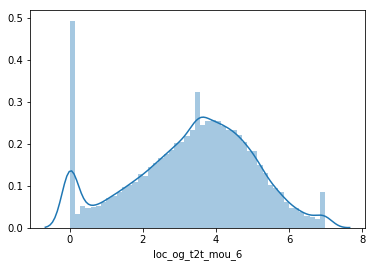

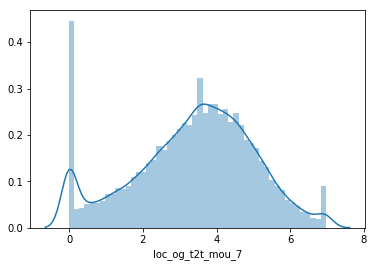

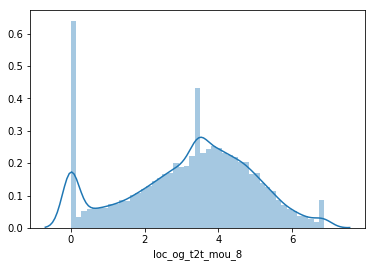

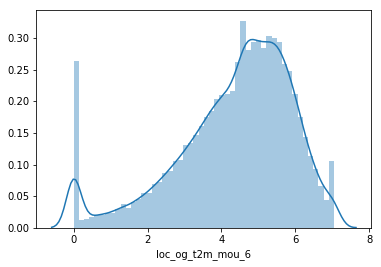

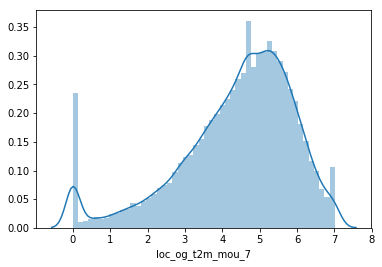

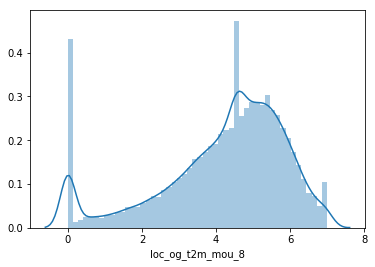

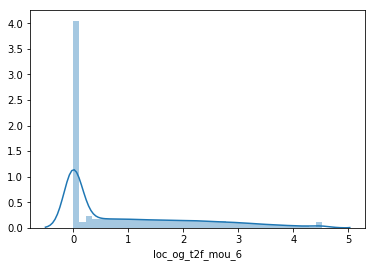

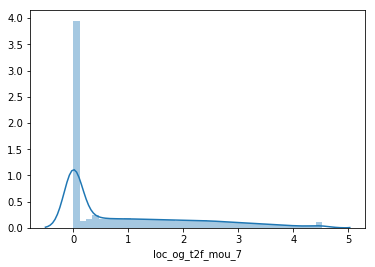

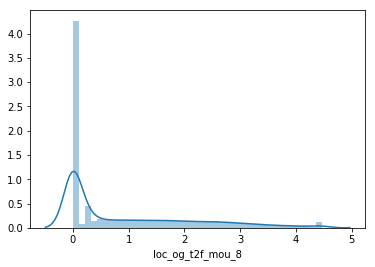

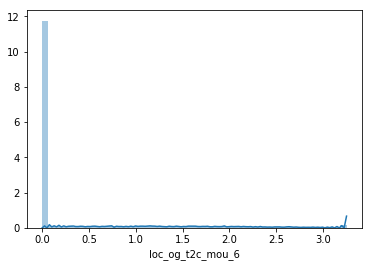

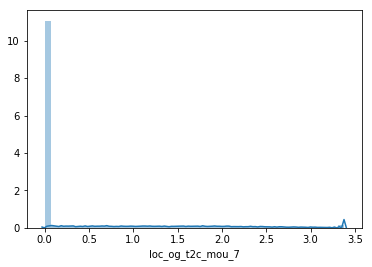

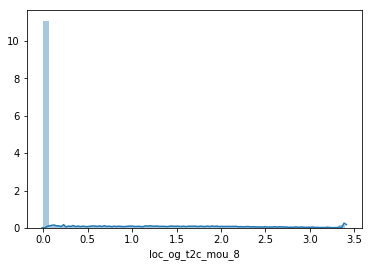

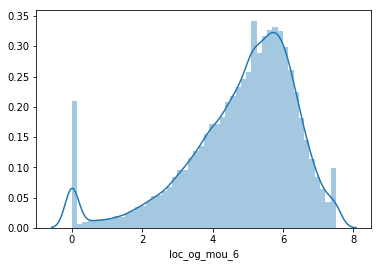

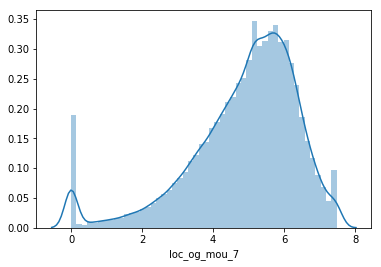

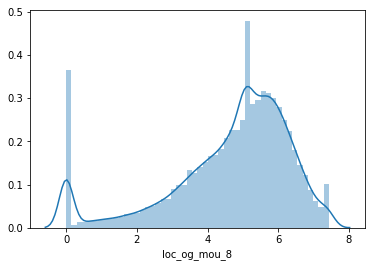

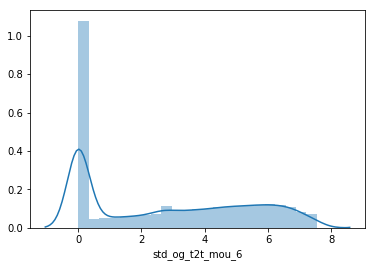

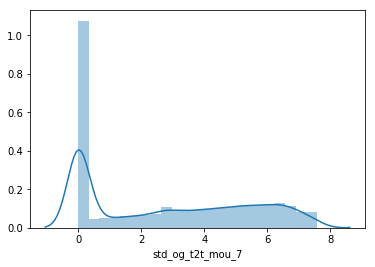

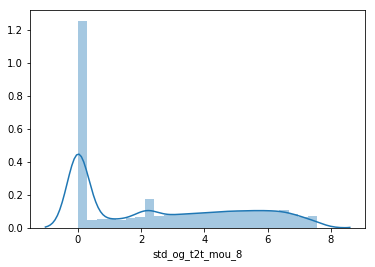

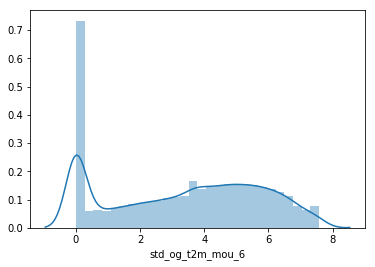

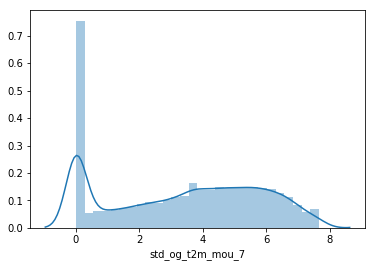

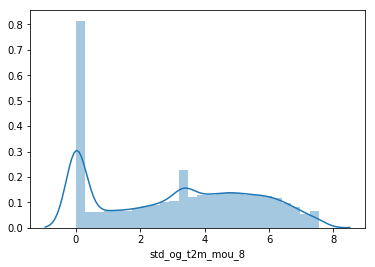

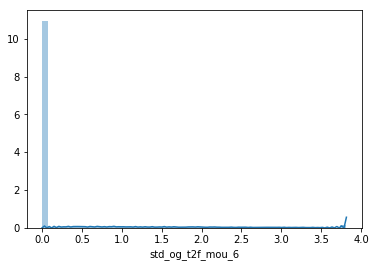

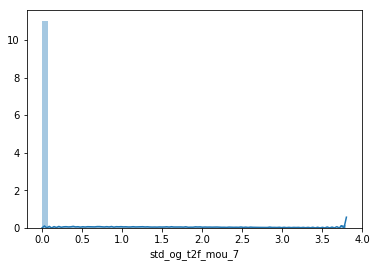

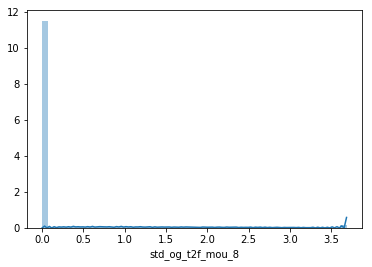

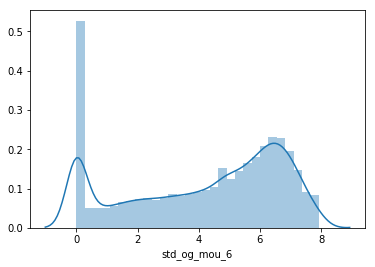

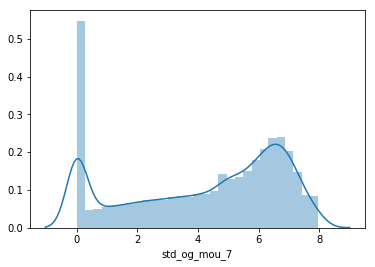

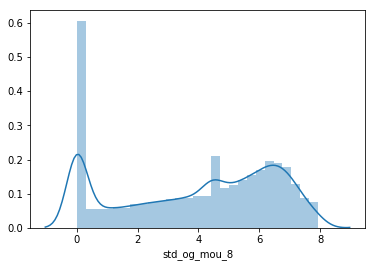

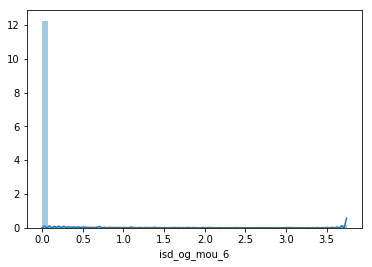

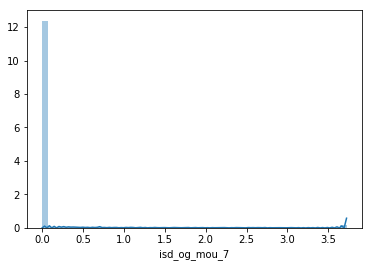

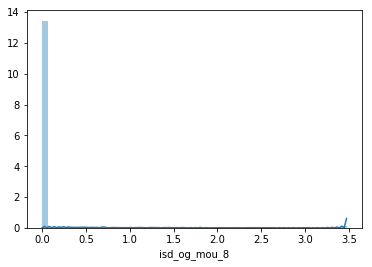

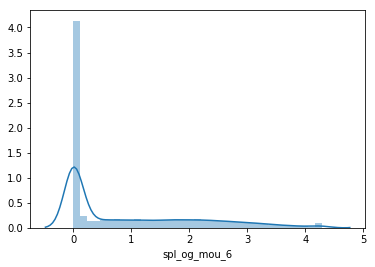

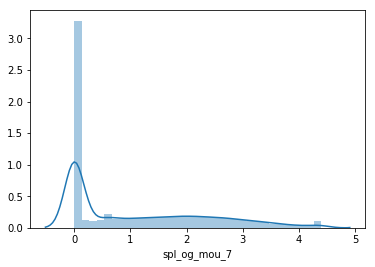

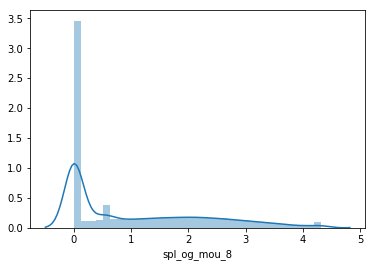

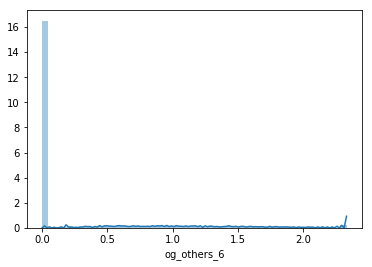

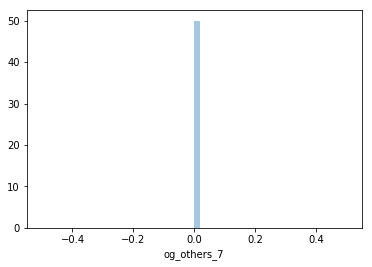

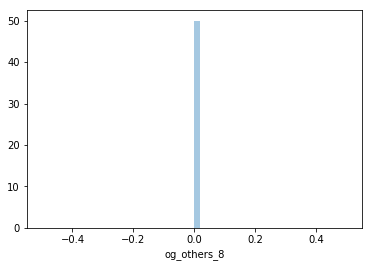

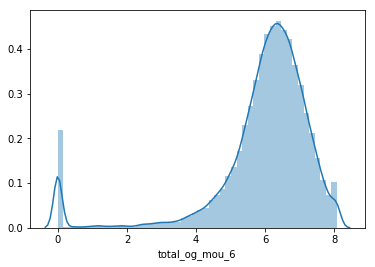

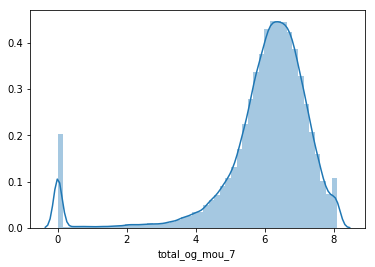

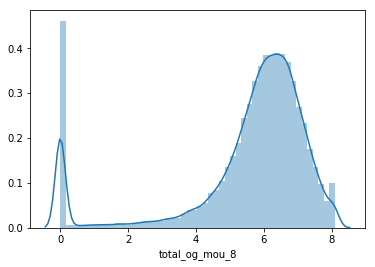

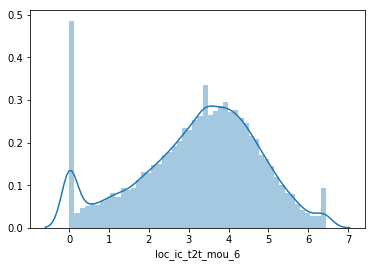

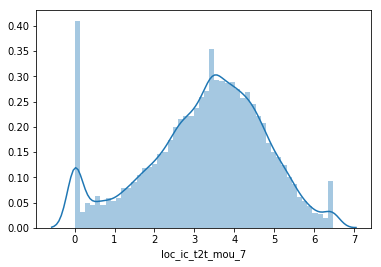

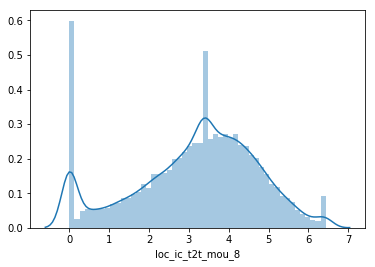

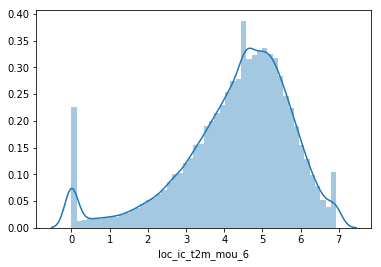

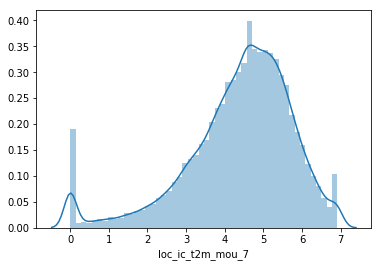

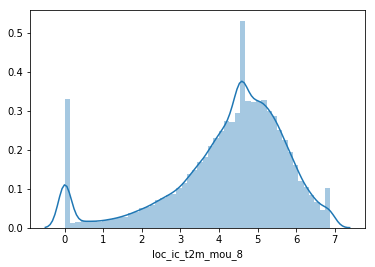

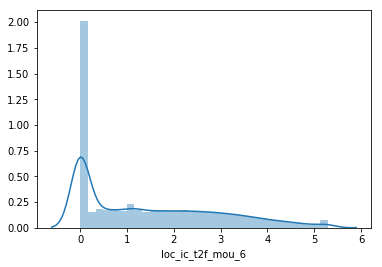

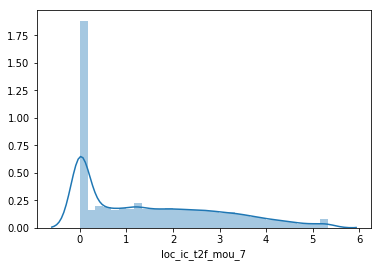

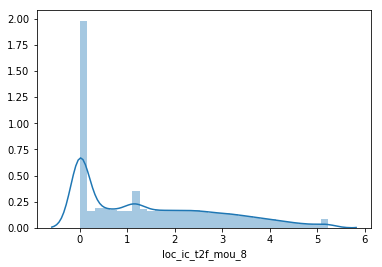

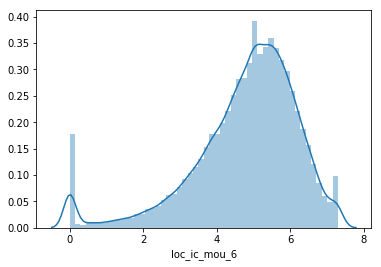

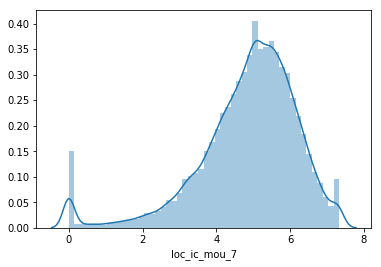

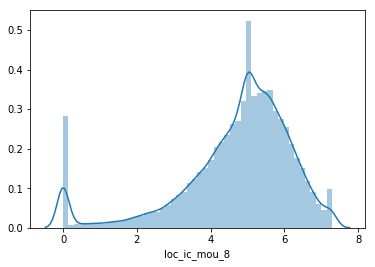

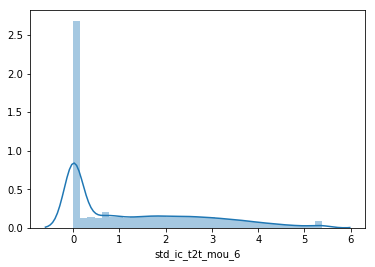

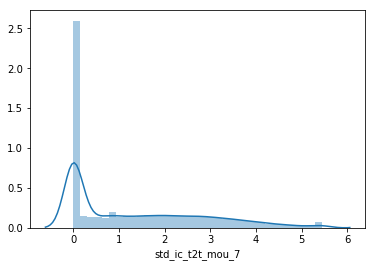

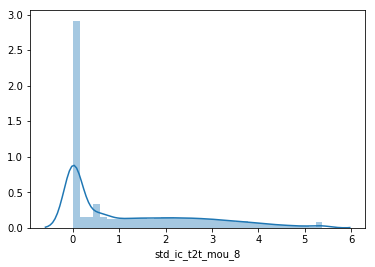

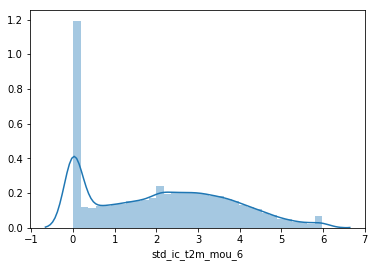

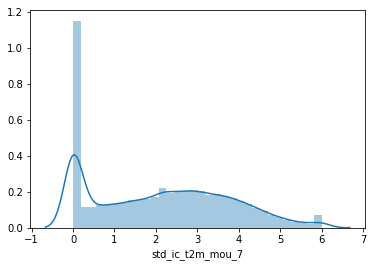

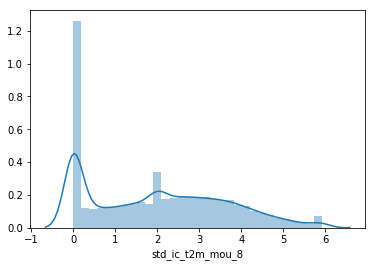

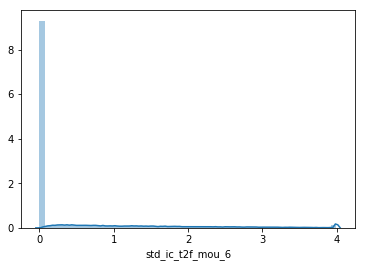

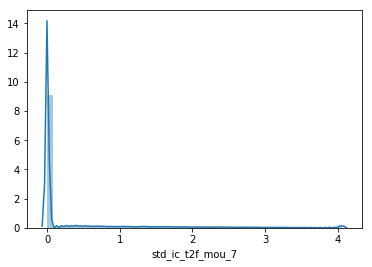

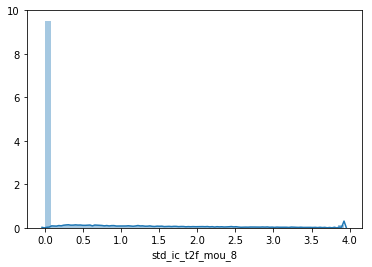

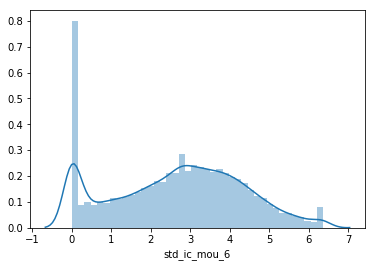

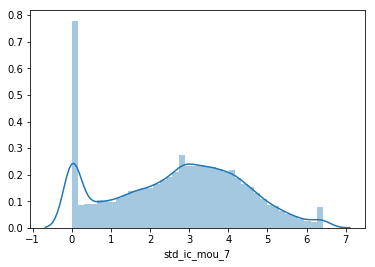

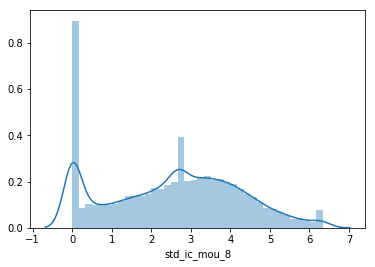

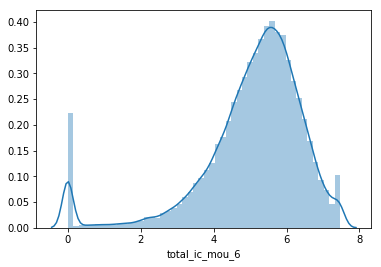

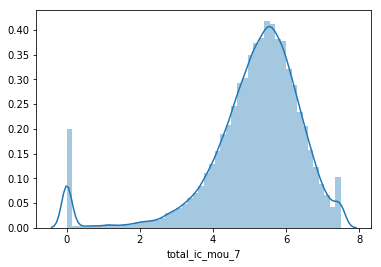

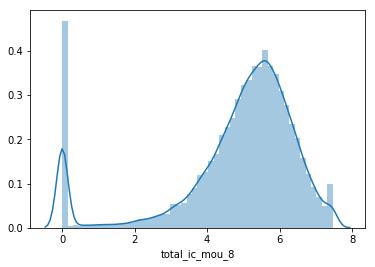

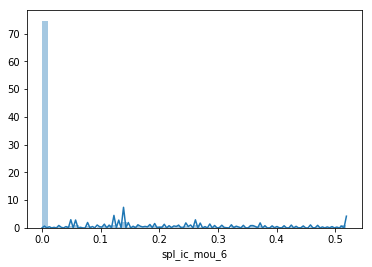

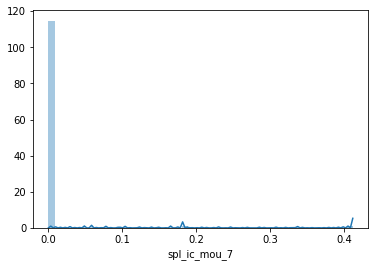

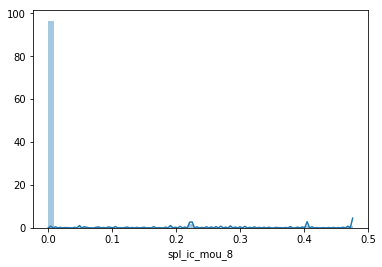

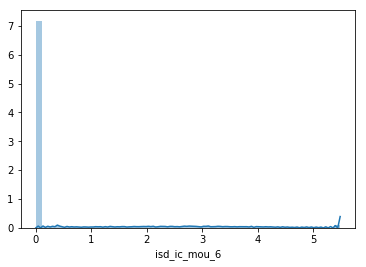

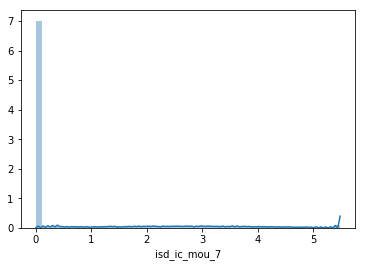

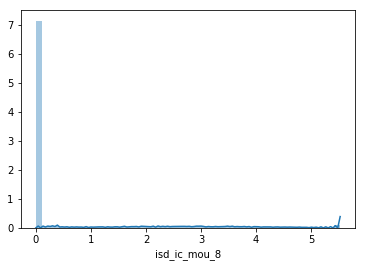

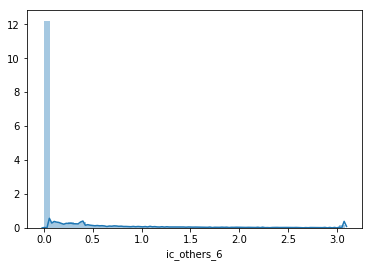

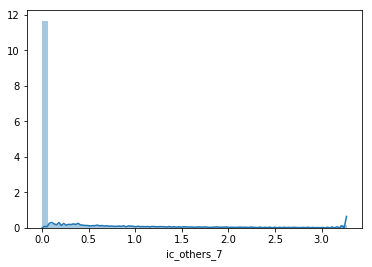

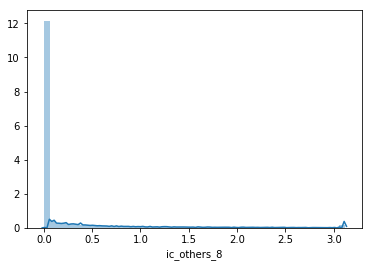

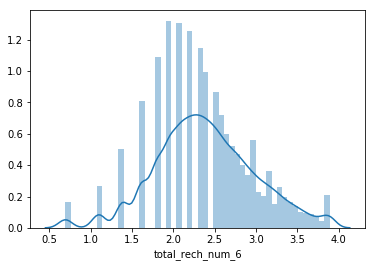

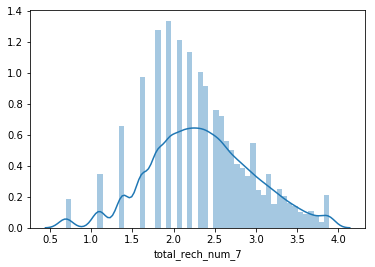

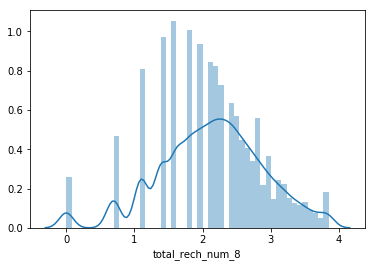

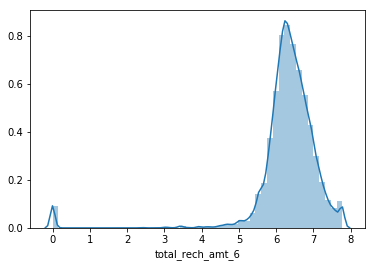

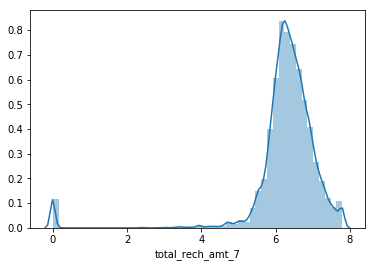

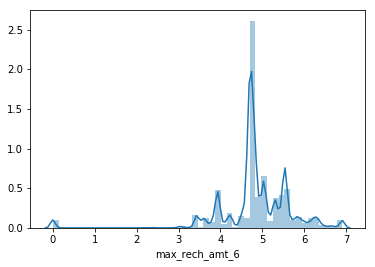

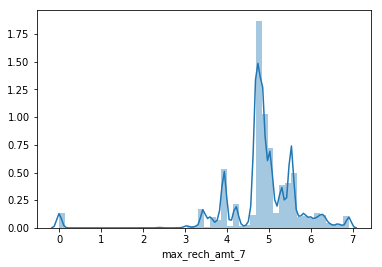

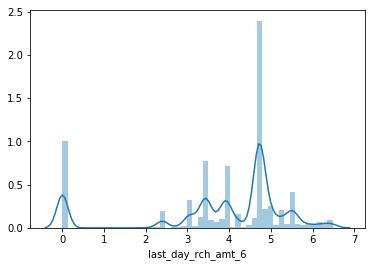

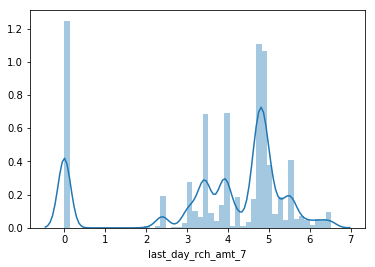

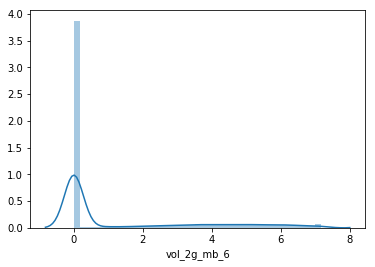

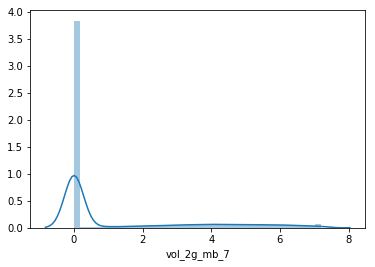

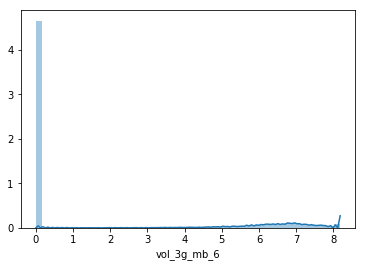

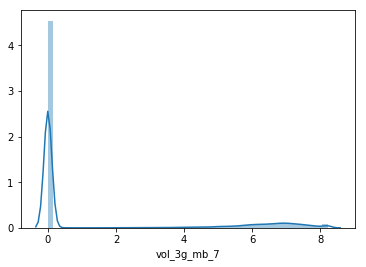

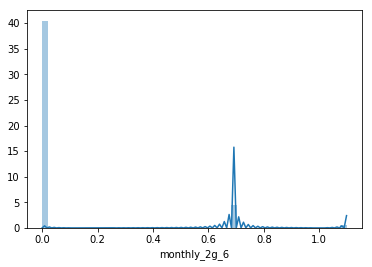

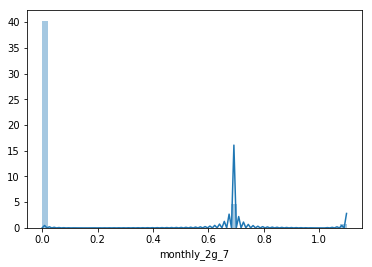

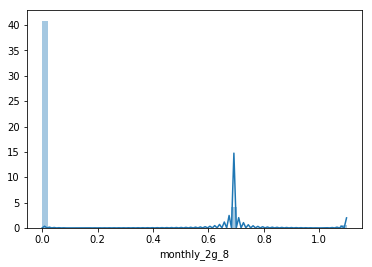

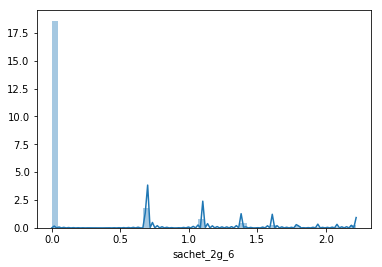

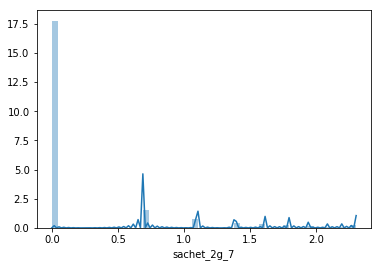

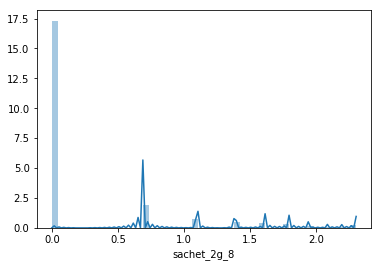

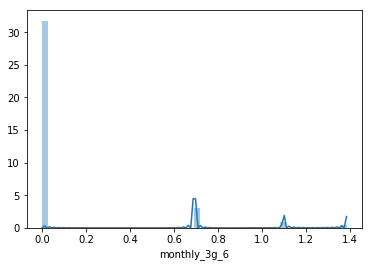

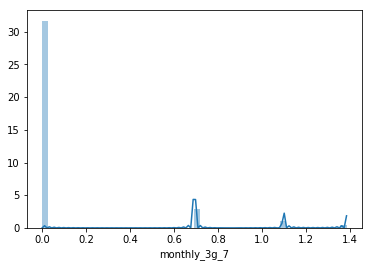

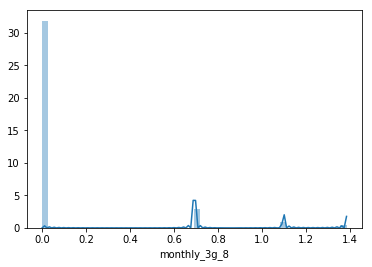

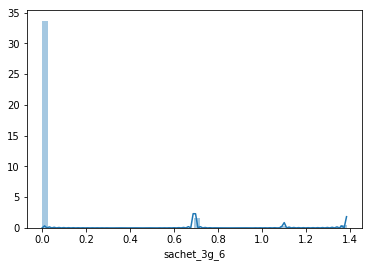

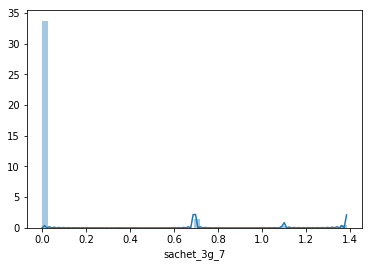

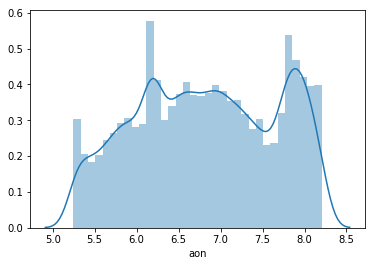

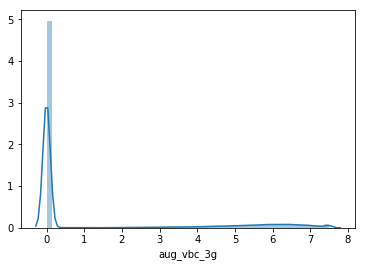

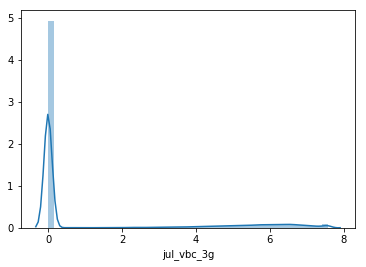

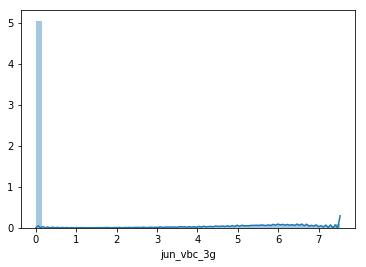

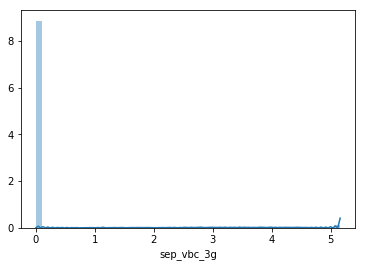

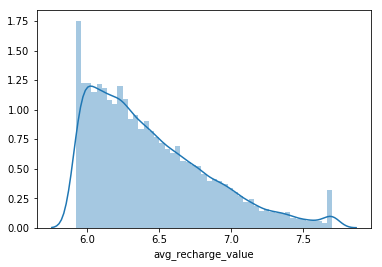

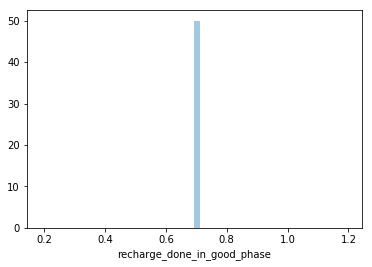

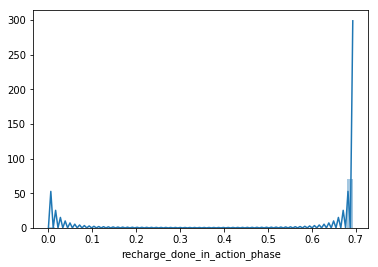

In [30]:
# Lets draw the feature variables and see if those are still skewed
for col in X._get_numeric_data().columns:
    sns.distplot(X[col])
    plt.show()

In [31]:
# Lets check if we still have columns which have very high skewness
for col in X._get_numeric_data().columns:
    print(col, "->", X[col].skew())

arpu_6 -> -1.564814259997232
arpu_7 -> -1.2167282578032563
arpu_8 -> -2.8396929766558645
onnet_mou_6 -> -0.6937038915424029
onnet_mou_7 -> -0.6612258905117006
onnet_mou_8 -> -0.6669008067312117
offnet_mou_6 -> -1.1944765535545578
offnet_mou_7 -> -1.1478398727929602
offnet_mou_8 -> -1.4586915772250157
roam_ic_mou_6 -> 1.9396503044400026
roam_ic_mou_7 -> 2.284906698030446
roam_ic_mou_8 -> 2.2443777844346493
roam_og_mou_6 -> 1.7689016766248595
roam_og_mou_7 -> 2.0522946682122503
roam_og_mou_8 -> 2.079286895650756
loc_og_t2t_mou_6 -> -0.3112263052866096
loc_og_t2t_mou_7 -> -0.3228157447038586
loc_og_t2t_mou_8 -> -0.3246623680632438
loc_og_t2m_mou_6 -> -0.910533730069427
loc_og_t2m_mou_7 -> -0.9550093088992434
loc_og_t2m_mou_8 -> -0.9367635709673049
loc_og_t2f_mou_6 -> 1.084968938688415
loc_og_t2f_mou_7 -> 1.0587508164263522
loc_og_t2f_mou_8 -> 1.1329878190692066
loc_og_t2c_mou_6 -> 2.241102652824018
loc_og_t2c_mou_7 -> 2.1246731550455387
loc_og_t2c_mou_8 -> 2.210014574513992
loc_og_mou_6 -

In [32]:
# Our transformations have significantly lowered the skewness of the feature variables, so we can continue with next
# steps. Lets check our dependent variable, and see how much churn customers data we have as comparision to non-churn
# customers data
100*original_dataset["churn"].astype("int").sum() / len(original_dataset["churn"].index)


8.636045231662164

In [33]:
# This is really less. Lets apply imblearn’s SMOTE or Synthetic Minority Oversampling Technique
# SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Copying the data into other dataframes for later part of the exercise
X_train_boost = X_train.copy()
X_test_boost = X_test.copy()
y_train_boost = y_train.copy()
y_test_boost = y_test.copy()

In [34]:
# Lets check if we have now similar strength of both churn and non churn samples
sum(y_train.astype("int"))/len(y_train)

0.5

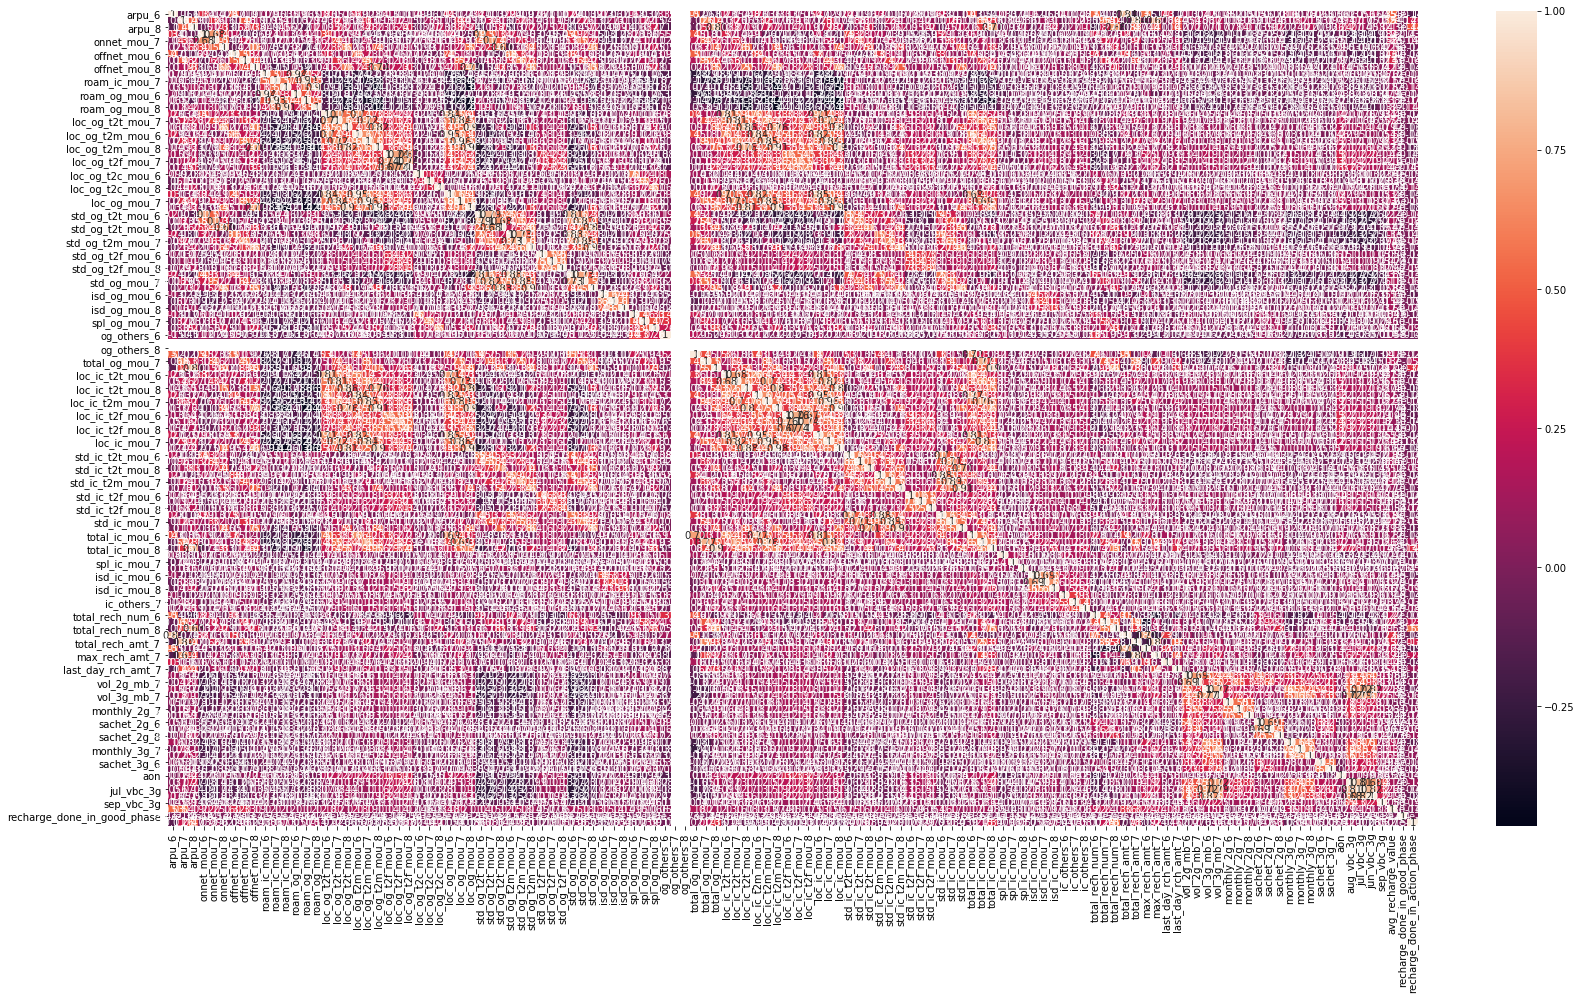

In [35]:
# Checking the correlation matrix
plt.figure(figsize=(28,15))
sns.heatmap(X_train.corr(), annot=True)

### Step 4: Modelling

In [36]:
# Correlation matrix is difficult to read with so many feature variables
# Lets start the Modelling process
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# Lets check PCA Components
pca.components_

array([[-3.75991145e-03, -3.59617788e-02, -1.58786818e-01, ...,
        -1.05932325e-02,  0.00000000e+00, -1.52566414e-03],
       [-5.07149158e-03, -1.82869364e-02, -2.62840222e-02, ...,
        -8.10338542e-03, -0.00000000e+00, -1.76481825e-03],
       [-3.50372318e-02,  3.68976268e-02,  1.71451941e-01, ...,
         4.42540755e-03,  0.00000000e+00,  4.77771593e-03],
       ...,
       [ 0.00000000e+00,  4.45677730e-17,  5.86430291e-17, ...,
        -2.48857106e-17,  0.00000000e+00,  1.03132372e-16],
       [-0.00000000e+00,  6.35275553e-18, -2.60156963e-18, ...,
        -1.25010722e-17, -1.00000000e+00,  3.36129820e-17],
       [ 0.00000000e+00,  1.02296087e-16,  2.46195000e-16, ...,
        -2.96807239e-16,  0.00000000e+00, -3.94578645e-16]])

In [38]:
# Lets check PCA explained variance ratio
pca.explained_variance_ratio_

array([2.08926904e-01, 1.81896367e-01, 8.09880512e-02, 7.15060575e-02,
       5.63419451e-02, 4.03738357e-02, 3.83445574e-02, 2.83162662e-02,
       2.45503449e-02, 1.68627686e-02, 1.41554074e-02, 1.37915443e-02,
       1.23353764e-02, 1.20374729e-02, 1.15727640e-02, 1.08965846e-02,
       9.83466665e-03, 8.90368694e-03, 8.87106603e-03, 8.33706904e-03,
       7.70630408e-03, 7.26539248e-03, 6.70699316e-03, 5.43374107e-03,
       5.24581253e-03, 4.95712625e-03, 4.66875475e-03, 4.31140431e-03,
       4.15084598e-03, 3.78579657e-03, 3.74648035e-03, 3.57372059e-03,
       3.24185571e-03, 3.22510100e-03, 3.11428180e-03, 2.82665589e-03,
       2.68762652e-03, 2.63157953e-03, 2.61872707e-03, 2.46248777e-03,
       2.34133153e-03, 2.22173734e-03, 2.00449922e-03, 1.94400539e-03,
       1.92450646e-03, 1.82204971e-03, 1.77723056e-03, 1.74735047e-03,
       1.71748553e-03, 1.64943173e-03, 1.62359896e-03, 1.57349631e-03,
       1.53495754e-03, 1.50541835e-03, 1.48565791e-03, 1.43916800e-03,
      

<BarContainer object of 122 artists>

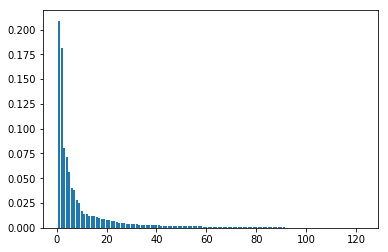

In [39]:
# Visually checking the variance explained by the variables
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

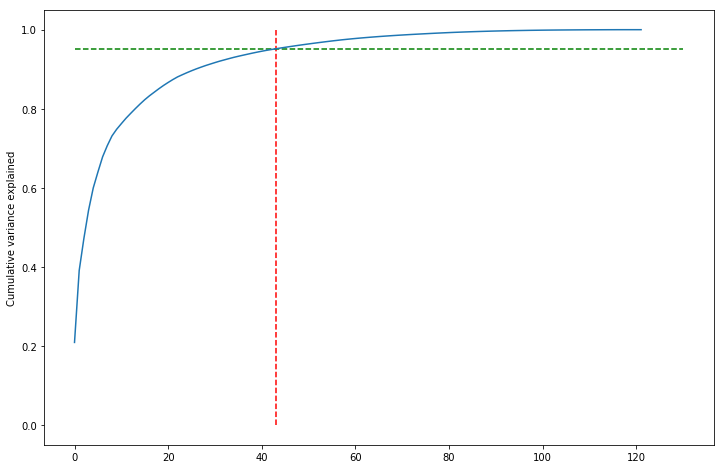

In [40]:
# Making a scree tree of the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=43, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [41]:
# Lets perform PCA with 43 variables which is capturing 95% variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=43)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38422, 43)

In [42]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(43, 43)

In [43]:
columns=[]
i=0
while i < df_train_pca.shape[1]:
    col = "col"+str(i)
    columns.append(col)
    i = i+1

In [44]:
PCA_train_df = pd.DataFrame(df_train_pca, columns=columns)
PCA_train_df.head()

col0       col1      col2      col3      col4      col5      col6  \
0  2.804756   5.112409  4.077916 -6.391293  1.132289 -4.653569 -2.190332   
1  2.899242 -11.569853  4.435352  5.031589  0.323821  0.115576  3.714147   
2  8.663015 -14.479239  2.288242  6.775445  0.984021 -1.195859  0.995061   
3  6.865742   7.064326 -0.261847 -2.411865  0.900809 -1.967078 -0.916985   
4 -1.081934   5.178739  2.516507 -3.501347  0.009974 -5.378956 -4.156004   

       col7      col8      col9    ...        col33     col34     col35  \
0 -0.024006 -0.992455 -1.630252    ...     2.072830 -0.127476  0.385735   
1  1.409177  0.919342  0.003994    ...    -1.064587  0.324582  1.555333   
2  0.688163  0.422113 -0.949923    ...     0.556008  0.496679  0.358618   
3  0.941823 -1.874483 -0.286045    ...     0.770105 -0.196544  0.165321   
4  4.423698 -2.558992 -0.731228    ...    -0.485497  0.406186  0.085288   

      col36     col37     col38     col39     col40     col41     col42  
0  0.525895  0.274423  1.162120 -0.710419  0.425738  0.868329 -0.418396  
1 -1.301754  1.066636  0.538188 -0.383828 -0.956582  0.342272  0.647167  
2  0.871665 -0.649879  0.234352  0.544266 -0.993669  0.693354 -0.412704  
3 -0.265940  0.100976  0.037455  0.487696 -0.572950  0.271682 -0.005545  
4  0.392073 -0.173449 -0.875060  0.514702 -0.411533  0.697789  0.251671  

[5 rows x 43 columns]

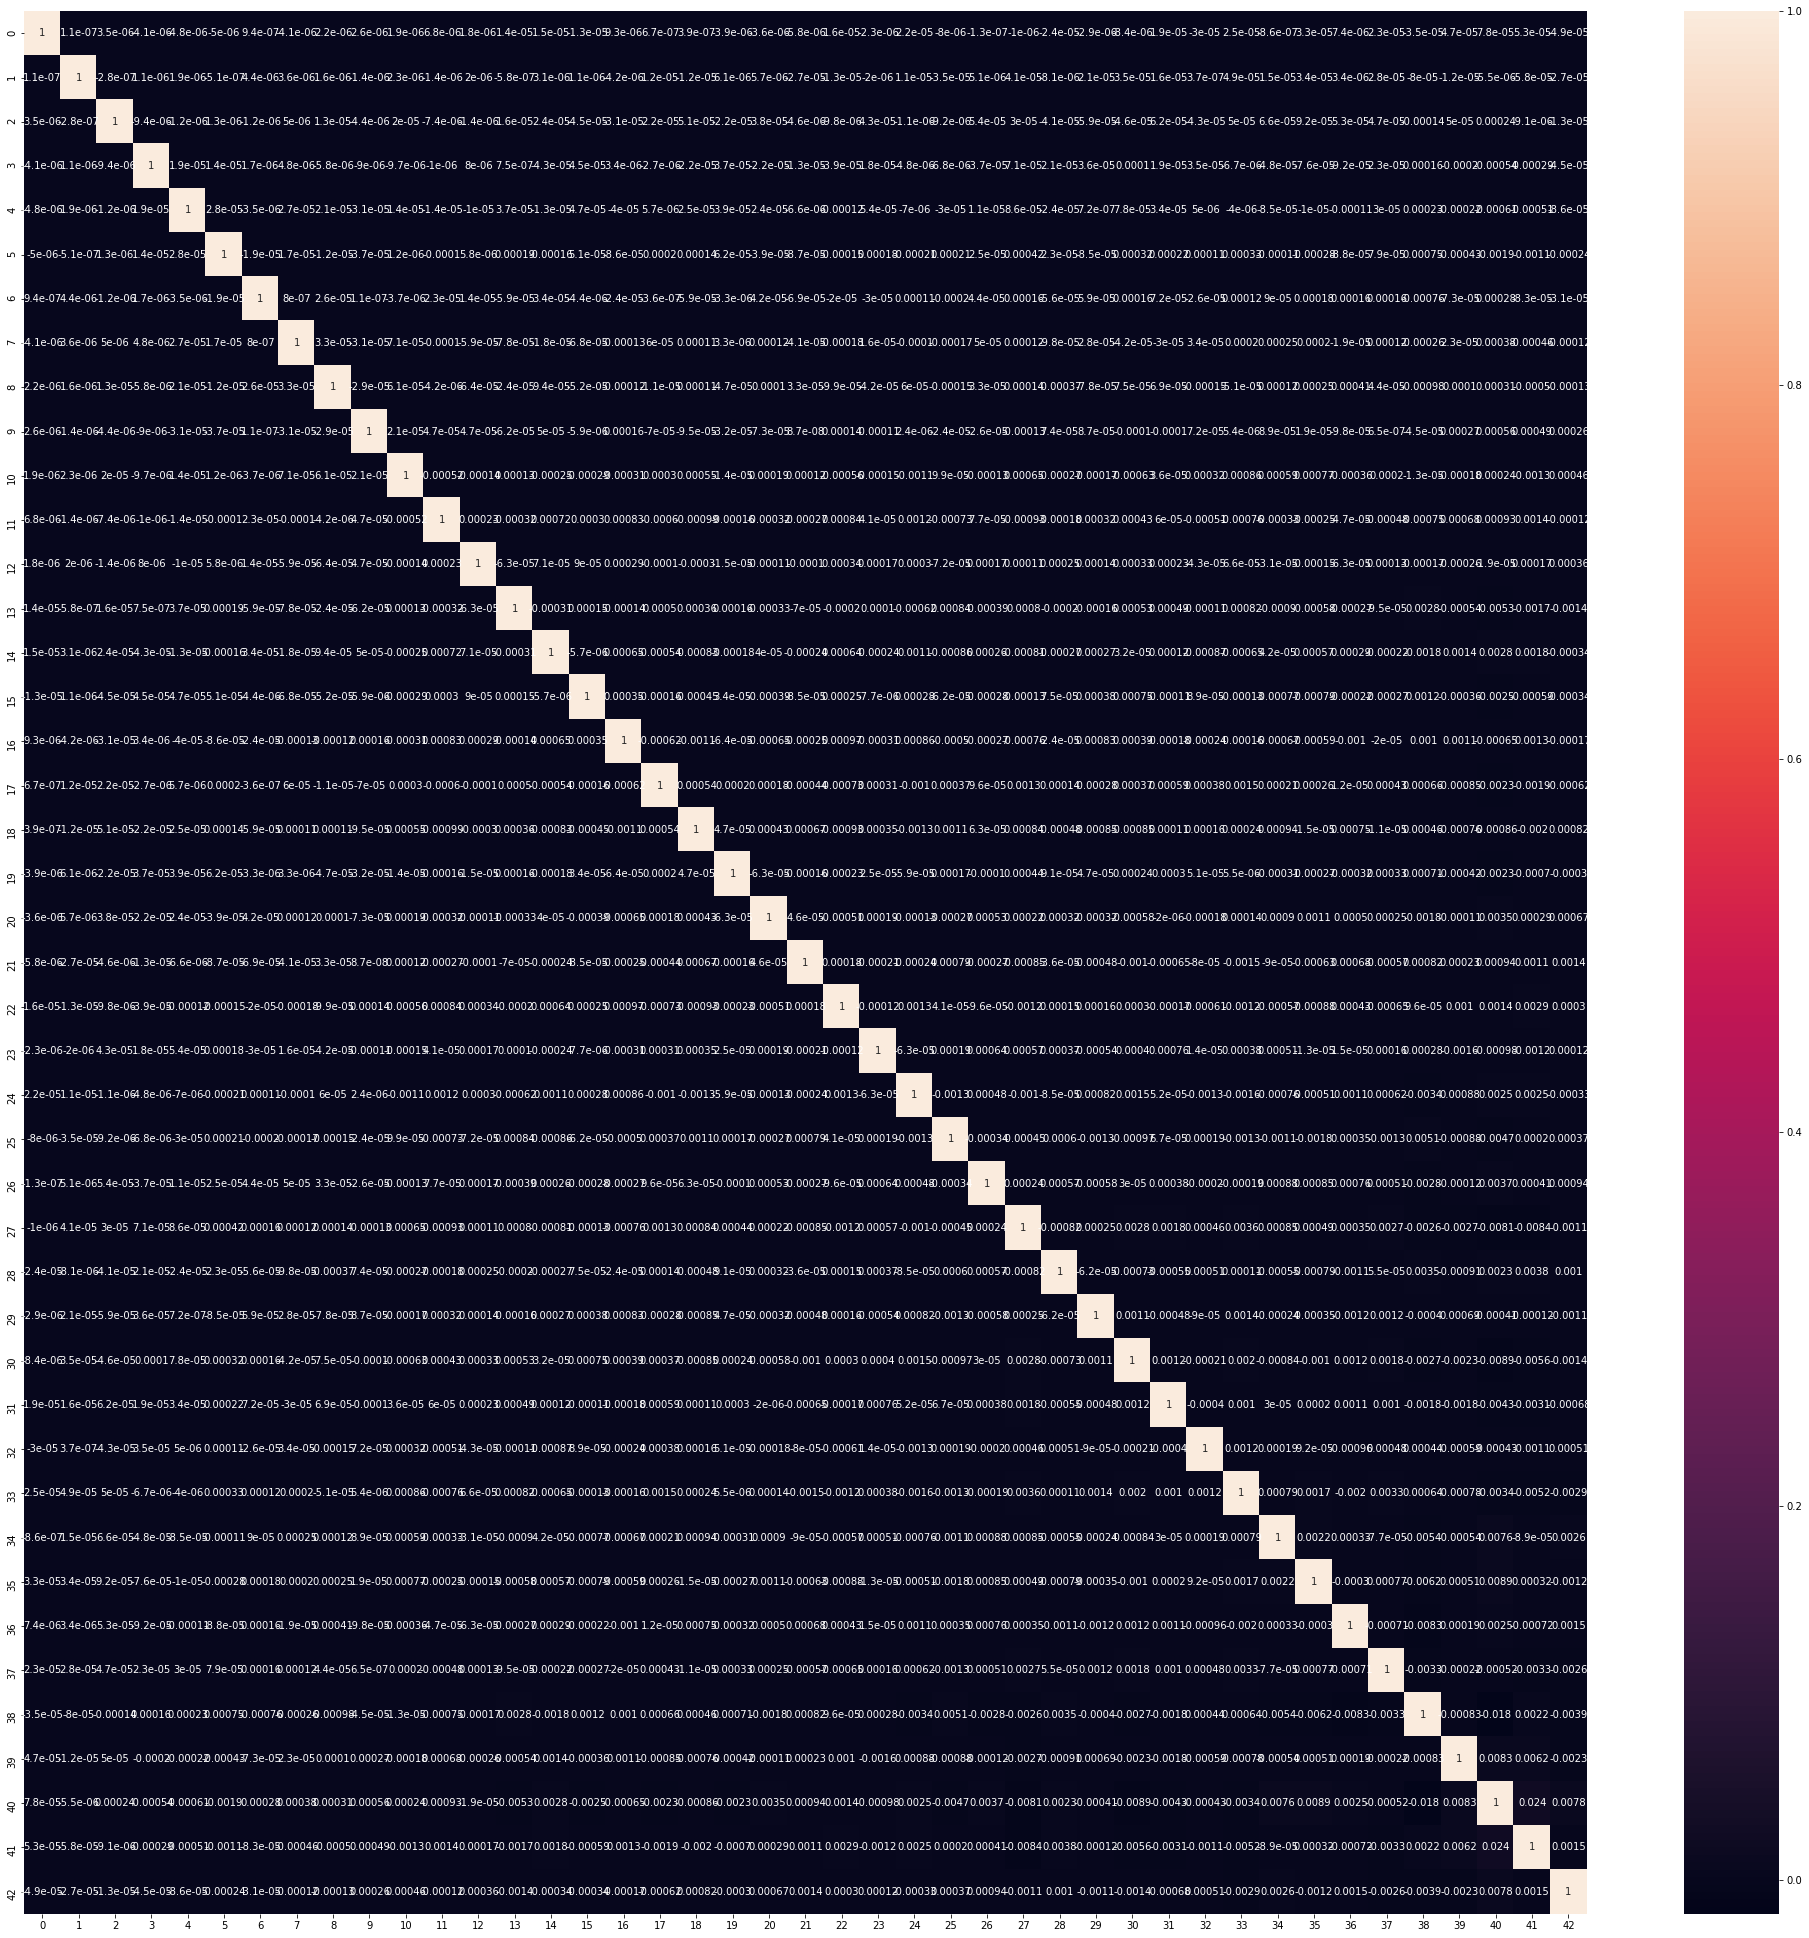

In [45]:
# Plotting the heatmap of corr matrix
plt.figure(figsize=[35,35])
sns.heatmap(corrmat, annot=True)

In [46]:
# Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 43)

In [47]:
columns=[]
i=0
while i < df_test_pca.shape[1]:
    col = "col"+str(i)
    columns.append(col)
    i = i+1

In [48]:
PCA_test_df = pd.DataFrame(df_test_pca, columns=columns)
PCA_test_df.head()

col0      col1      col2       col3      col4      col5      col6  \
0  13.984842  0.049781 -7.315014  -2.721053  0.637566  1.162898 -2.117227   
1   8.060523 -7.190608 -5.640109  -5.582582  3.091345  3.148538 -1.179966   
2   6.597686 -7.261959 -6.201969  -3.779544  3.011755  0.252352 -0.414870   
3   0.813879 -2.469225  3.900845  -1.084046  0.026965 -3.226281 -0.996251   
4 -15.059064 -6.718238  9.847692 -10.002029  3.761495  9.969448 -2.893684   

       col7      col8      col9    ...        col33     col34     col35  \
0 -0.439989 -2.187574  0.320353    ...     0.448975 -0.472187  0.205715   
1 -1.795373 -0.962398  0.361019    ...     1.540886  0.063365  0.188218   
2 -1.913196  3.757399 -1.678557    ...     0.303753  0.363992  0.364395   
3  1.956544 -0.005305 -3.954629    ...     0.272454 -0.505011 -0.136522   
4 -0.885926 -2.485135 -0.262515    ...    -1.017325  0.367998  0.094939   

      col36     col37     col38     col39     col40     col41     col42  
0  0.438576  0.938159  0.094079 -0.624404  0.280963  1.959158 -0.236863  
1 -0.501451  0.443989  1.491101  0.473540  0.370002  0.879782 -0.413625  
2 -0.367444 -0.476299  1.243803  1.225715 -0.386075 -1.165504 -0.405570  
3  0.039908  0.335046 -0.697981  1.024462 -0.385489 -0.545868  0.309072  
4  1.112099  0.351972 -0.522191 -0.926267  0.984084  0.382624  0.226048  

[5 rows x 43 columns]

In [49]:
# Applying Logistic Regression on the data (Principal Components)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(PCA_train_df, y_train)

In [50]:
# Lets predict on train dataset, fine tune hyper-parameters and then use it on predicting on test set
y_train_pred_prob = model_pca.predict_proba(PCA_train_df)
y_train_pred_prob[:10]

array([[0.46566253, 0.53433747],
       [0.82958958, 0.17041042],
       [0.94518723, 0.05481277],
       [0.70315767, 0.29684233],
       [0.64658329, 0.35341671],
       [0.77212814, 0.22787186],
       [0.06819937, 0.93180063],
       [0.96757835, 0.03242165],
       [0.55332349, 0.44667651],
       [0.73234851, 0.26765149]])

In [51]:
# Lets create a dataframe which contains "Churn", and "Churn probability" columns
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred_prob[:,1]})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.534337       0
1      0    0.170410       1
2      0    0.054813       2
3      0    0.296842       3
4      0    0.353417       4

In [52]:
# Predicting churn based on random value
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.534337       0          1
1      0    0.170410       1          0
2      0    0.054813       2          0
3      0    0.296842       3          0
4      0    0.353417       4          1

In [53]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14405  4806]
 [ 1926 17285]]


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8247878819426371


In [55]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [56]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8997449377960544

In [57]:
# Let us calculate specificity
TN / float(TN+FP)

0.7498308260892197

In [58]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2501691739107803


In [59]:
# positive predictive value 
print (TP / float(TP+FP))

0.7824453397311122


In [60]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8820647847651706


In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [62]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

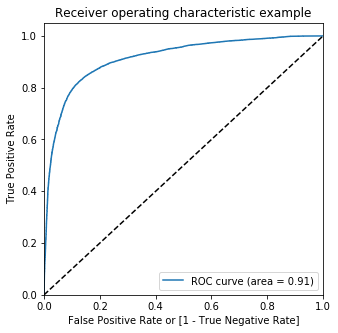

In [63]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [64]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.534337       0          1    1    1    1    1    1    1    0   
1      0    0.170410       1          0    1    1    0    0    0    0    0   
2      0    0.054813       2          0    1    0    0    0    0    0    0   
3      0    0.296842       3          0    1    1    1    0    0    0    0   
4      0    0.353417       4          1    1    1    1    1    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [65]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.645854  0.982666  0.309042
0.2   0.2  0.762818  0.942064  0.583572
0.3   0.3  0.824788  0.899745  0.749831
0.4   0.4  0.846156  0.852689  0.839623
0.5   0.5  0.848368  0.808131  0.888605
0.6   0.6  0.836240  0.752486  0.919994
0.7   0.7  0.813466  0.684764  0.942169
0.8   0.8  0.788376  0.617771  0.958982
0.9   0.9  0.750065  0.525532  0.974598


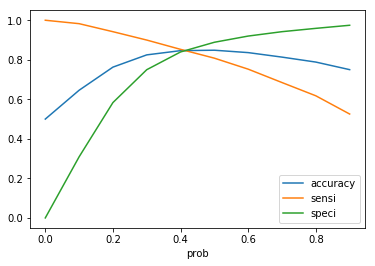

In [66]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [67]:
# After seeing the graph, we have chosen 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.534337       0          1    1    1    1    1    1    1    0   
1      0    0.170410       1          0    1    1    0    0    0    0    0   
2      0    0.054813       2          0    1    0    0    0    0    0    0   
3      0    0.296842       3          0    1    1    1    0    0    0    0   
4      0    0.353417       4          1    1    1    1    1    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [68]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8461558482119619

In [69]:
# Lets create the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16130,  3081],
       [ 2830, 16381]], dtype=int64)

In [70]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8526885638436312

In [72]:
# Let us calculate specificity
TN / float(TN+FP)

0.8396231325802925

In [73]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16037686741970747


In [74]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8416915013873189


In [75]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8507383966244726


### Precision and Recall

In [76]:
# Lets calculate Precision and Recall score(s)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7824453397311122

In [77]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8997449377960544

### Making predictions on Test Set

In [78]:
# Lets make predictions on test set
y_test_pred = model_pca.predict_proba(PCA_test_df)
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred[:,1]))

'0.9'

In [79]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(pd.DataFrame(y_test_pred).iloc[:,[1]])

In [80]:
# Let's see the head
y_pred_1.head()

1
0  0.103644
1  0.089683
2  0.082270
3  0.251980
4  0.759372

In [81]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [82]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

churn  CustID         1
0      0   76438  0.103644
1      0   72869  0.089683
2      0   86053  0.082270
3      0   29093  0.251980
4      0   96385  0.759372

In [83]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0   76438      0    0.103644
1   72869      0    0.089683
2   86053      0    0.082270
3   29093      0    0.251980
4   96385      0    0.759372

In [84]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0   76438      0    0.103644                0
1   72869      0    0.089683                0
2   86053      0    0.082270                0
3   29093      0    0.251980                0
4   96385      0    0.759372                1

In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8368912608405604

In [86]:
# Lets recreate confusion matrix for test set
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6849, 1330],
       [ 137,  678]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8319018404907975

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8373884337938623

In [90]:
## We can play with the value of lambda and identify those customers who are at most risk of churn
## Next part of the assignment is identifying important predictor attributes which help the business
## understand indicators of churn.
## Lets use ensemble method to identify the same

### Step 5: AdaBoost

In [91]:
# Lets perform Boosting on the original dataset
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Lets take a look at the dataset
print(X_train_boost.shape)
print(X_test_boost.shape)
print(y_train_boost.shape)
print(y_test_boost.shape)

(38422, 122)
(8994, 122)
(38422,)
(8994,)


In [93]:
# Lets start adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [94]:
# fit
adaboost_model_1.fit(X_train_boost, y_train_boost)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [95]:
# predictions
# the second column represents the probability of a churn
predictions = adaboost_model_1.predict_proba(X_test_boost)
predictions[:10]

array([[0.52555739, 0.47444261],
       [0.50992088, 0.49007912],
       [0.51508556, 0.48491444],
       [0.51561414, 0.48438586],
       [0.50282719, 0.49717281],
       [0.5066461 , 0.4933539 ],
       [0.5110183 , 0.4889817 ],
       [0.50300804, 0.49699196],
       [0.5021631 , 0.4978369 ],
       [0.51310434, 0.48689566]])

In [96]:
# metrics: AUC
metrics.roc_auc_score(y_test_boost, predictions[:,1])

0.9004798312602152

### AdaBoost - Hyperparameter Tuning

Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). 


In [97]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [98]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [99]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [100]:
# fit 
grid_search_ABC.fit(X_train_boost, y_train_boost)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 103.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
   

In [101]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     162.349494      6.569832         2.192099        0.208451   
1     232.237550     56.489112         3.400034        1.158116   
2     281.737527      7.086567         3.880300        0.054156   
3     218.851691      3.277600         1.367526        0.060932   
4     448.628387      6.676116         2.920639        0.171175   
5     667.035856     11.492998         4.080475        0.117821   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                200   
1                               2                400   
2                               2                600   
3                               5                200   
4                               5                400   
5                               5                600   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.967763   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.970298   
2  {'base_estimator__max_depth': 2, 'n_estimators...           0.970972   
3  {'base_estimator__max_depth': 5, 'n_estimators...           0.979924   
4  {'base_estimator__max_depth': 5, 'n_estimators...           0.981966   
5  {'base_estimator__max_depth': 5, 'n_estimators...           0.982861   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.989095           0.991369         0.982742        0.010633   
1           0.992116           0.993910         0.985442        0.010733   
2           0.994564           0.994987         0.986841        0.011222   
3           0.998323           0.998694         0.992314        0.008762   
4           0.998950           0.999149         0.993355        0.008054   
5           0.999043           0.999246         0.993717        0.007677   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.994808            0.983175   
1                5            0.997810            0.986298   
2                4            0.998933            0.989154   
3                3            1.000000            0.999756   
4                2            1.000000            1.000000   
5                1            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.982246          0.986743     5.715370e-03  
1            0.986053          0.990054     5.485667e-03  
2            0.987929          0.992005     4.923807e-03  
3            0.999537          0.999764     1.890843e-04  
4            1.000000          1.000000     2.299085e-08  
5            1.000000          1.000000     0.000000e+00

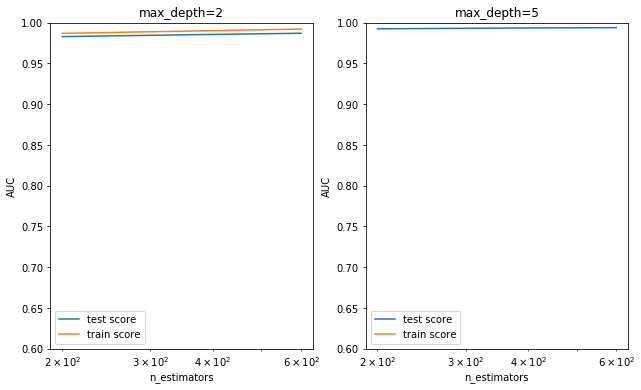

In [102]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

In [103]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train_boost, y_train_boost)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [104]:
# predict on test data
predictions = ABC.predict_proba(X_test_boost)
predictions[:10]

array([[0.56972608, 0.43027392],
       [0.5427081 , 0.4572919 ],
       [0.55028277, 0.44971723],
       [0.55247353, 0.44752647],
       [0.50218326, 0.49781674],
       [0.51900212, 0.48099788],
       [0.50865039, 0.49134961],
       [0.50343454, 0.49656546],
       [0.51325454, 0.48674546],
       [0.55588121, 0.44411879]])

In [105]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.9097224899619482

### Step 6: Gradient Boosting Classifier

In [106]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [107]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [108]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train_boost, y_train_boost)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 21.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
         

In [109]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.010564      0.505892         0.054722        0.000651   
1      48.692307      0.577052         0.056187        0.002354   
2      72.087256      0.789348         0.060173        0.005423   
3      24.105051      0.312550         0.055851        0.004953   
4      48.744018      0.483831         0.062499        0.012335   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.969068   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.970128   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.970080   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.960903   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.967854   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.992498           0.995018         0.985528        0.011684   
1           0.993932           0.995888         0.986649        0.011710   
2           0.994566           0.995788         0.986811        0.011842   
3           0.987688           0.991160         0.979917        0.013519   
4           0.995541           0.993499         0.985631        0.012598   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.998367            0.986271   
1                3            0.998601            0.987803   
2                1            0.998678            0.988361   
3                8            0.999707            0.986485   
4                4            0.999991            0.993192   

   split2_train_score  mean_train_score  std_train_score  
0            0.987210          0.990616         0.005494  
1            0.988059          0.991488         0.005031  
2            0.988007          0.991682         0.004949  
3            0.987089          0.991093         0.006095  
4            0.991955          0.995046         0.003533

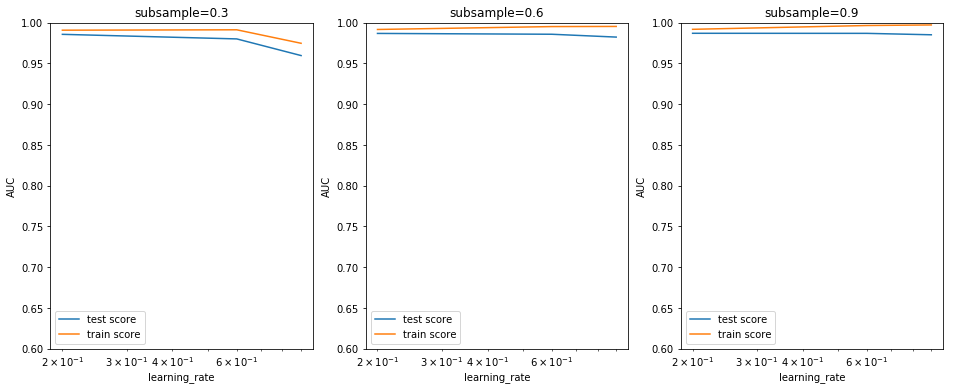

In [110]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')


In [111]:
# chosen hyperparameters based on above graphs
# fit model on training data
model = GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample= 0.3)
model.fit(X_train_boost, y_train_boost)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.3, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [112]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_boost)
y_pred[:10]

array([[0.99606763, 0.00393237],
       [0.95981487, 0.04018513],
       [0.99426981, 0.00573019],
       [0.97876648, 0.02123352],
       [0.48759446, 0.51240554],
       [0.84399769, 0.15600231],
       [0.90089458, 0.09910542],
       [0.64008157, 0.35991843],
       [0.8157508 , 0.1842492 ],
       [0.96449413, 0.03550587]])

In [113]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_boost, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 91.03%


### Step 7: XGBoost

In [114]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_boost, y_train_boost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [115]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_boost)
y_pred[:10]

array([[0.9807124 , 0.01928758],
       [0.941886  , 0.058114  ],
       [0.982559  , 0.01744098],
       [0.95747095, 0.04252905],
       [0.36395174, 0.63604826],
       [0.7003087 , 0.29969135],
       [0.85018885, 0.14981115],
       [0.31072307, 0.68927693],
       [0.88011134, 0.11988869],
       [0.93845564, 0.06154438]], dtype=float32)

In [116]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_boost, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 91.68%


In [117]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [118]:
# fit the model
model_cv.fit(X_train_boost, y_train_boost)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [119]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.710120      0.233376         0.097074        0.007390   
1      15.496177      0.385600         0.097742        0.005091   
2      15.518327      0.447400         0.114685        0.012790   
3      11.659550      0.128667         0.101053        0.010927   
4      15.645872      0.778713         0.109713        0.025863   
5      15.010561      0.252427         0.101745        0.013422   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.971239   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.971857   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.971422   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.966527   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.969655   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968753   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.993882           0.995402         0.986841        0.011050   
1           0.994366           0.995615         0.987280        0.010917   
2           0.994843           0.995748         0.987338        0.011260   
3           0.994753           0.996037         0.985772        0.013619   
4           0.997515           0.996977         0.988049        0.013009   
5           0.998163           0.998292         0.988402        0.013894   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.998449            0.987662   
1                4            0.998640            0.988037   
2                3            0.998608            0.988607   
3                6            0.999892            0.991847   
4                2            0.999992            0.994824   
5                1            0.999998            0.995279   

   split2_train_score  mean_train_score  std_train_score  
0            0.987781          0.991298         0.005057  
1            0.988006          0.991561         0.005005  
2            0.988263          0.991826         0.004798  
3            0.991964          0.994568         0.003765  
4            0.994504          0.996440         0.002515  
5            0.995159          0.996812         0.002253

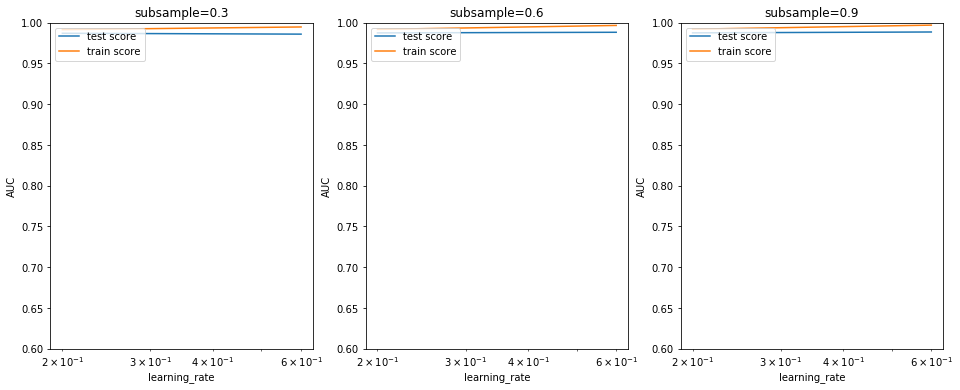

In [120]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [121]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_boost, y_train_boost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [122]:
# predict
y_pred = model.predict_proba(X_test_boost)
y_pred[:10]

array([[0.9807124 , 0.01928758],
       [0.941886  , 0.058114  ],
       [0.982559  , 0.01744098],
       [0.95747095, 0.04252905],
       [0.36395174, 0.63604826],
       [0.7003087 , 0.29969135],
       [0.85018885, 0.14981115],
       [0.31072307, 0.68927693],
       [0.88011134, 0.11988869],
       [0.93845564, 0.06154438]], dtype=float32)

In [123]:
# roc_auc
auc = metrics.roc_auc_score(y_test_boost, y_pred[:, 1])
auc

0.9168270979772378

### Step 8 : Identifying important features

In [124]:
# Comparing the AUC score of AdaBoost - 0.9097, Gradient Boosting Classifier - 0.9110 and XGBoost - 0.9168, we found that 
# XGBoost works well among them all.
# So, choosing XGBoost to extract important features

In [125]:
# Sorting feature importance list
import operator
importance = dict(zip(X_train_boost.columns, model.feature_importances_))
importance = dict( sorted(importance.items(), key=operator.itemgetter(1),reverse=True))
importance

{'total_ic_mou_8': 0.120986976,
 'roam_og_mou_8': 0.07465184,
 'roam_ic_mou_7': 0.05546833,
 'arpu_8': 0.048273455,
 'roam_ic_mou_8': 0.030828055,
 'spl_og_mou_7': 0.029309925,
 'sachet_2g_8': 0.027121097,
 'monthly_2g_6': 0.022394013,
 'arpu_6': 0.018916458,
 'monthly_2g_8': 0.01889283,
 'spl_ic_mou_6': 0.018306546,
 'ic_others_6': 0.01818782,
 'monthly_3g_8': 0.016191285,
 'last_day_rch_amt_7': 0.015789844,
 'sachet_2g_7': 0.015667992,
 'last_day_rch_amt_6': 0.015579188,
 'loc_og_t2f_mou_8': 0.01533806,
 'og_others_6': 0.015022859,
 'spl_og_mou_8': 0.014414124,
 'total_og_mou_8': 0.013734305,
 'aon': 0.013591636,
 'sep_vbc_3g': 0.013150796,
 'spl_ic_mou_8': 0.0130531285,
 'sachet_2g_6': 0.013029405,
 'std_ic_t2t_mou_7': 0.01295102,
 'spl_og_mou_6': 0.011555324,
 'loc_ic_mou_8': 0.011462763,
 'total_rech_num_8': 0.011437915,
 'loc_ic_t2f_mou_6': 0.009921379,
 'max_rech_amt_6': 0.009780993,
 'loc_ic_t2f_mou_8': 0.009566014,
 'avg_recharge_value': 0.009104726,
 'aug_vbc_3g': 0.008996971

### Top 10 Important features are:
<b>1) total_ic_mou_8 <br>
2) roam_og_mou_8 <br>
3) roam_ic_mou_7 <br>
4) arpu_8 <br>
5) roam_ic_mou_8 <br>
6) spl_og_mou_7 <br>
7) sachet_2g_8 <br>
8) monthly_2g_6 <br>
9) arpu_6 <br>
10) monthly_2g_8 </b> <br>

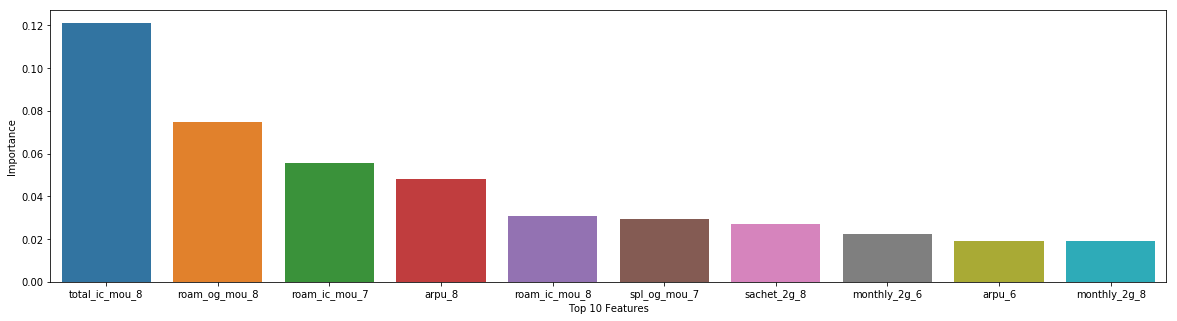

In [126]:
# Lets visualise the important features
imp=model.feature_importances_
names=X_train_boost.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 5))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.show()

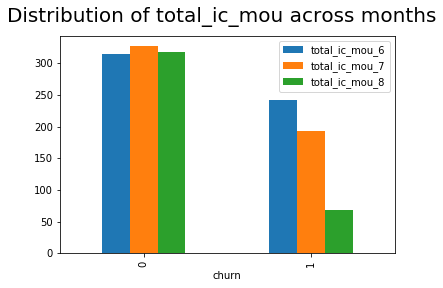

In [143]:
# Lets do more analysis on top 10 features
# Lets start by analysis of top important feature
original_dataset["churn"] = original_dataset["churn"].astype("object")
df_sample = original_dataset.groupby(['churn'])['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of total_ic_mou across months', fontsize=20)
plt.show()

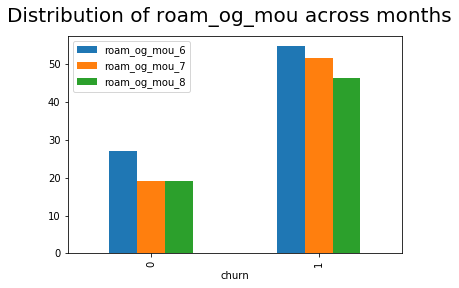

In [137]:
# Lets do more analysis of top second feature
df_sample = original_dataset.groupby(['churn'])['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of roam_og_mou across months', fontsize=20)
plt.show()

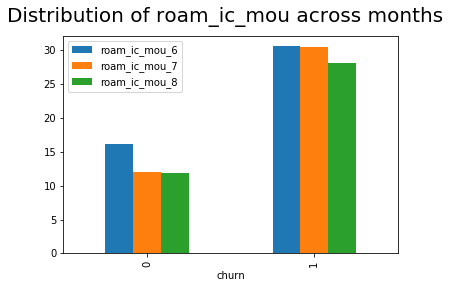

In [149]:
# Lets do more analysis of top third and fifth feature
df_sample = original_dataset.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of roam_ic_mou across months', fontsize=20)
plt.show()

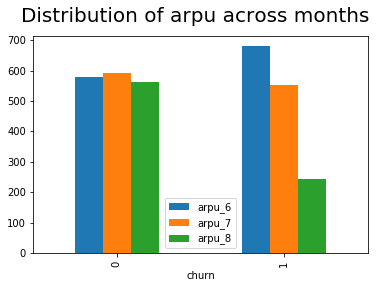

In [145]:
# Lets do more analysis of top fourth and ninth feature
df_sample = original_dataset.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of arpu across months', fontsize=20)
plt.show()

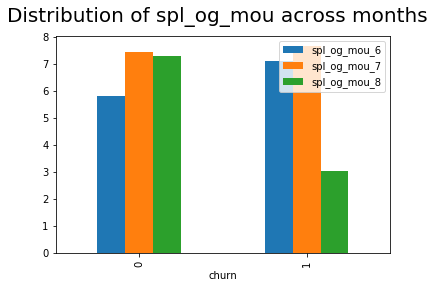

In [146]:
# Lets do more analysis of top sixth feature
df_sample = original_dataset.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of spl_og_mou across months', fontsize=20)
plt.show()

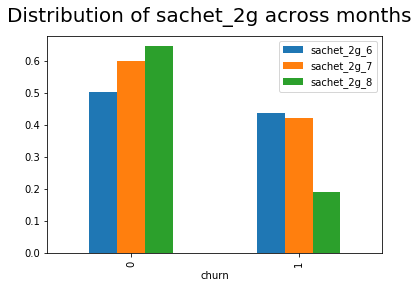

In [147]:
# Lets do more analysis of top seventh feature
df_sample = original_dataset.groupby(['churn'])['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of sachet_2g across months', fontsize=20)
plt.show()

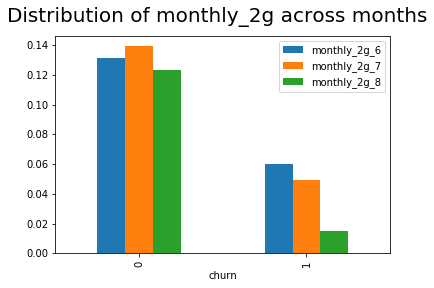

In [148]:
# Lets do more analysis of top eighth and tenth feature
df_sample = original_dataset.groupby(['churn'])['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'].mean()
df_sample.plot.bar()
plt.suptitle('Distribution of monthly_2g across months', fontsize=20)
plt.show()


<b>Recommend strategies to manage customer churn</b><br>

<b>total_ic_mou_8 -</b> Customers who tend to churn generally have lower incoming MOU as compared to people who do not churn. Moreover, incoming calls MOU keeps on decreasing month on month. Special incentives could be provided to such type of customers so that they dont churn

<b>roam_og_mou_8 -</b> Interestingly customers who churn have very high roaming outgoing MOU. Company needs to look at the roaming outgoing charges so that such customers can be retained. Moreover, special roaming packages should be introduced.

<b>roam_ic_mou_7 and 8th -</b> Interestingly customers who churn also have very high roaming incoming MOU. Company needs to look at the roaming incoming charges so that such customers can be retained. Moreover, special roaming packages should be introduced.

<b>ARPU 6th and 8th -</b> Churned customers ARPU (Average revenue per user) decreases significantly month on month basis. Such customers needs to be identified and special packages should be offered.

<b>spl_og_mou_7 -</b> Churned customers special calls MOU decreases significantly in the action phase month. Such customers needs to be identified and better special packages should be offered.

<b>sachet_2g_8 -</b> Churned customers sachet 2g usage is always low. To boost up the consumption, company needs to revisit sachet (Service schemes with validity smaller than a month) charges.

<b>monthly_2g_6 and 8th -</b> Churned customers monthly 2g usage is always low. To boost up the consumption, company needs to revisit 2g charges and offer better offers to such customers.